In [1]:
# load pickle file
import pickle
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

pickle_file = 'results_trial_dynamic26872-17-20-Video-021a75e56847d574b9acbcc06c675055_30hz.pkl'
result = pickle.load(open(pickle_file, 'rb'))

In [2]:
def binned_spike_count(spike_times, bin_size):
    max_time = spike_times.max()
    # rolling window binning
    bins = np.arange(0, max_time + bin_size, bin_size)
    print(len(bins)) 
    counts, _ = np.histogram(spike_times, bins=bins)
    # plot counts as time series
    # plt.figure(figsize=(10, 4))
    # plt.bar(bins[:-1], counts, width=bin_size, align='edge', alpha=0.7)
    # plt.title(f'Binned Spike Count (bin size = {bin_size}s)')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Spike Count')
    # plt.grid(True)
    # plt.show()
    return counts, bins

In [3]:
if isinstance(result['true'][0], torch.Tensor):
    true = [x.item() for x in result['true']]
    result['true'] = true

for key in result.keys():
    print(key, len(result[key]), result[key])

true 17051 [7294, 7366, 7366, 7366, 7366, 7387, 7387, 7387, 7387, 7387, 7387, 7387, 7387, 7397, 7410, 7425, 7438, 7443, 7443, 7445, 7460, 7470, 7470, 7471, 7491, 7498, 7513, 7530, 7571, 7571, 7574, 7574, 7587, 7587, 7587, 7606, 7625, 7625, 7635, 7655, 7659, 7663, 7663, 7689, 7701, 7706, 7727, 7727, 7751, 7751, 7757, 7760, 7760, 7760, 7760, 7760, 7760, 7760, 7777, 7691, 7691, 7691, 7691, 7701, 7701, 7701, 7704, 7706, 7706, 7706, 7706, 7706, 7706, 7706, 7711, 7711, 7711, 7734, 7734, 7734, 7743, 7743, 7743, 7743, 7743, 7743, 7743, 7746, 7746, 7746, 7746, 7746, 7746, 7746, 7748, 7748, 7748, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7753, 7761, 7762, 7762, 7762, 7762, 7774, 7774, 7774, 7777, 7486, 7498, 7498, 7513, 7513, 7513, 7539, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7541, 7547, 7547, 7565, 7569, 7569, 7569, 7569, 7607, 7611, 7611, 7611, 7611, 7611, 7611, 7618, 7618, 7618, 7618, 7630, 7630, 7672, 7701, 7701, 7705, 7705, 7705

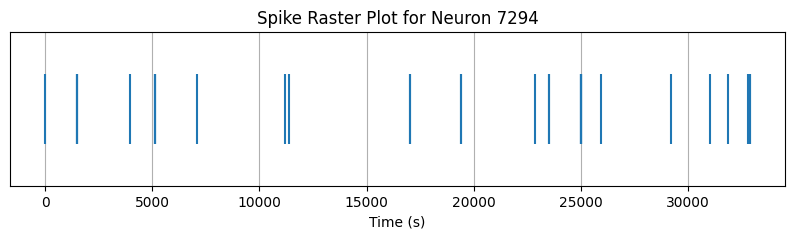

986423


In [ ]:
gt_counts = {}
for id in sorted(set(result["true"])):
    # User-provided data
    ID = result['true']
    dt = result['time']

    # Create a DataFrame
    df = pd.DataFrame({
        'ID': ID,
        'dt': dt
    })

    # Handle 'PAD' and 'EOS' tokens
    df = df[df['dt'] != 'PAD'].copy()
    eos_index = df[df['ID'] == 'EOS'].index
    if not eos_index.empty:
        df = df.loc[:eos_index[0]-1]


    # Convert dt to numeric, coercing errors
    df['dt'] = pd.to_numeric(df['dt'], errors='coerce')

    # Calculate absolute spike times
    df['Time'] = df['dt'].cumsum()

    # Filter for the specific neuron we want to visualize
    neuron_id = id
    neuron_activity = df[df['ID'] == neuron_id]

    # Create the raster plot
    # plt.figure(figsize=(10, 2))
    # plt.eventplot(neuron_activity['Time'], linelengths=0.5)
    # plt.title(f'Spike Raster Plot for Neuron {neuron_id}')
    # plt.xlabel('Time (s)')
    # plt.yticks([])
    # plt.grid(True)
    # plt.show()

    counts, bins = binned_spike_count(neuron_activity['Time'].values, bin_size=(1/30))
    gt_counts[neuron_id] = counts


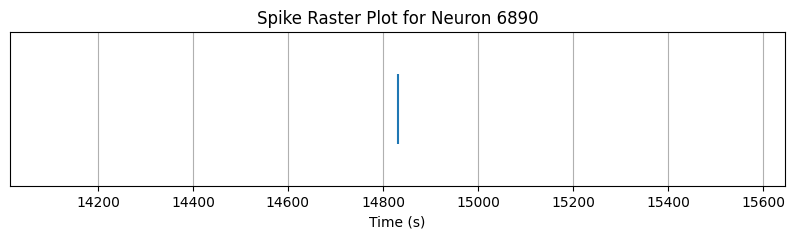

444921


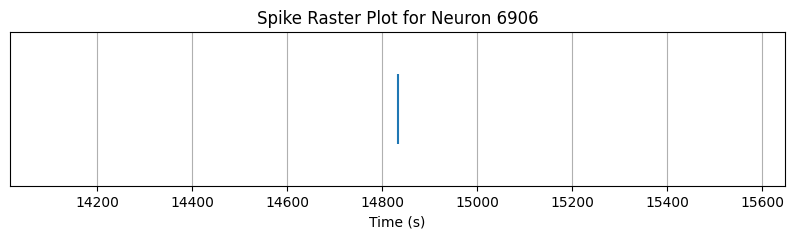

444980


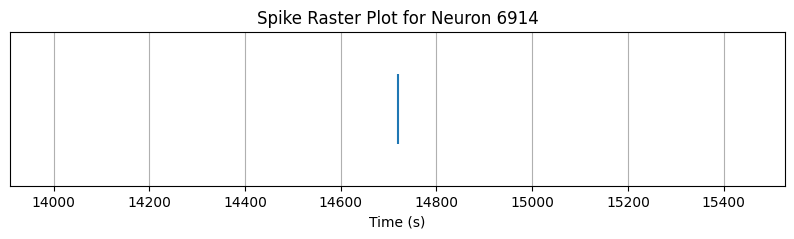

441558


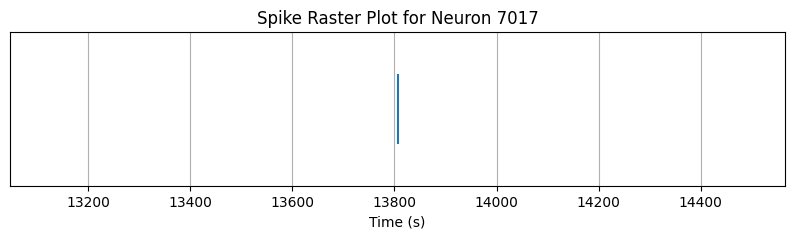

414182


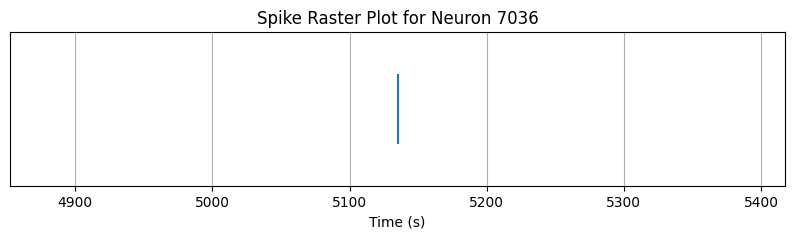

154051


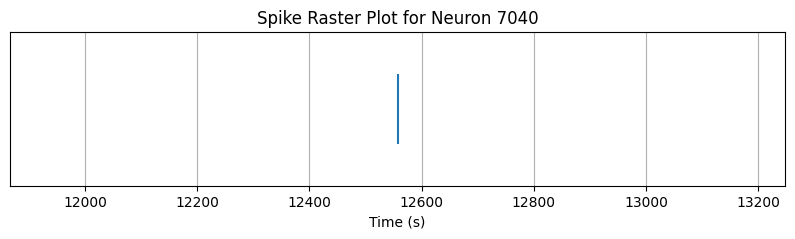

376717


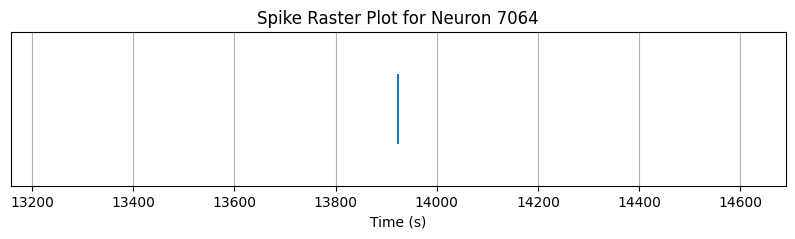

417722


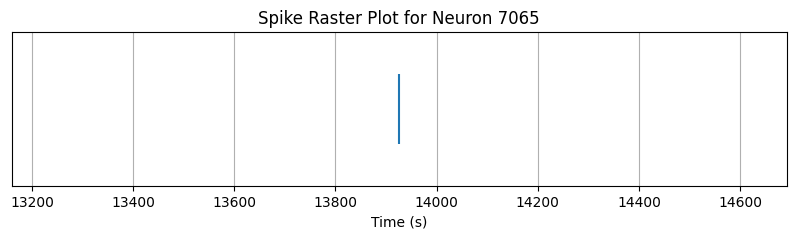

417781


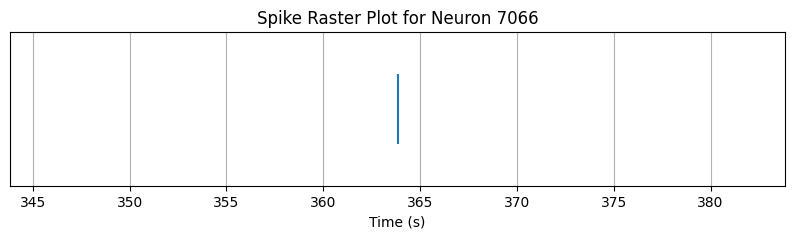

10917


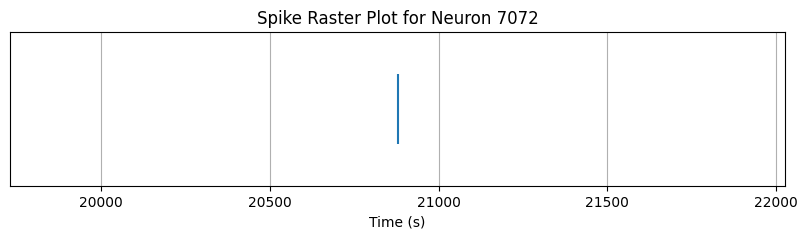

626346


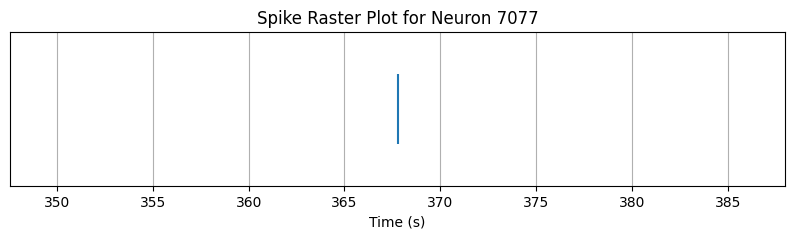

11035


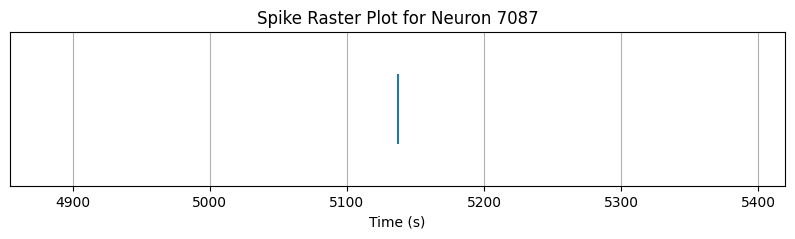

154110


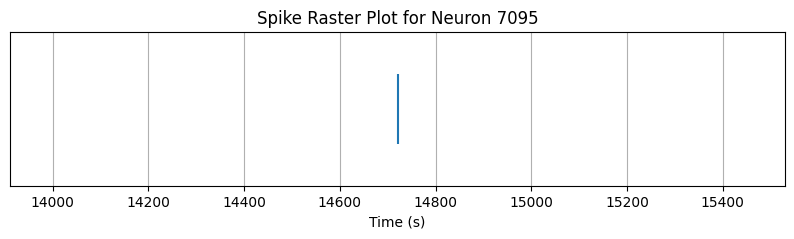

441617


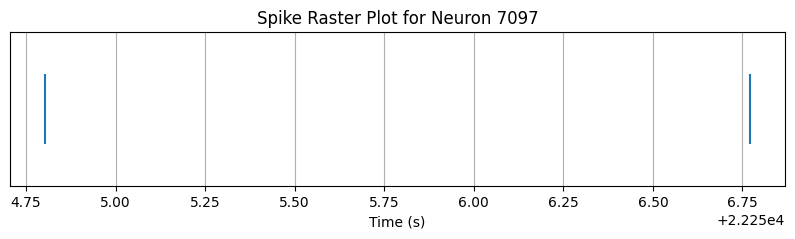

667705


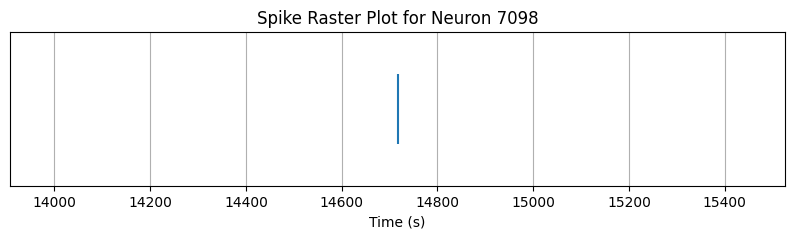

441499


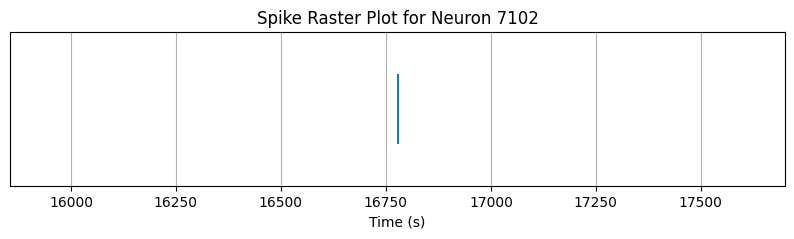

503331


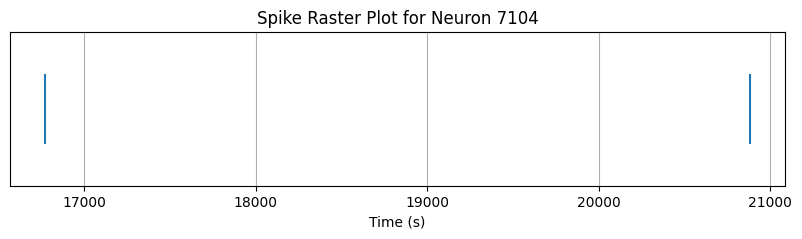

626405


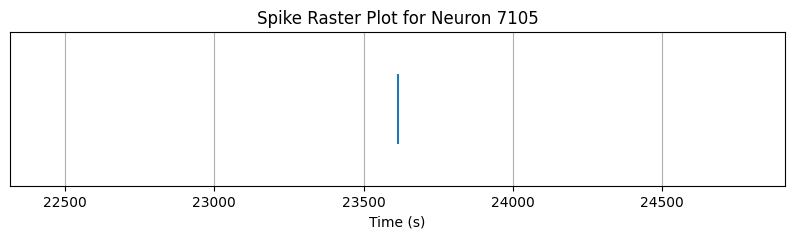

708415


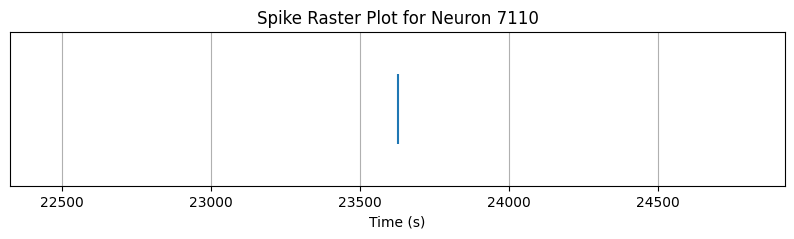

708769


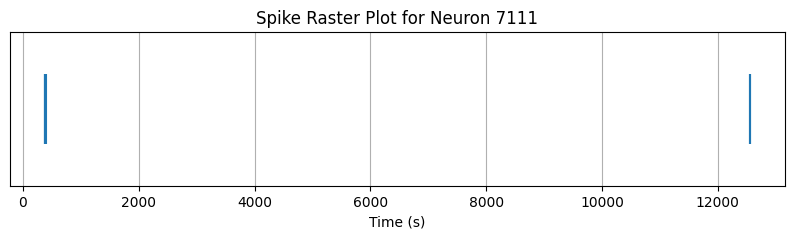

376540


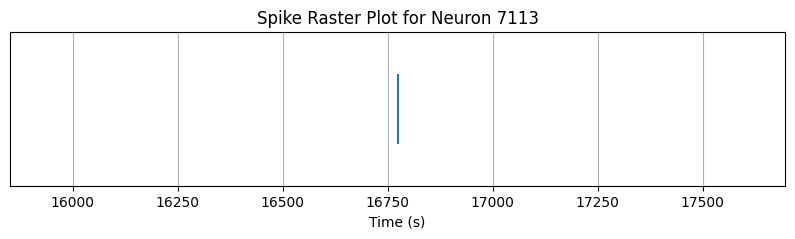

503213


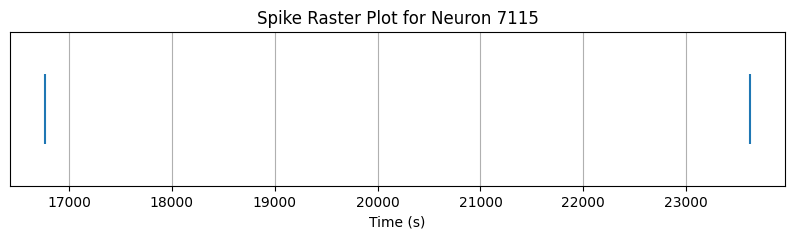

708533


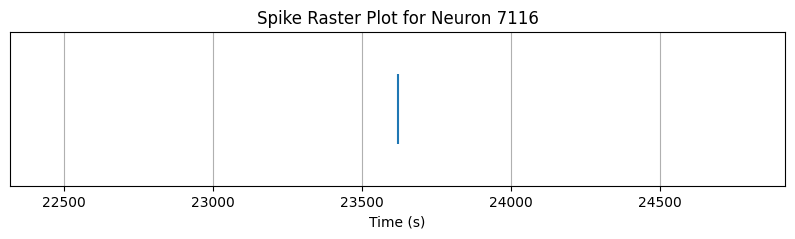

708592


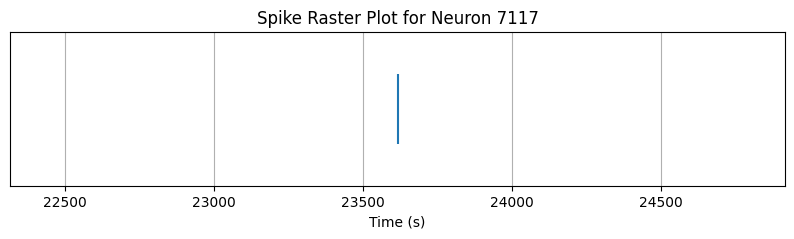

708474


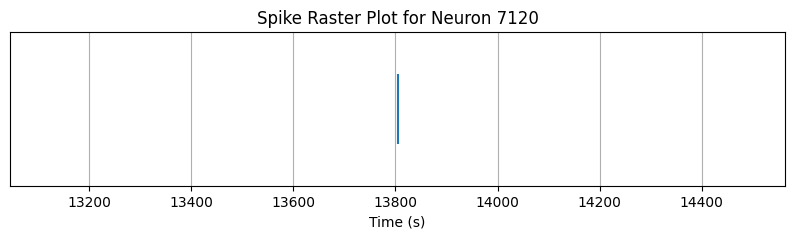

414123


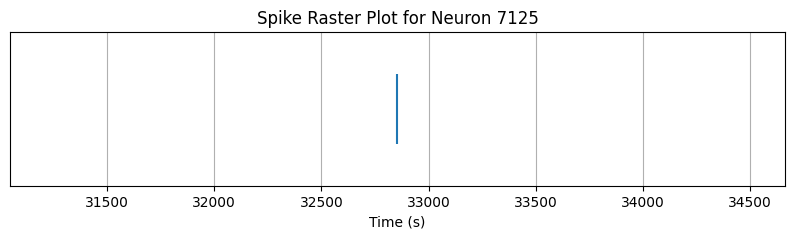

985656


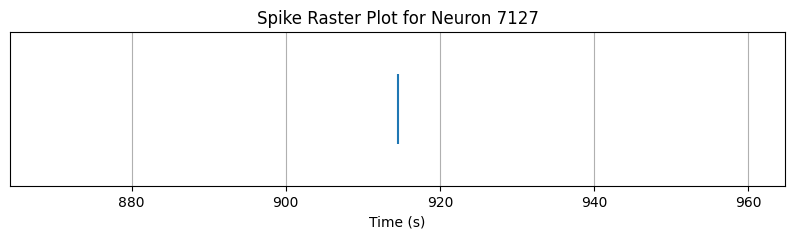

27437


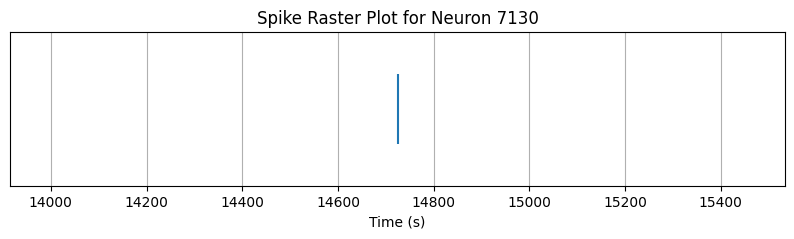

441735


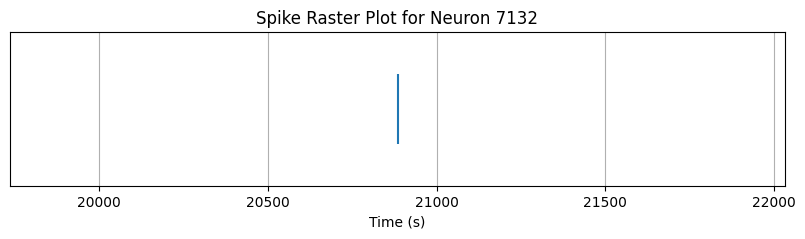

626523


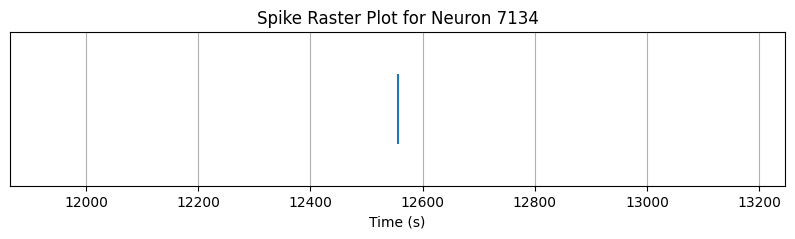

376658


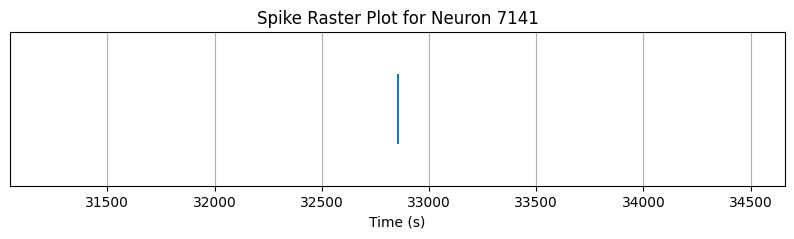

985597


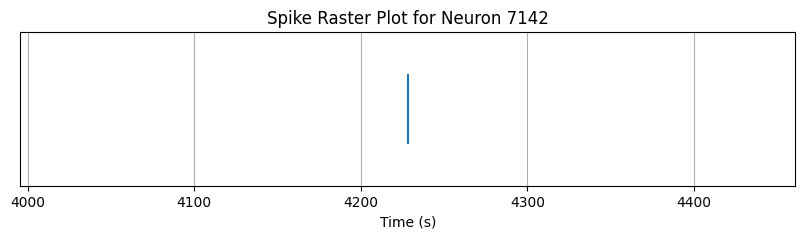

126852


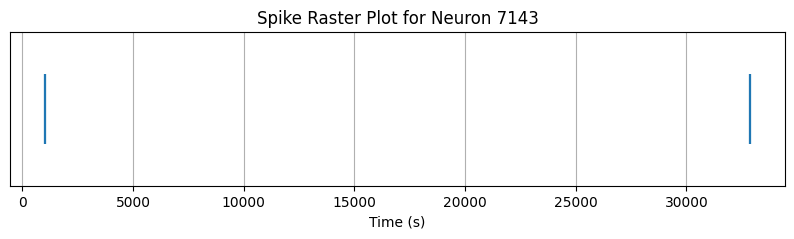

985833


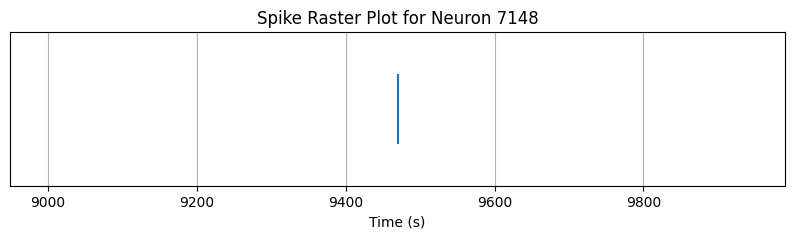

284087


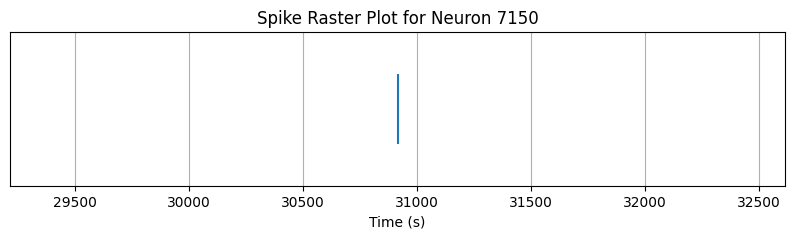

927423


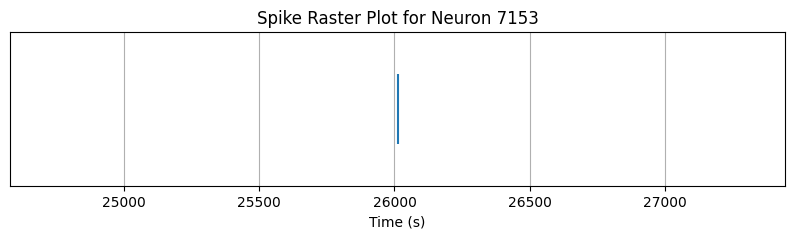

780336


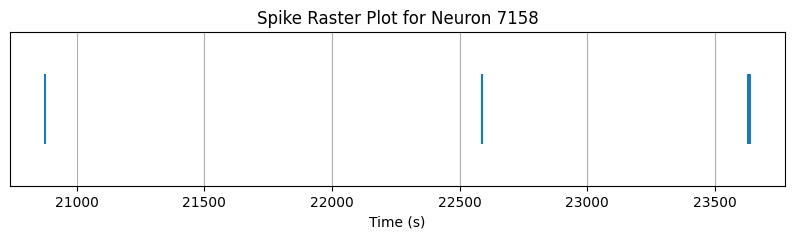

709123


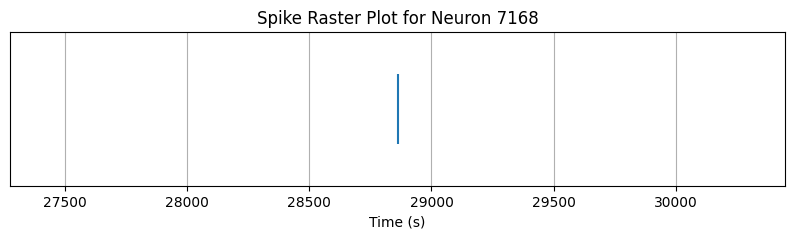

865827


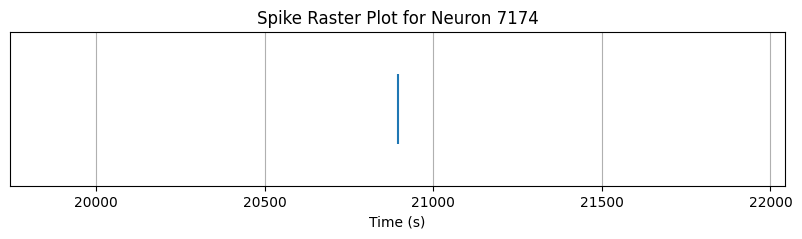

626818


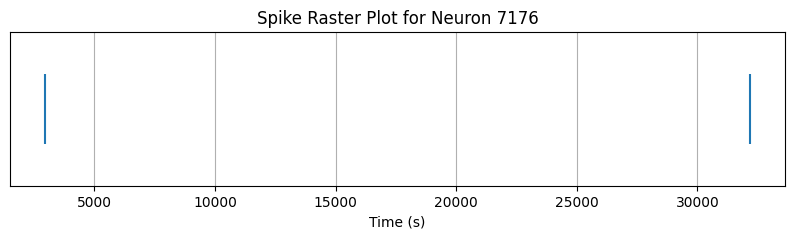

965065


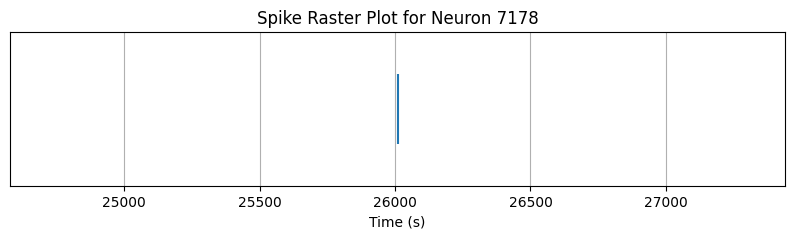

780277


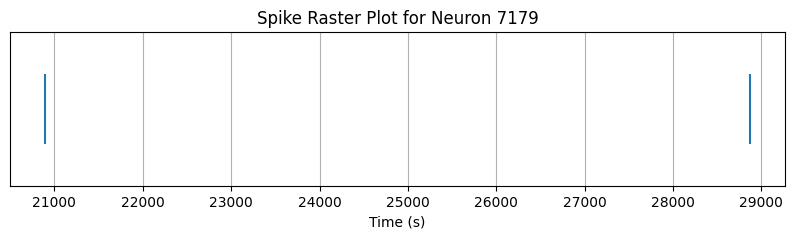

866063


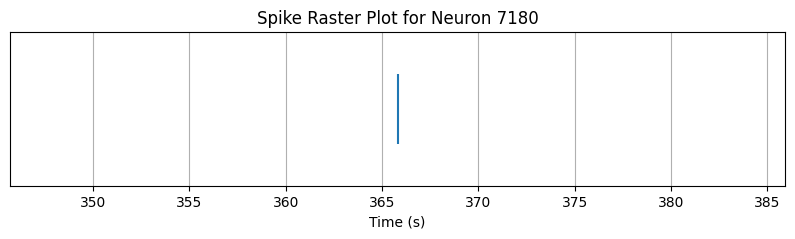

10976


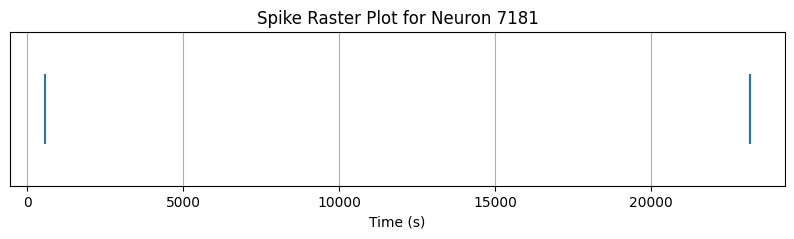

694786


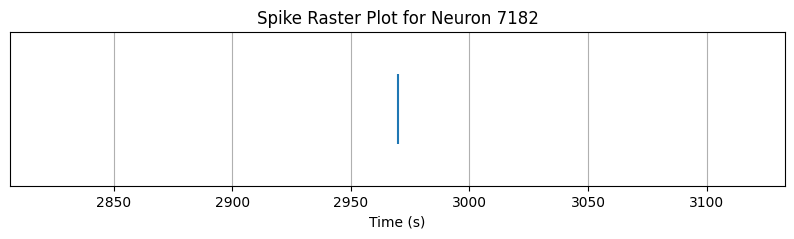

89092


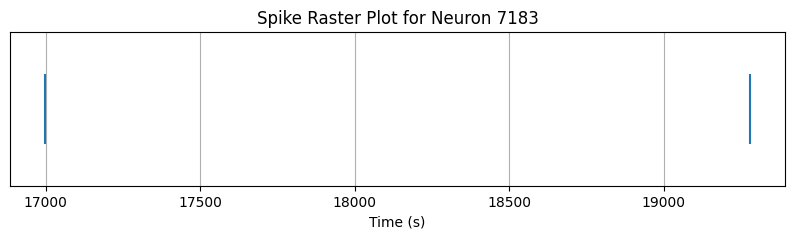

578379


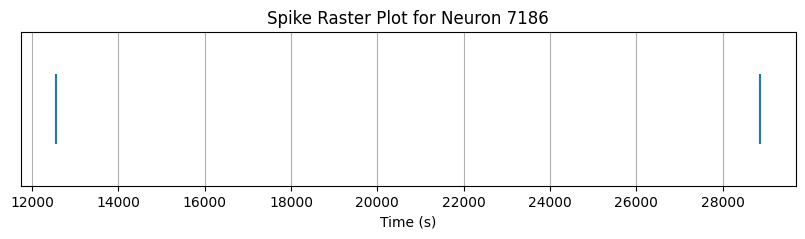

866122


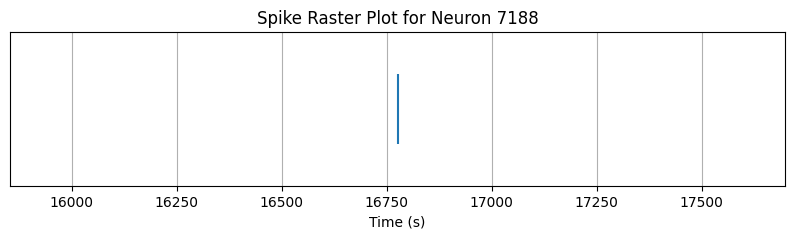

503272


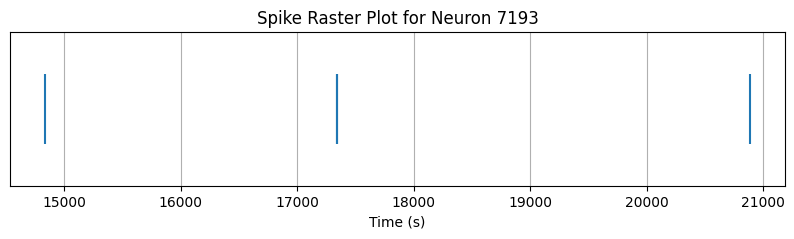

626582


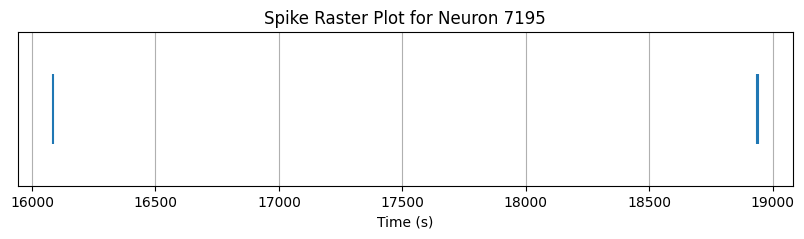

568172


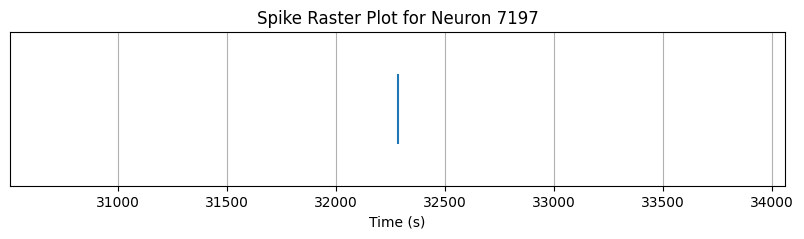

968487


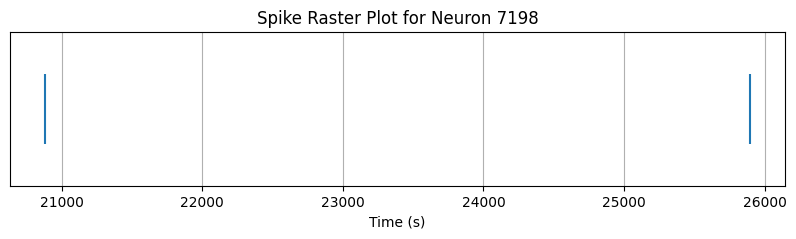

776855


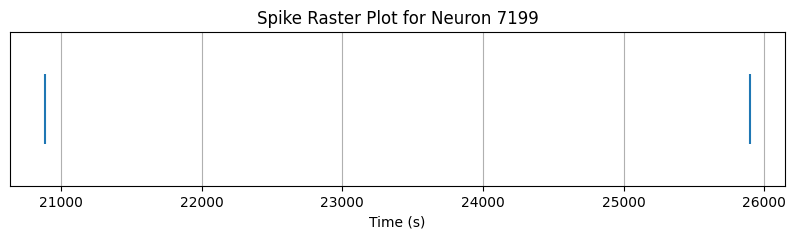

776914


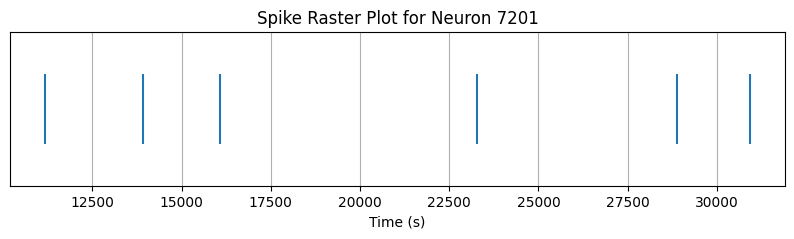

927718


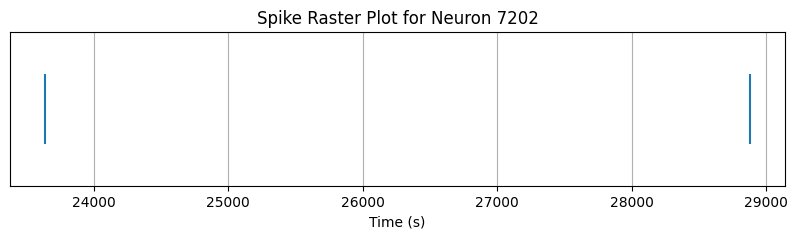

866299


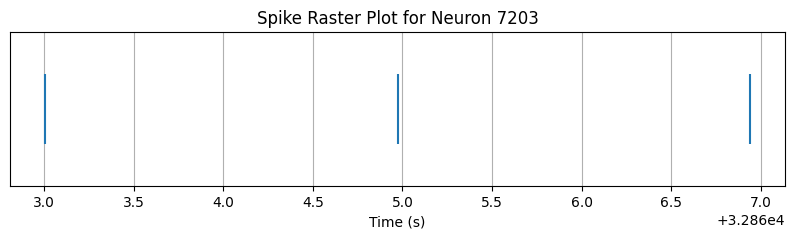

986010


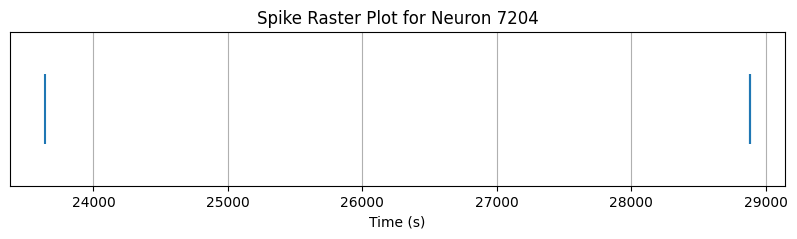

866417


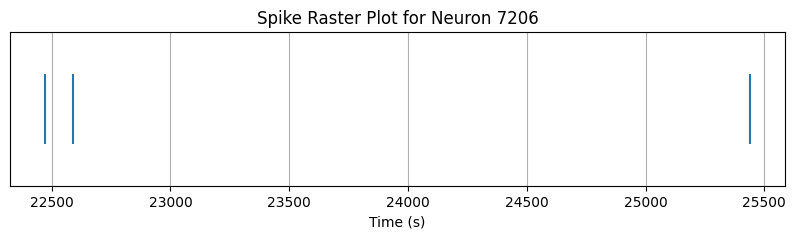

763167


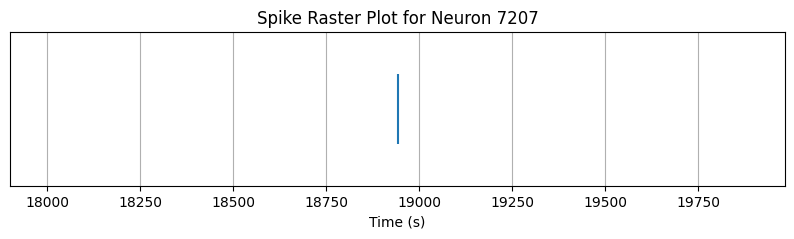

568231


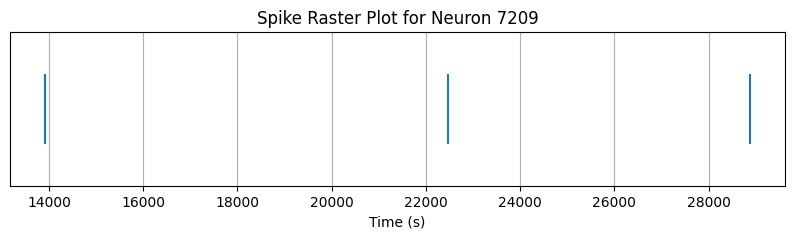

866181


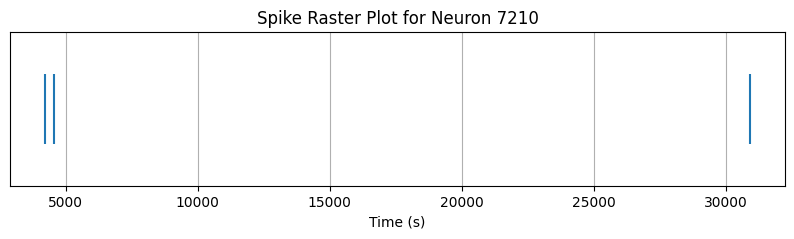

927482


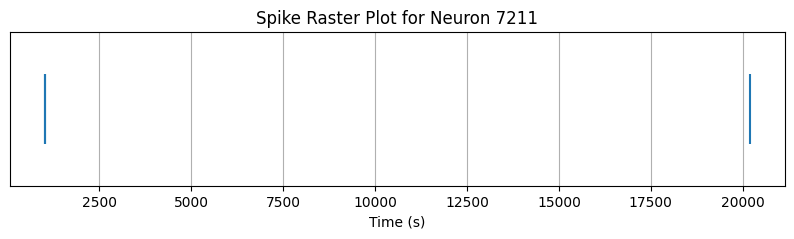

605755


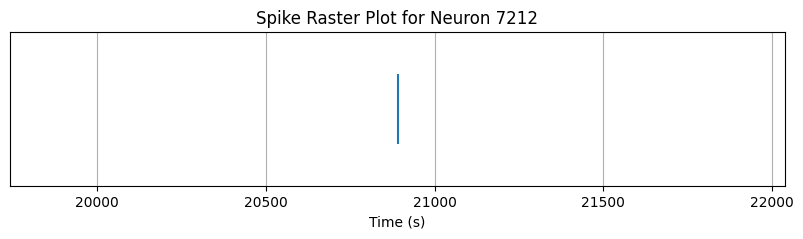

626700


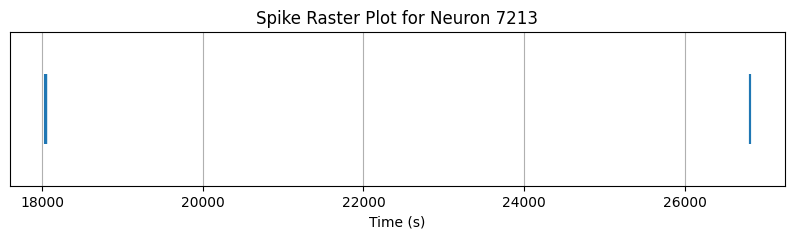

804290


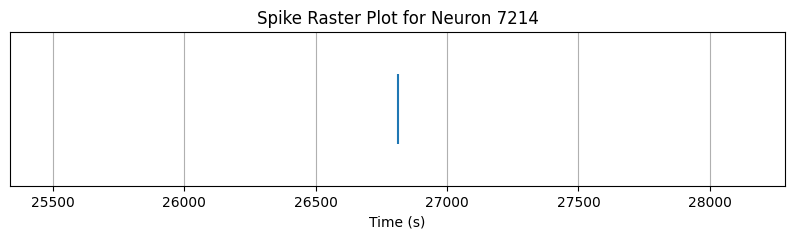

804349


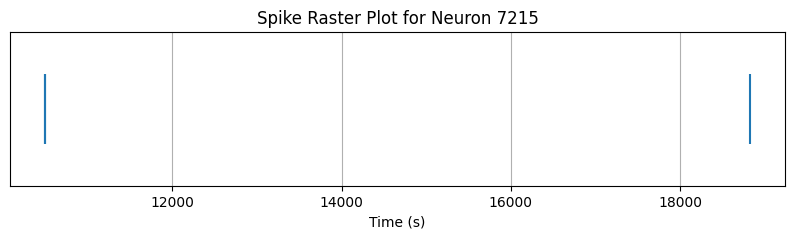

564691


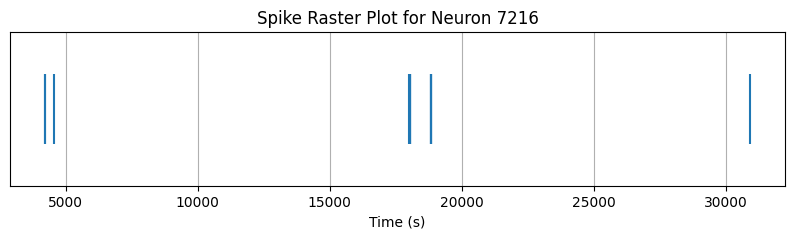

927541


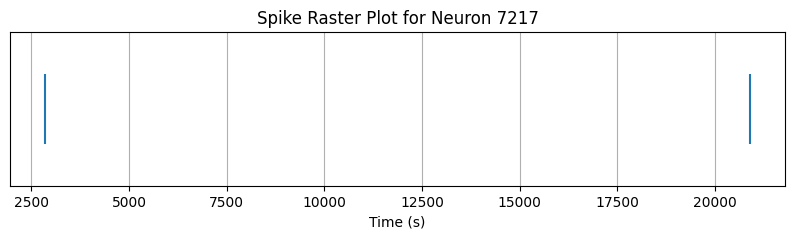

626759


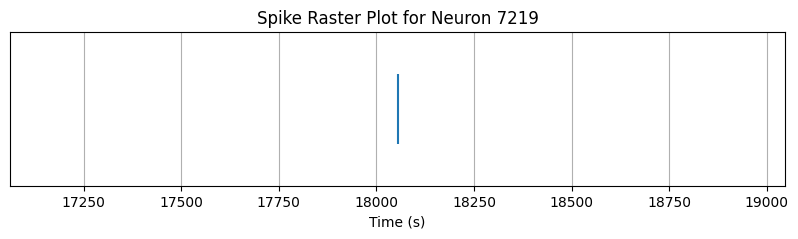

541622


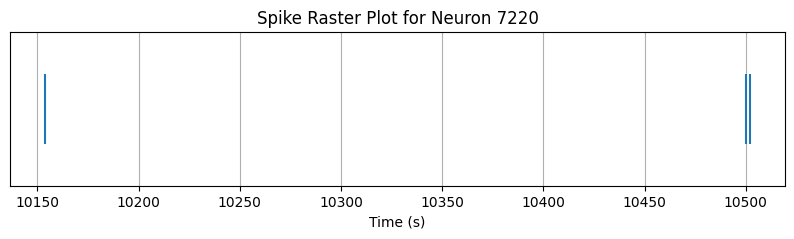

315062


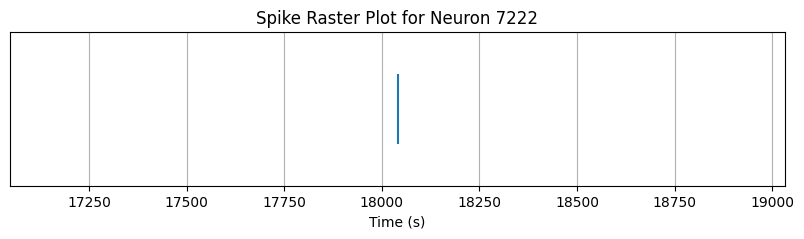

541209


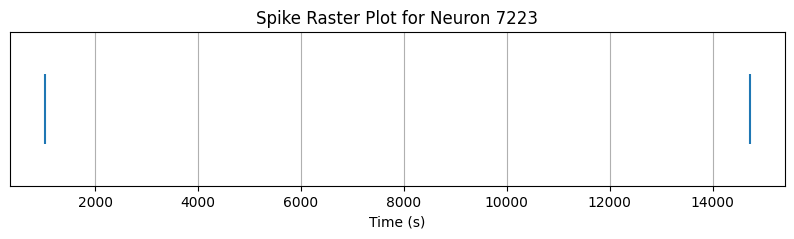

441676


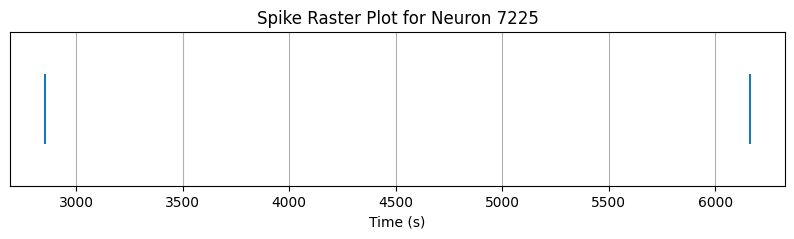

184849


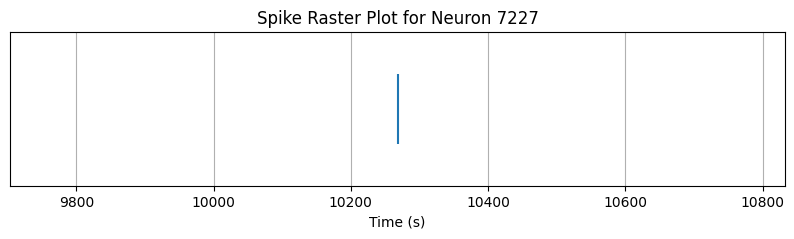

308041


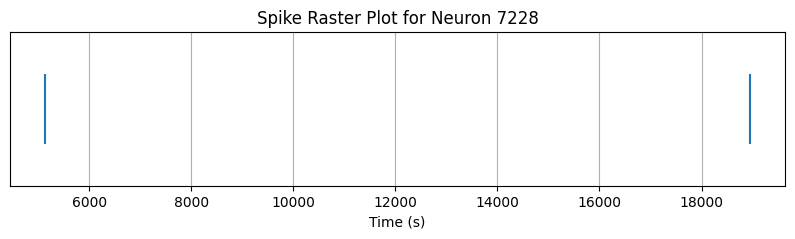

568349


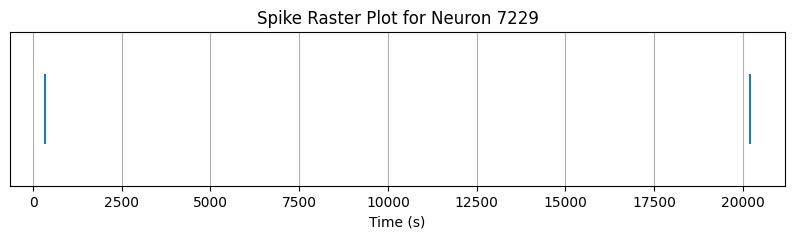

605814


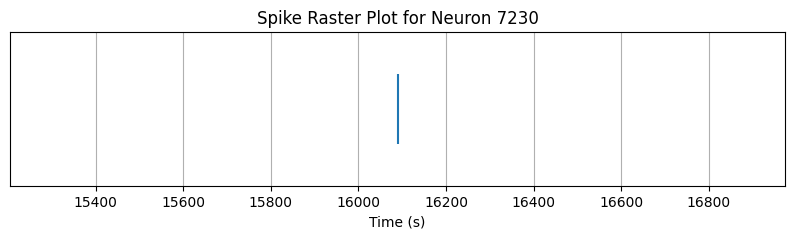

482681


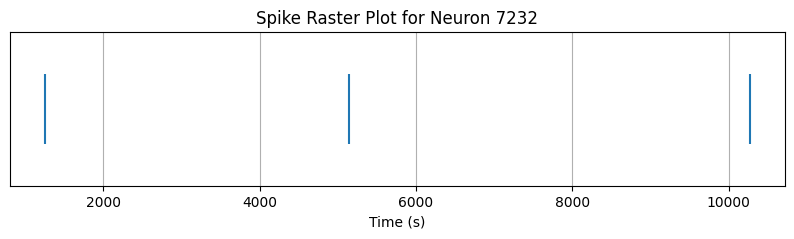

308100


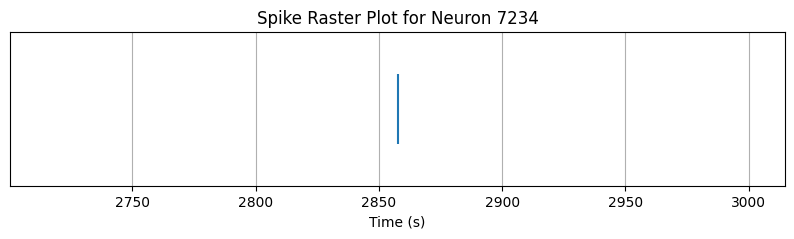

85729


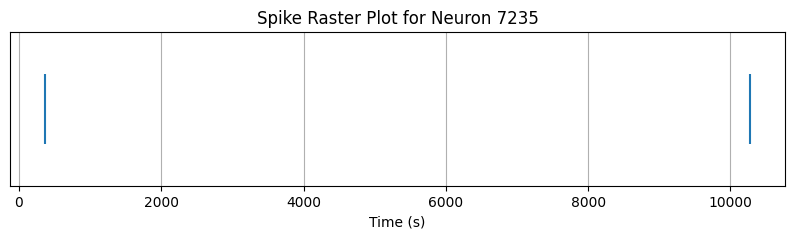

308159


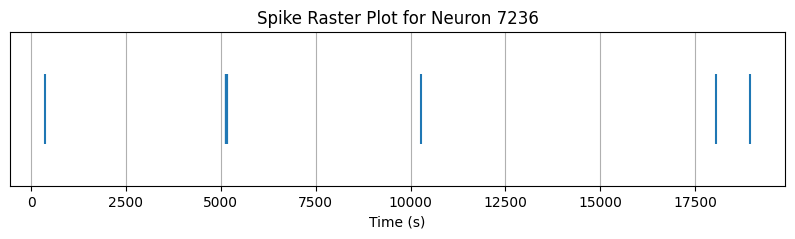

568290


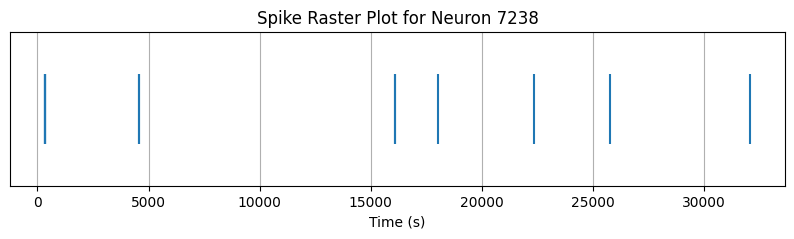

961820


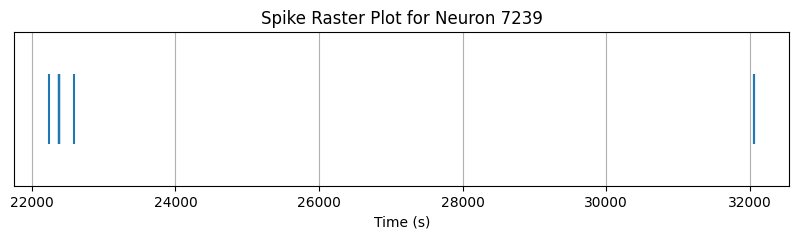

961761


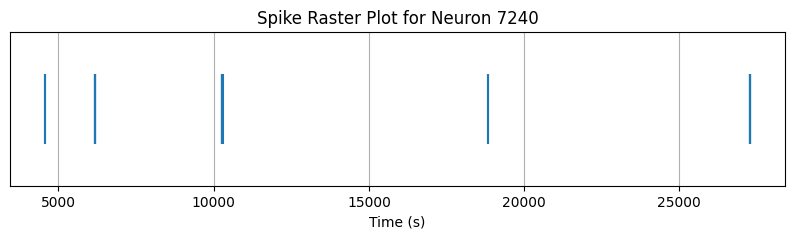

818096


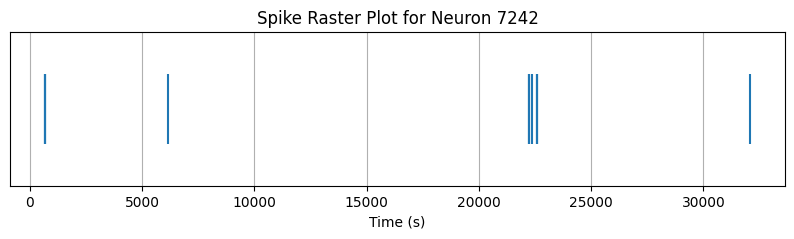

961879


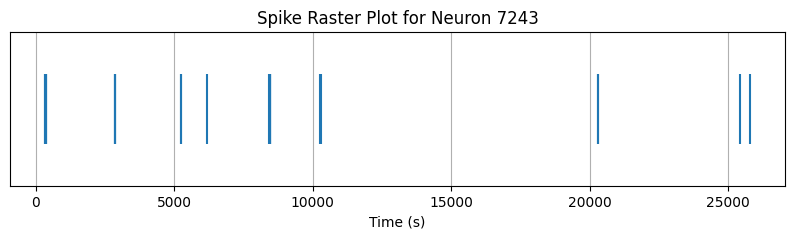

773610


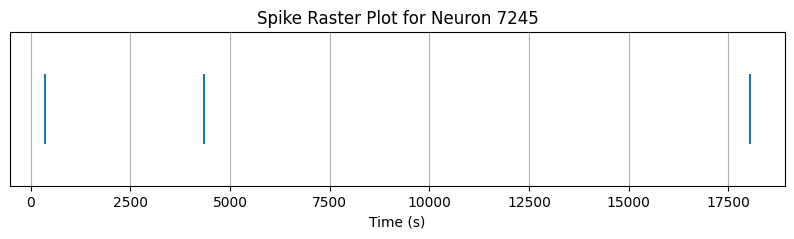

541091


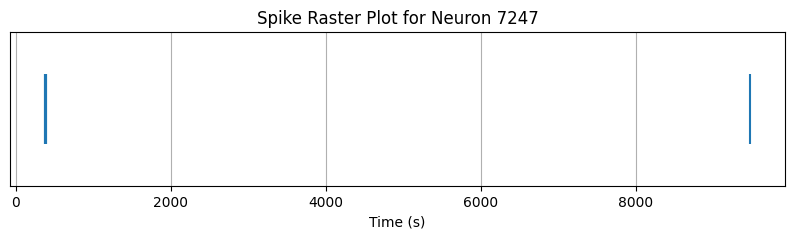

284146


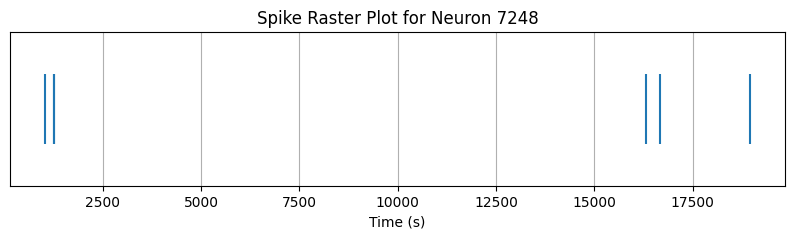

568408


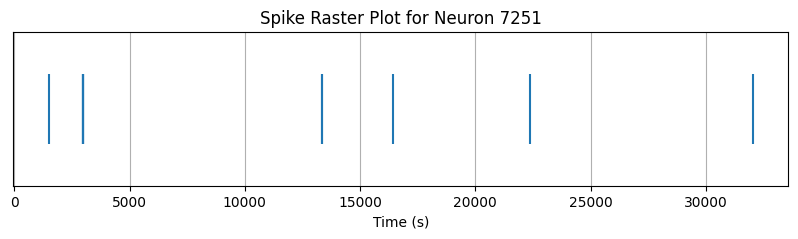

961643


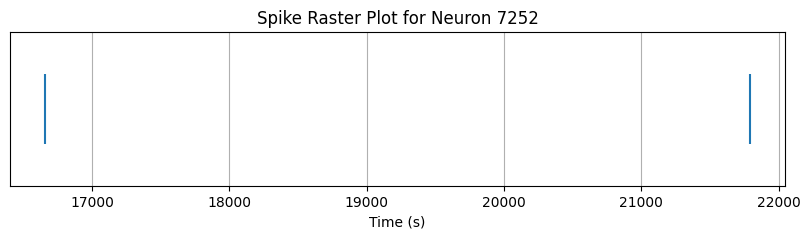

653663


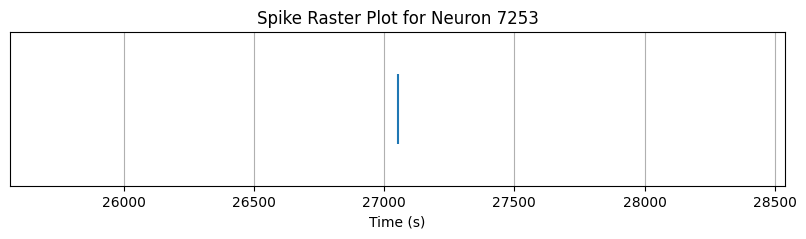

811547


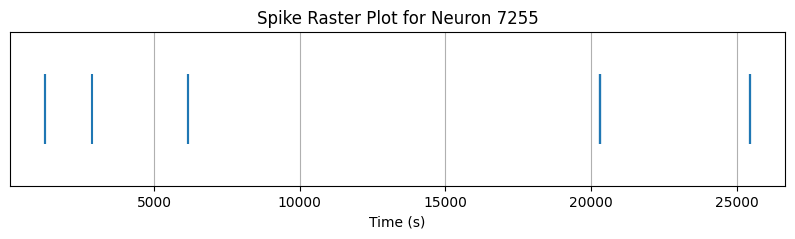

763403


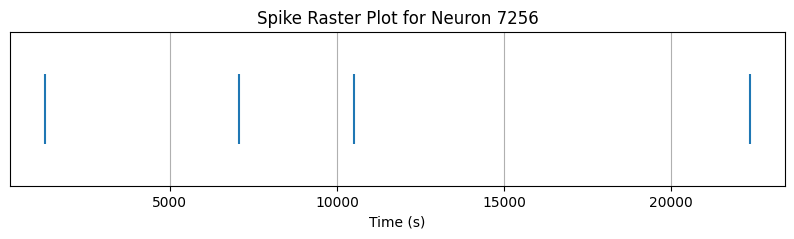

670832


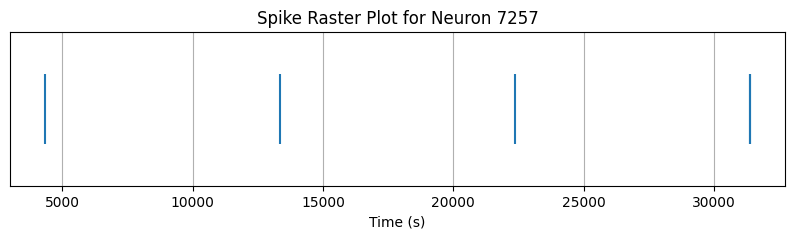

941170


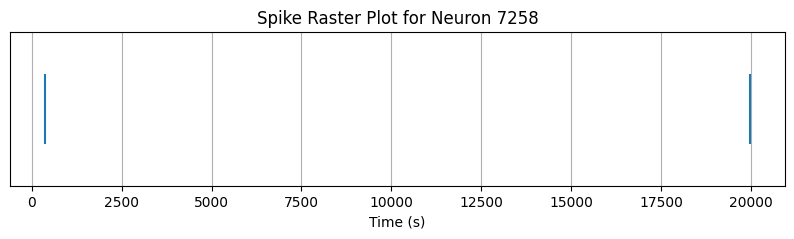

598911


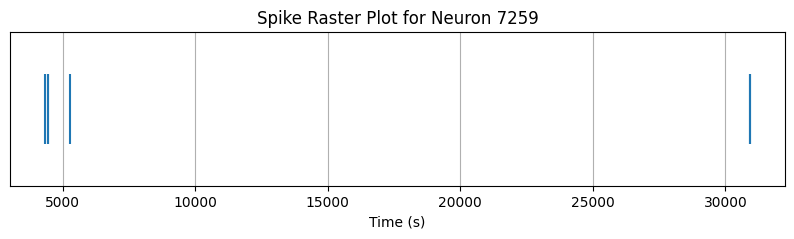

927659


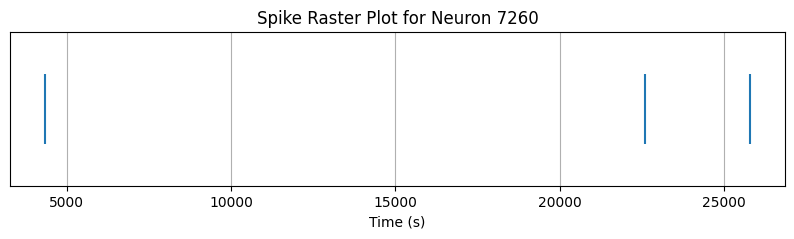

773492


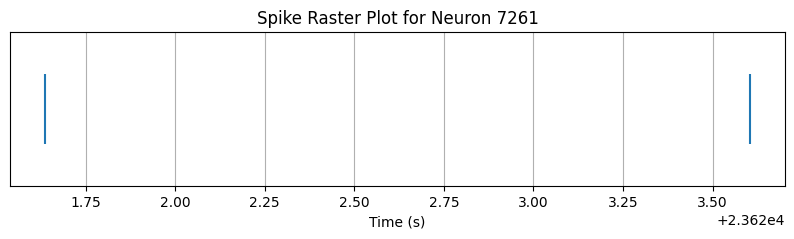

708710


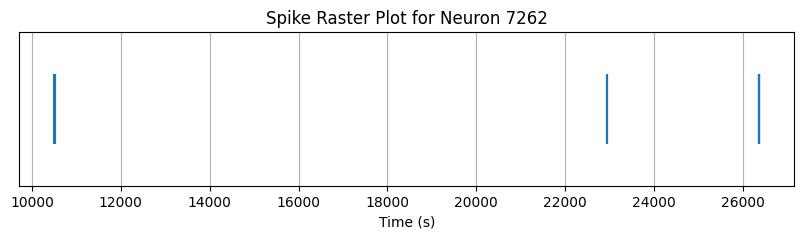

790779


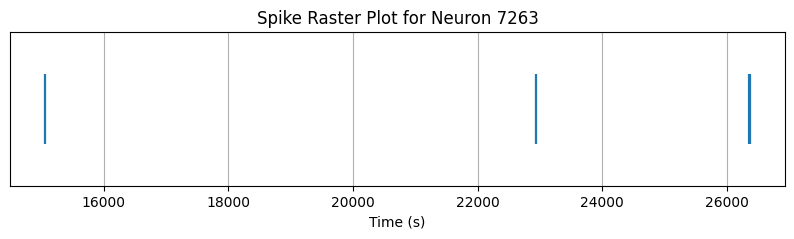

791074


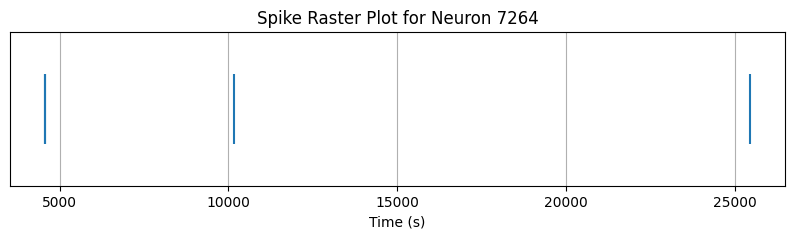

763462


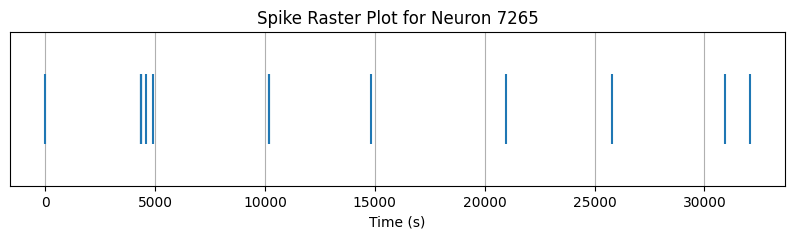

961938


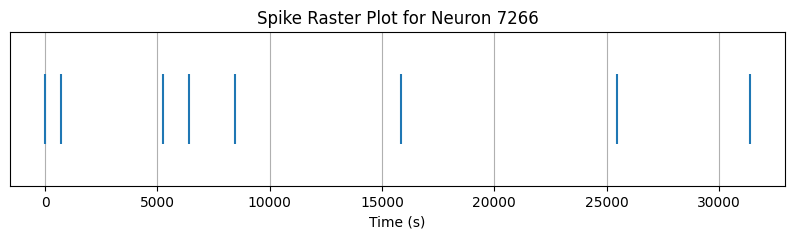

941347


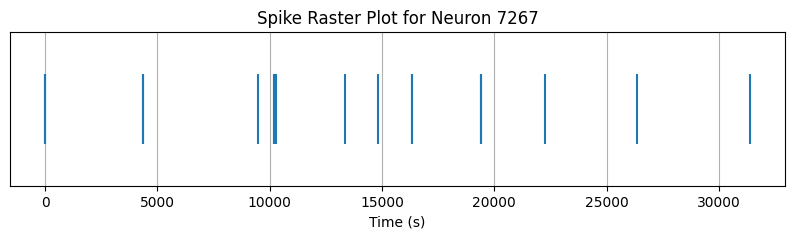

941229


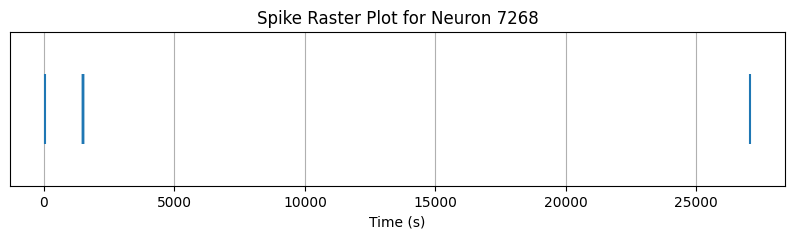

811606


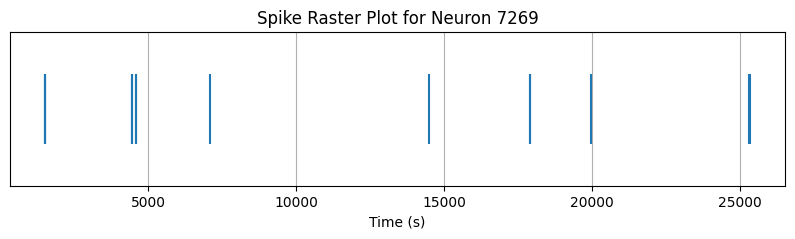

760394


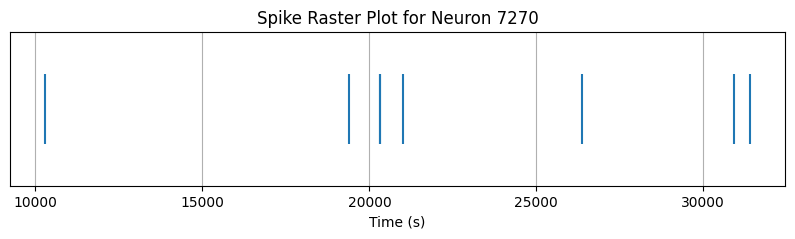

941760


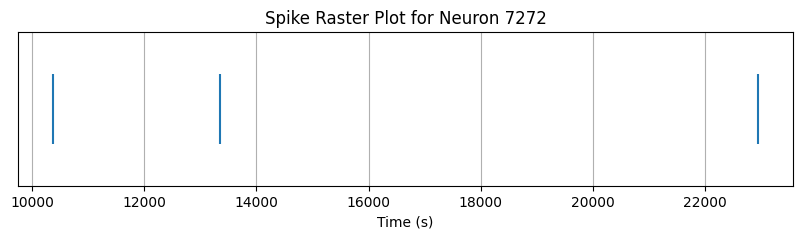

688237


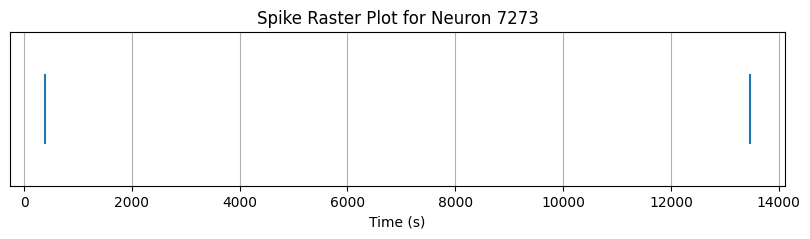

403857


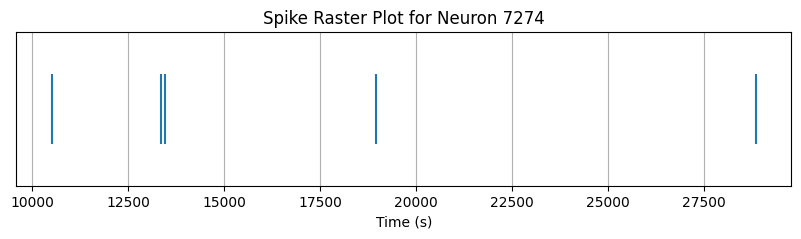

865886


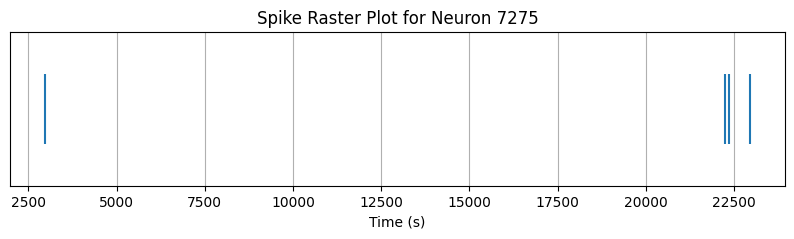

688414


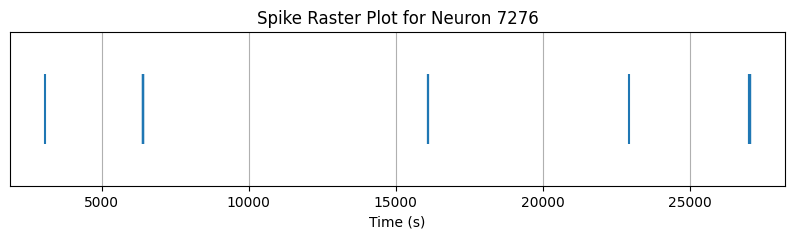

811429


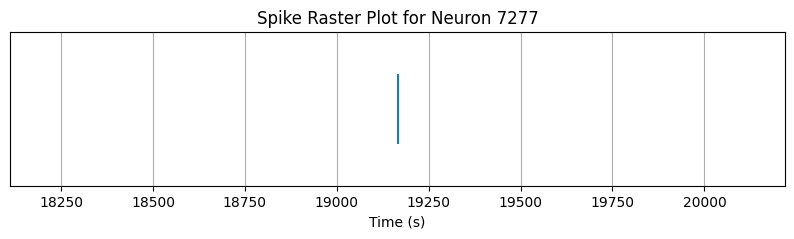

574957


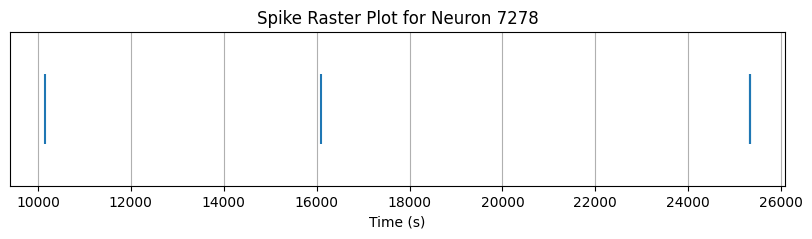

759804


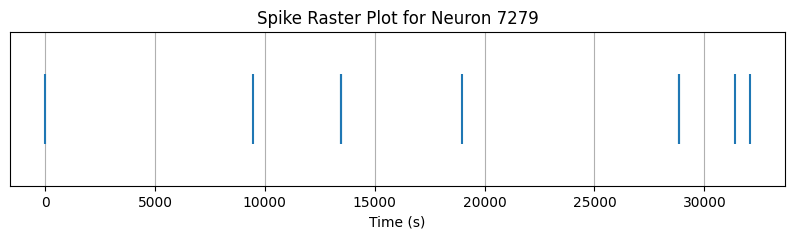

961997


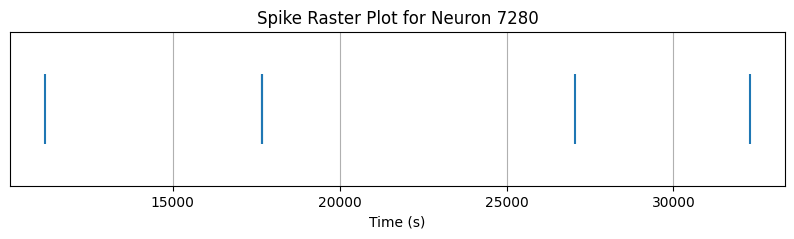

968546


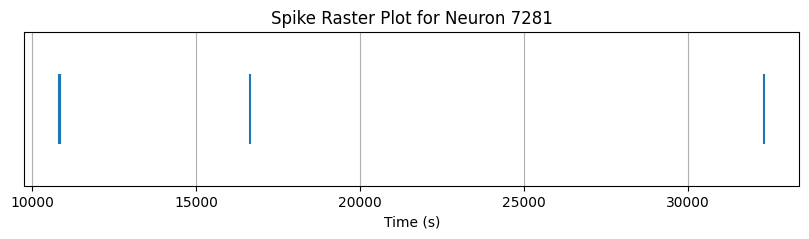

969195


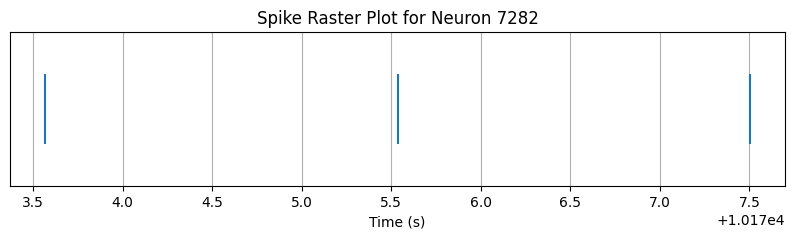

305327


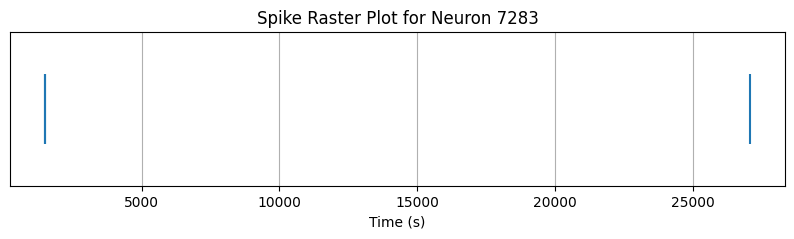

811488


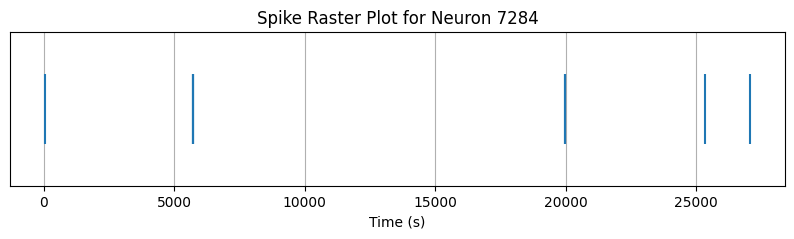

811724


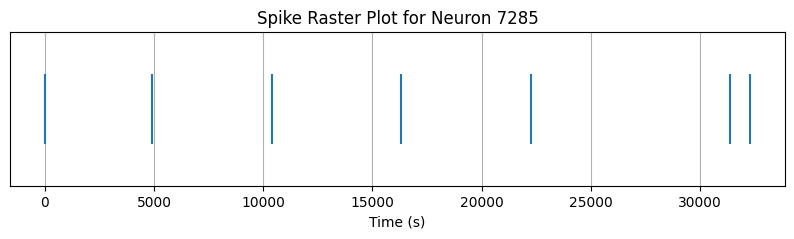

968605


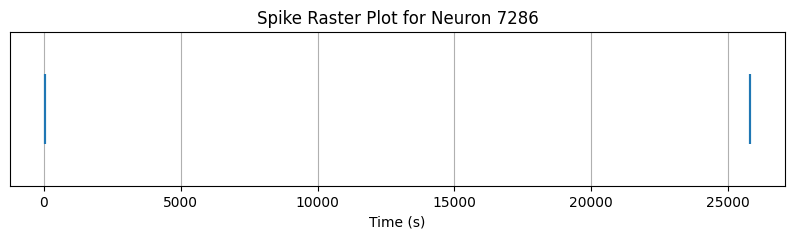

773728


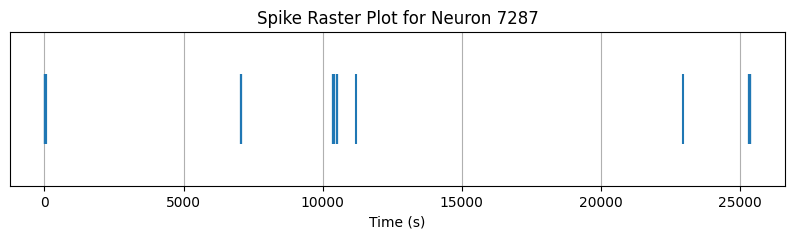

760335


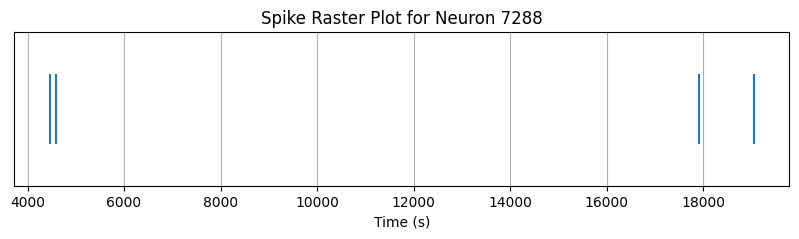

571594


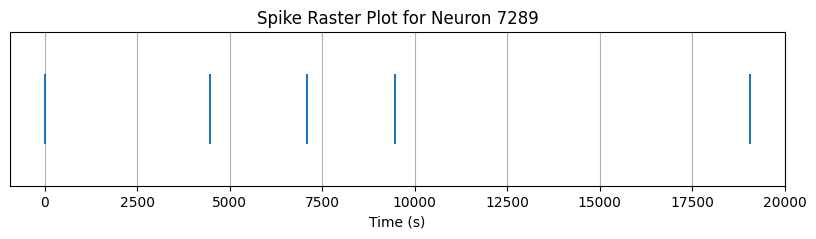

571653


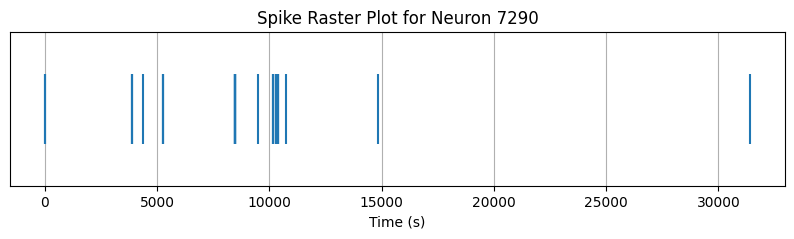

941878


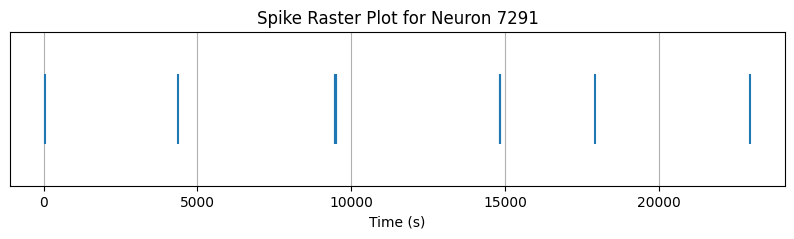

688473


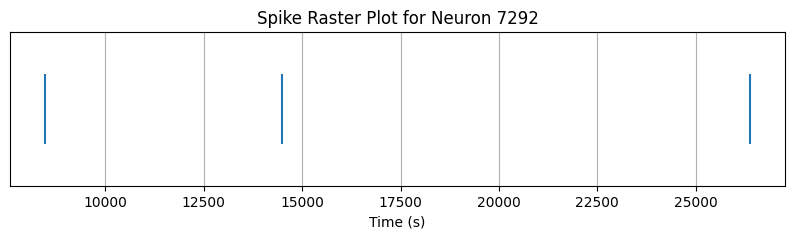

791251


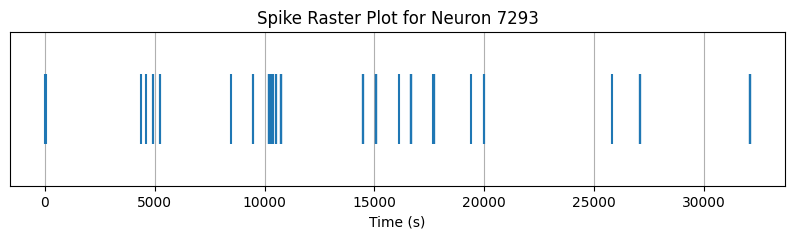

962292


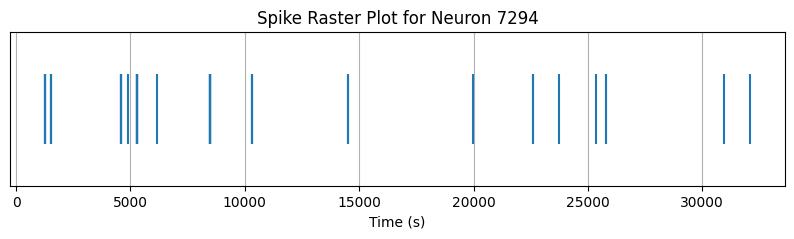

962351


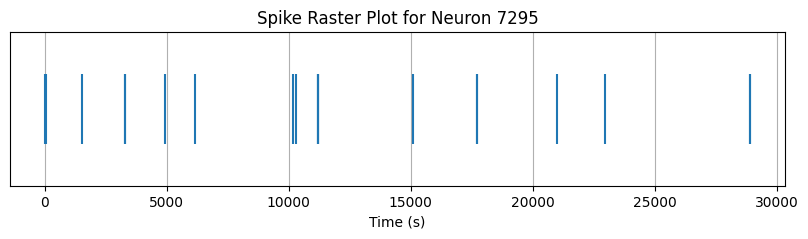

866535


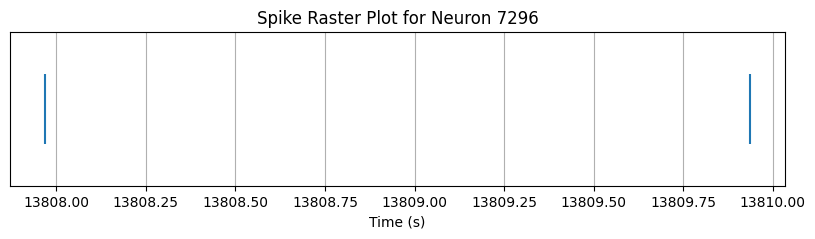

414300


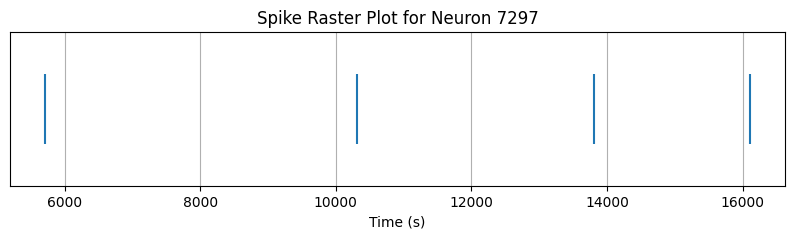

483153


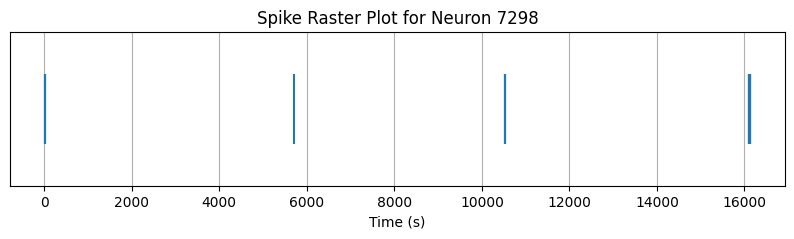

483625


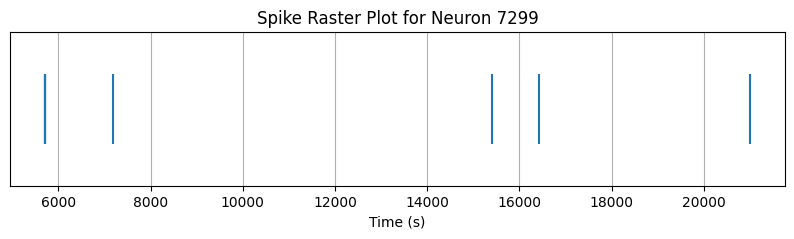

629827


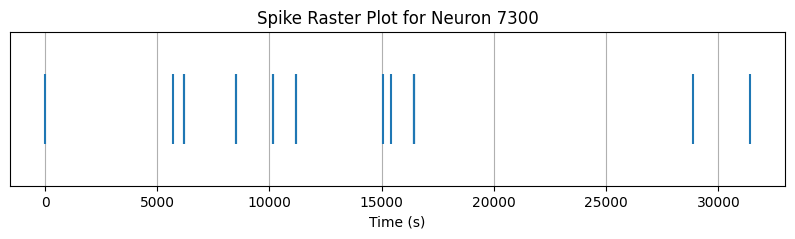

941937


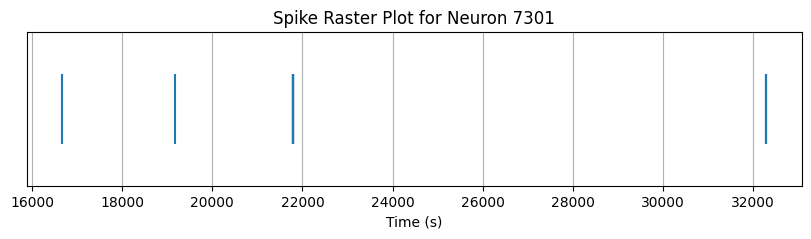

968782


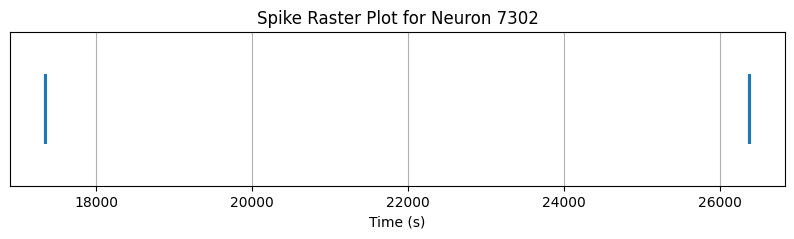

791487


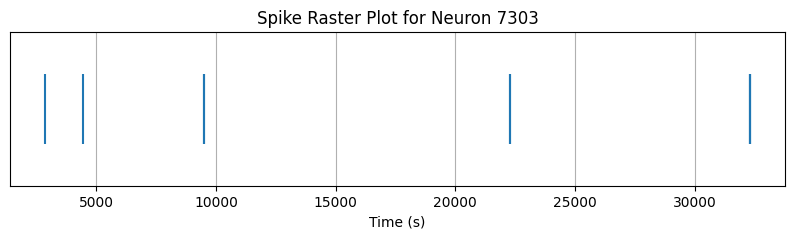

968959


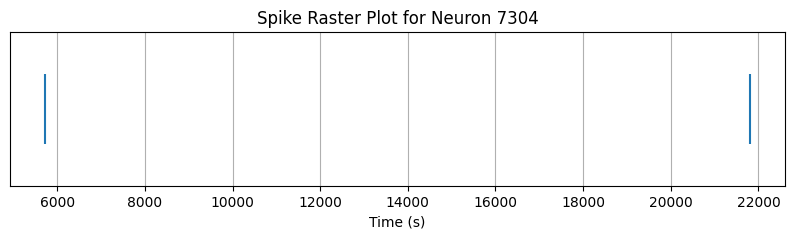

654076


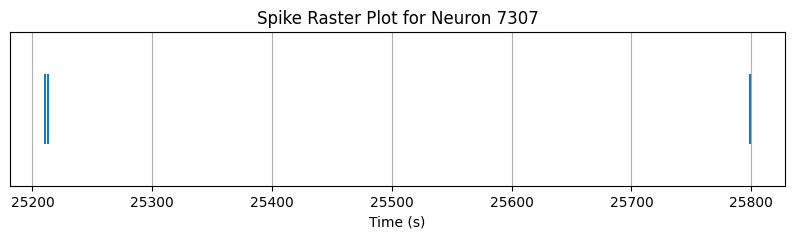

773964


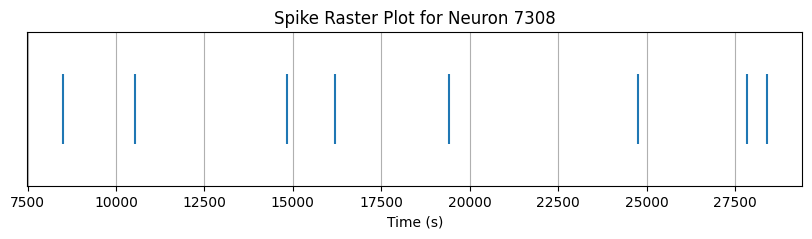

852139


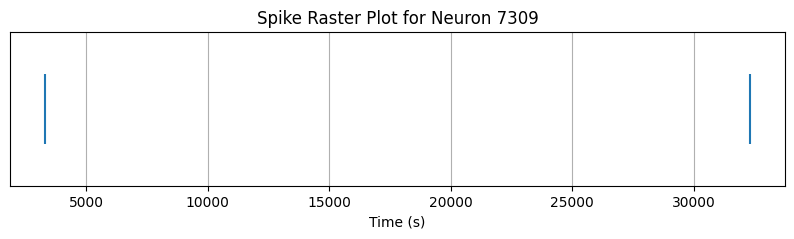

969254


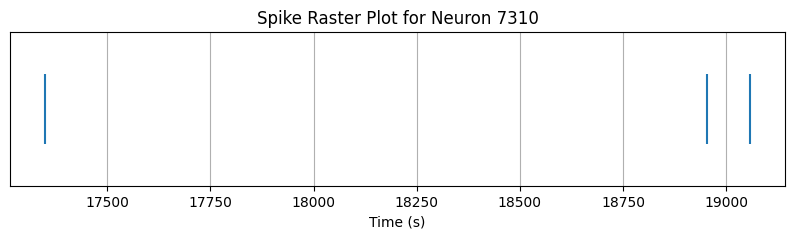

571712


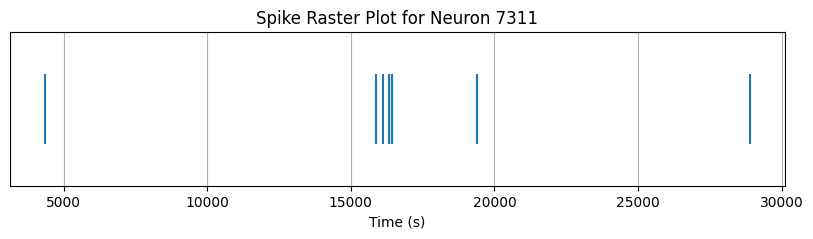

866653


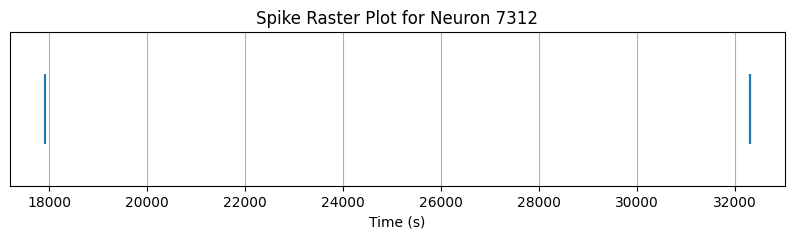

969136


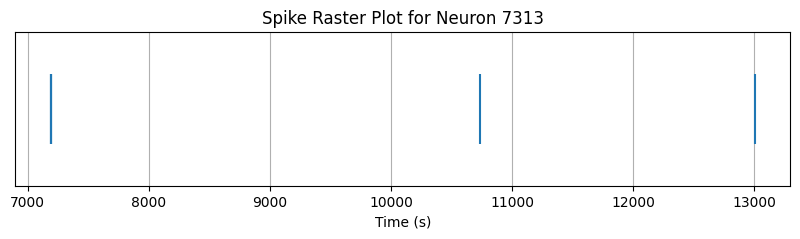

390169


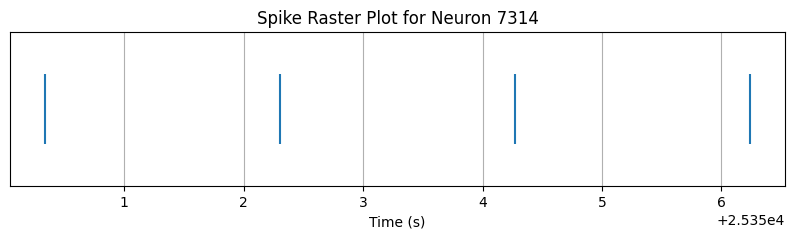

760689


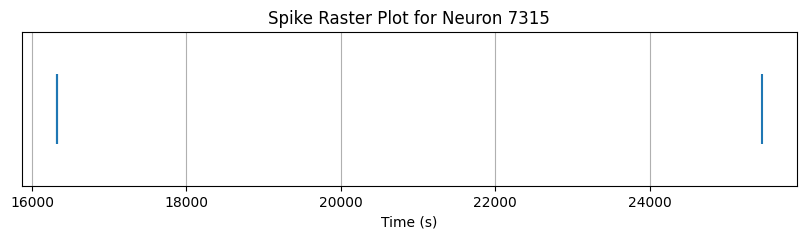

763580


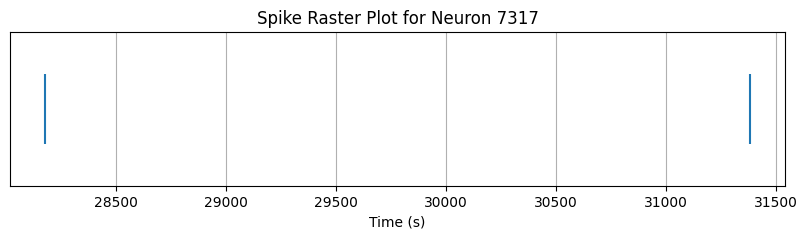

941406


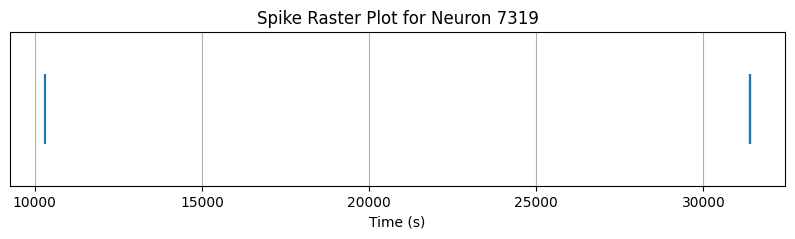

941701


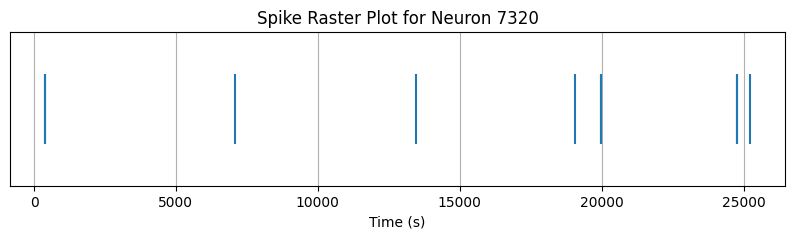

756500


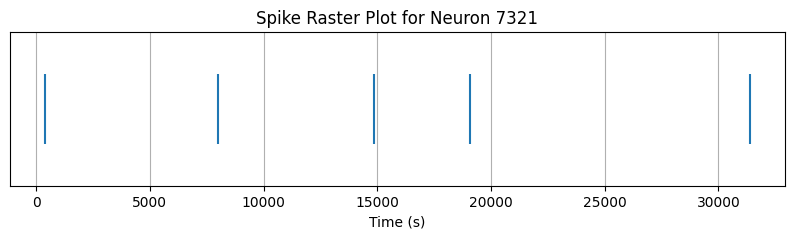

941465


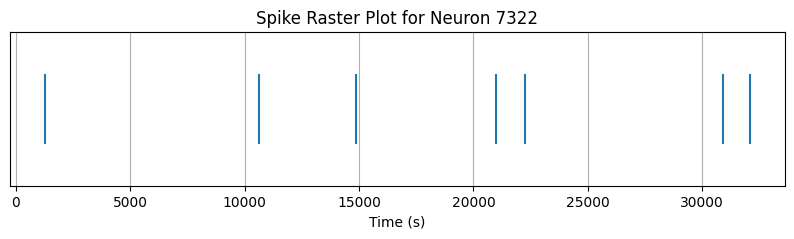

962410


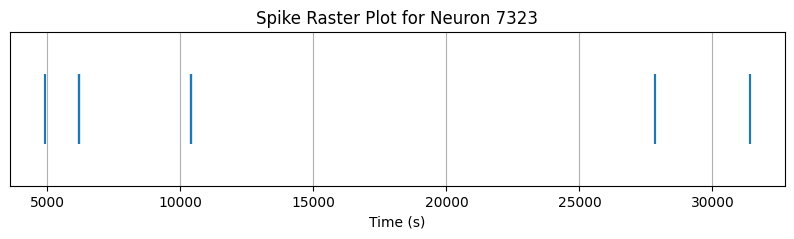

942055


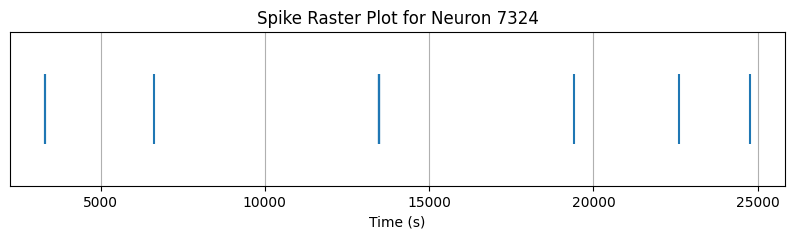

742812


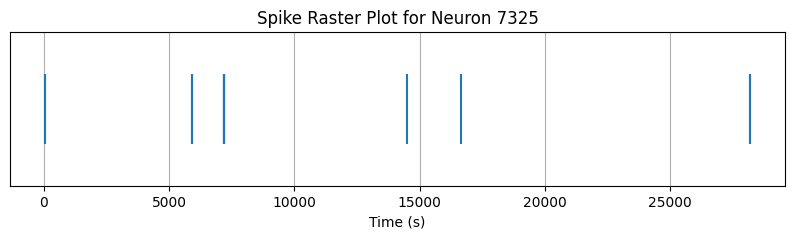

845413


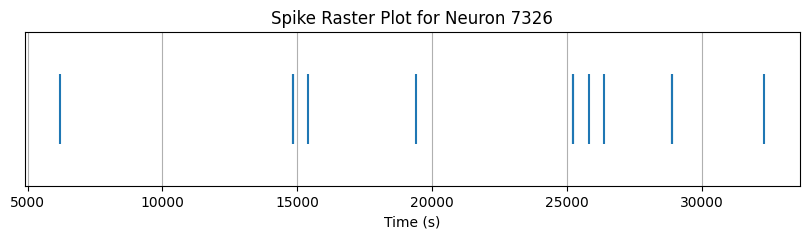

969313


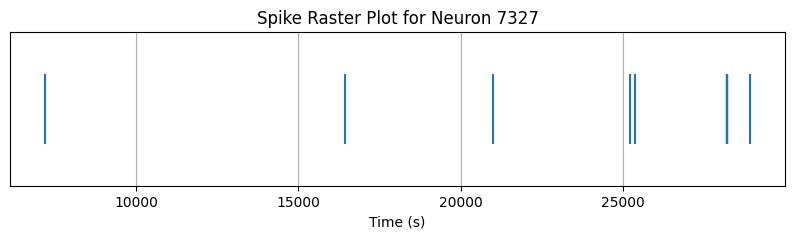

866948


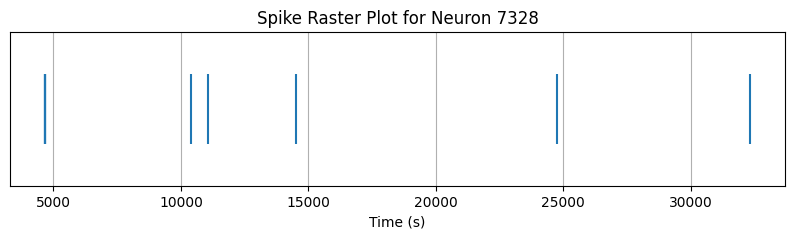

969372


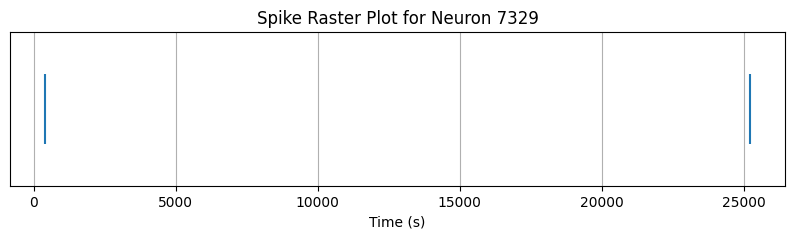

756441


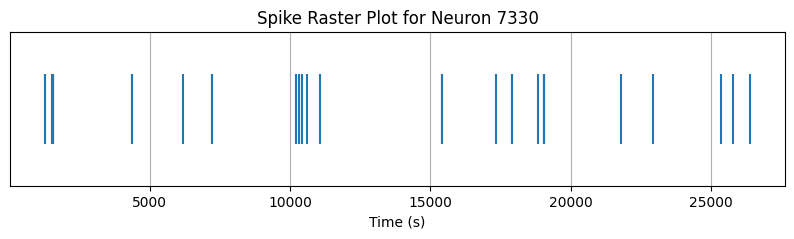

791605


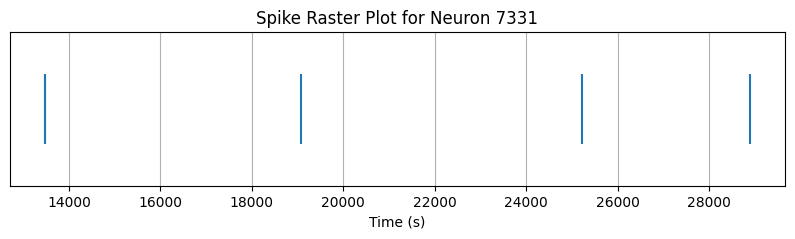

866712


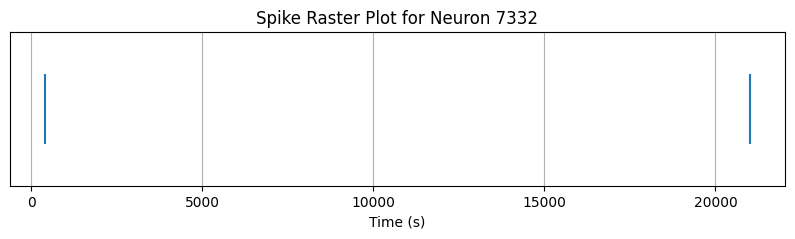

630063


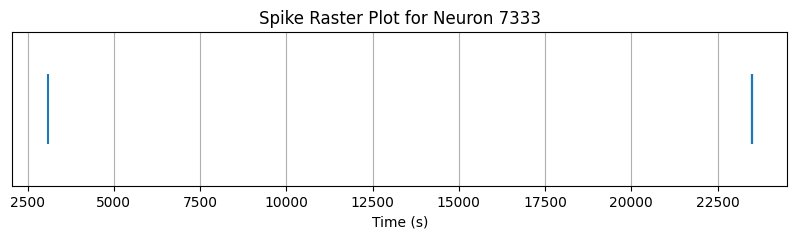

705111


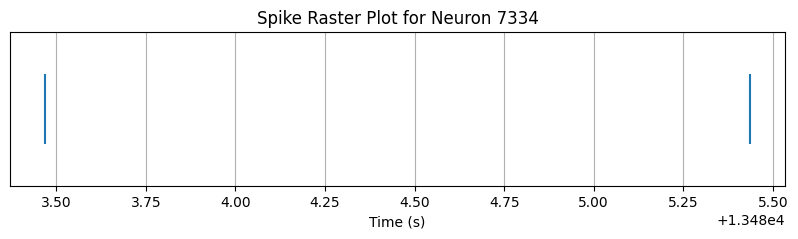

404565


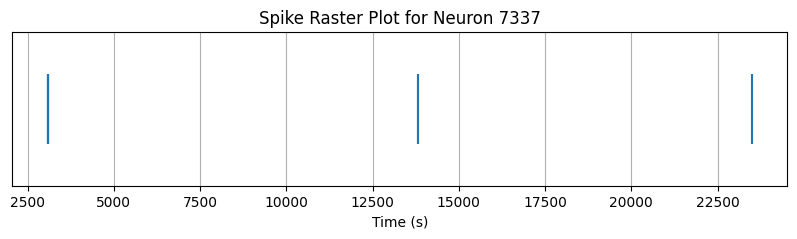

705170


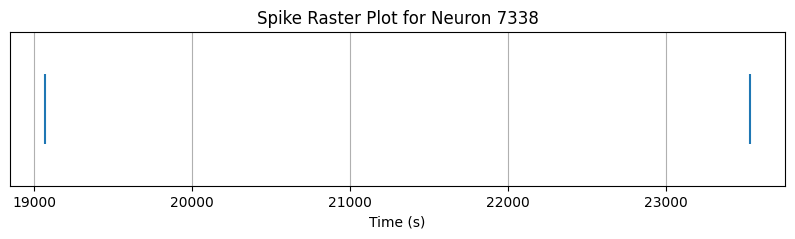

705878


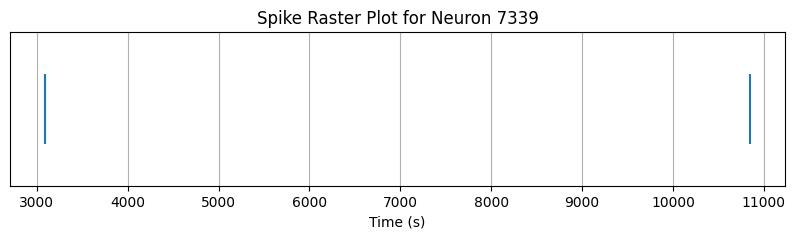

325328


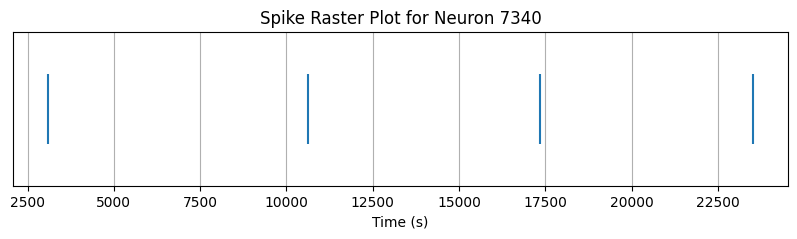

705229


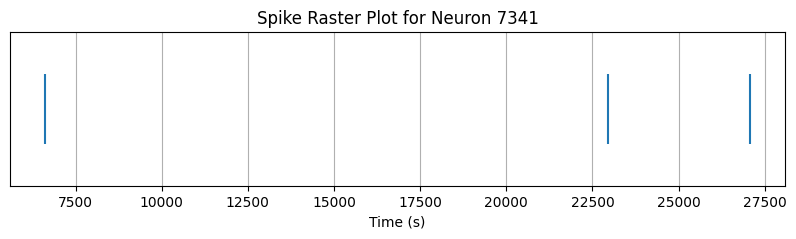

812019


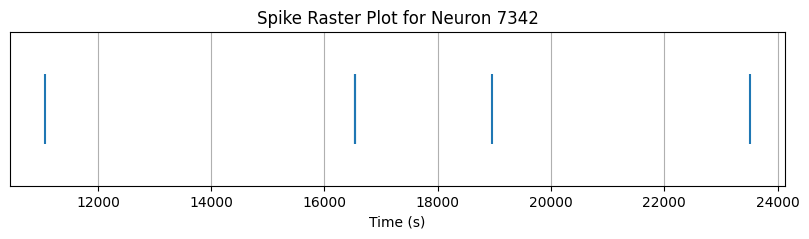

705288


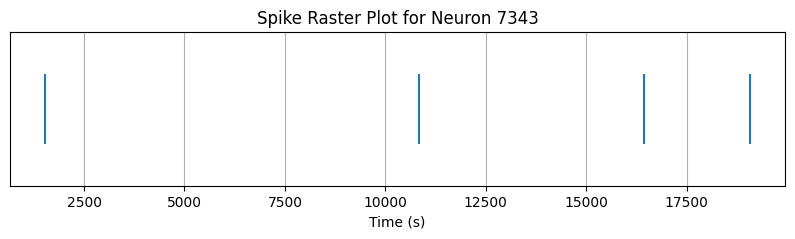

572184


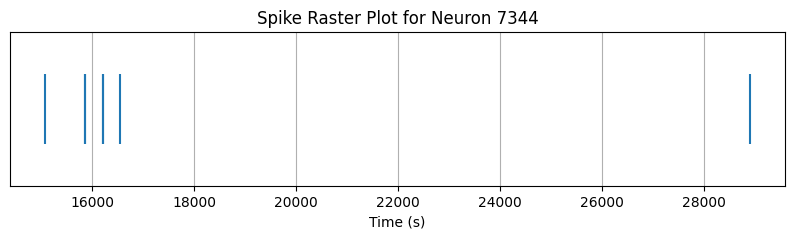

866771


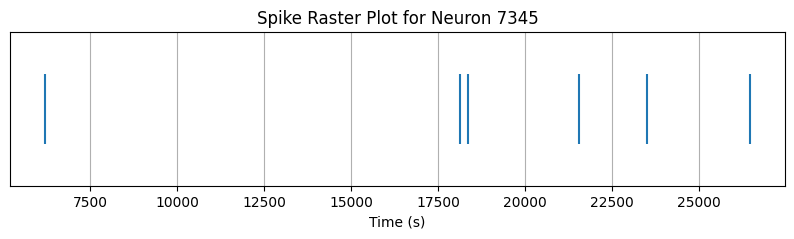

793965


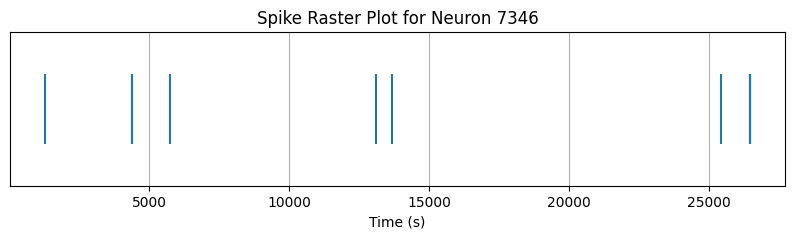

794142


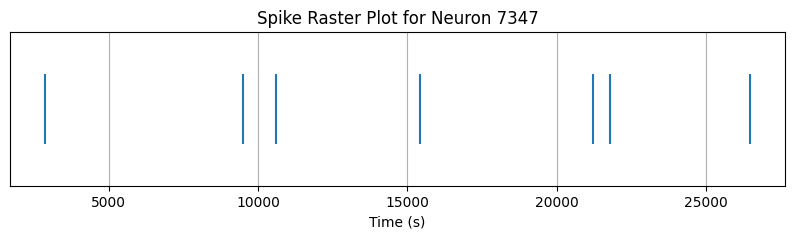

794201


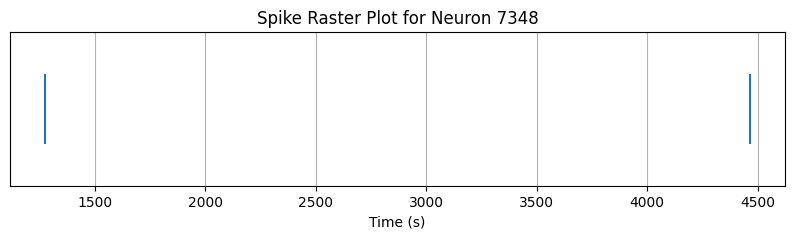

133932


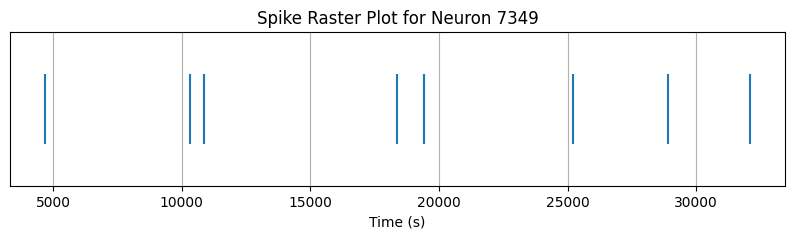

962469


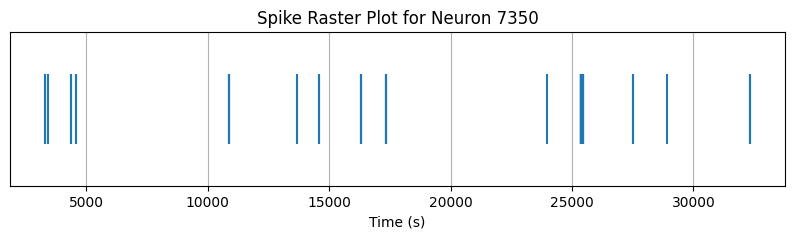

969490


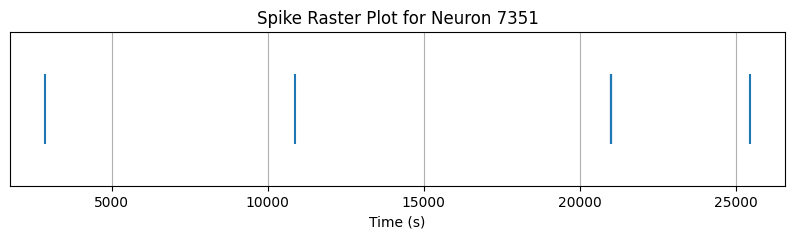

763639


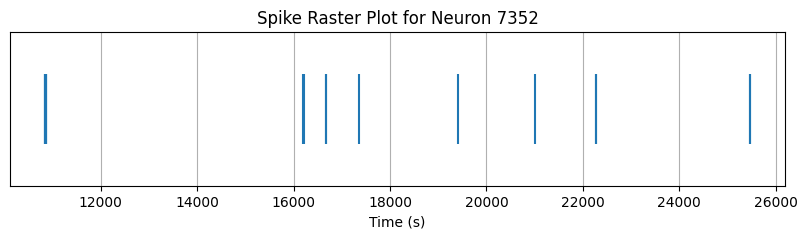

763816


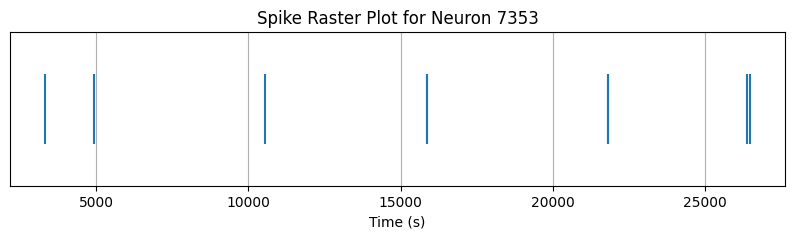

794260


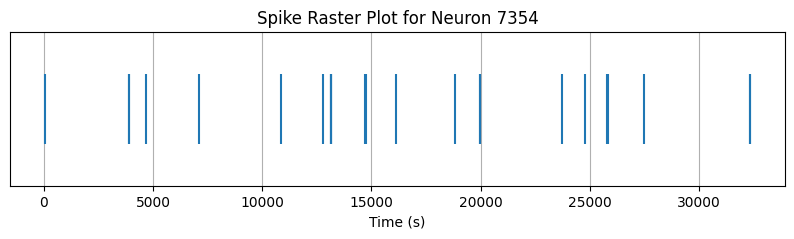

969608


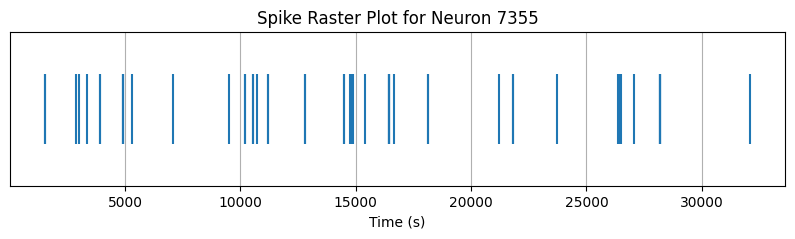

962528


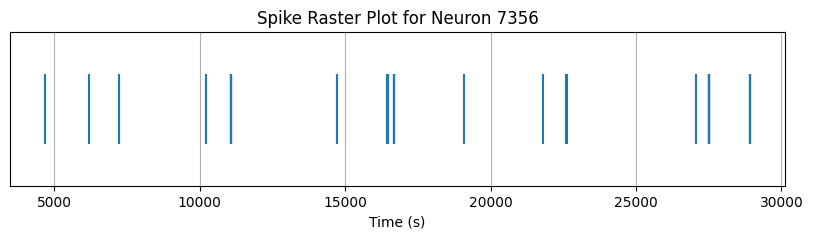

867302


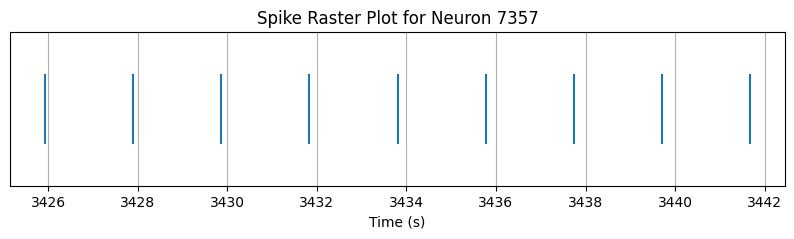

103252


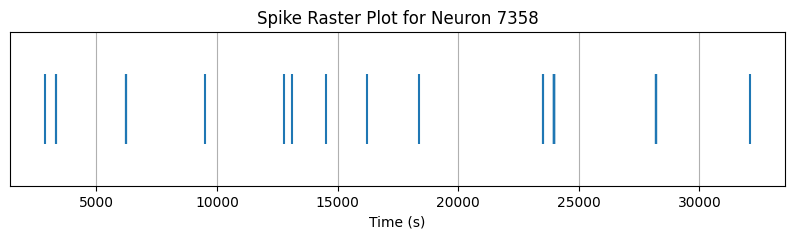

962587


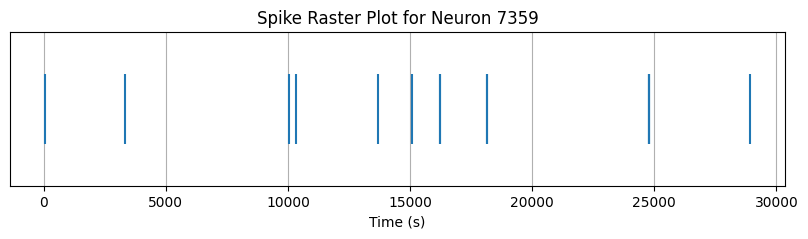

867361


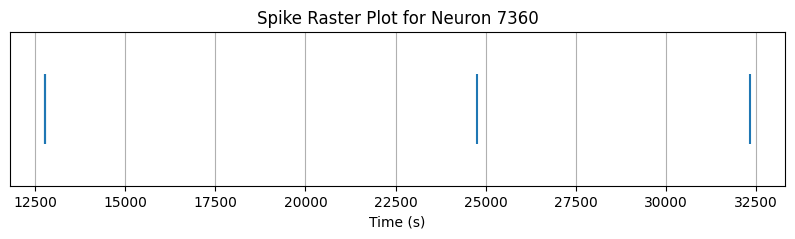

969667


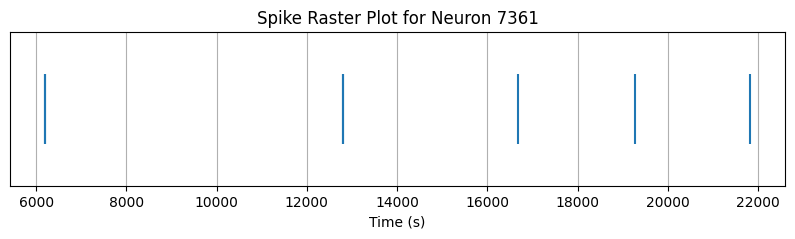

654548


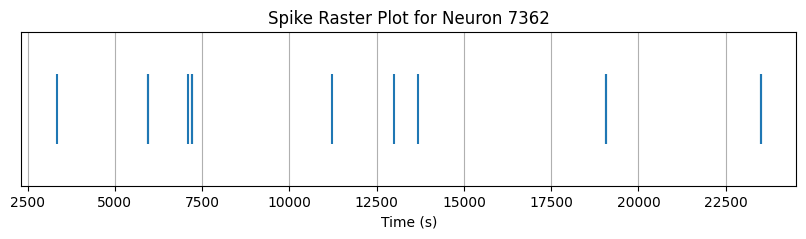

705406


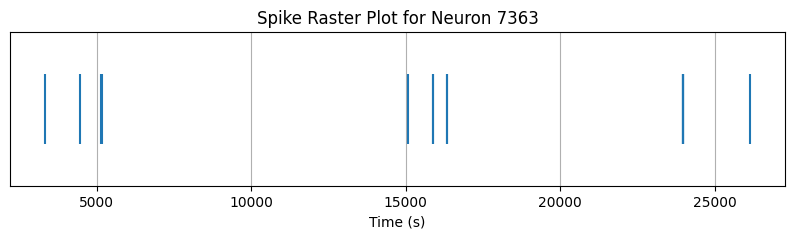

783817


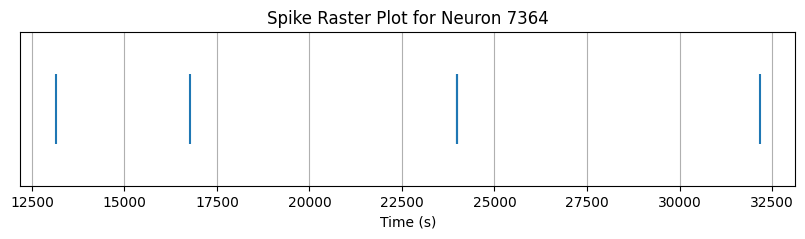

965301


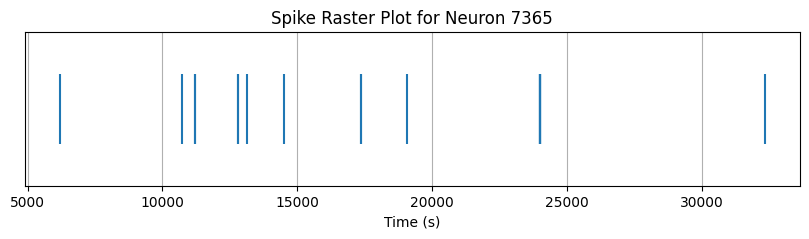

969726


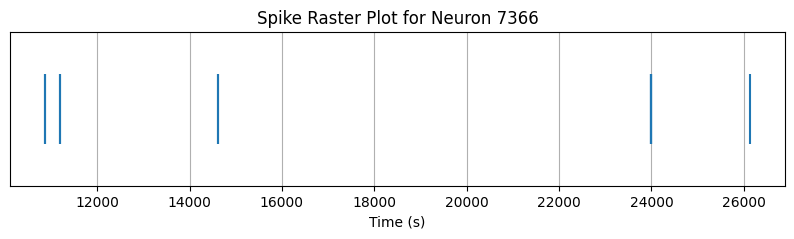

783876


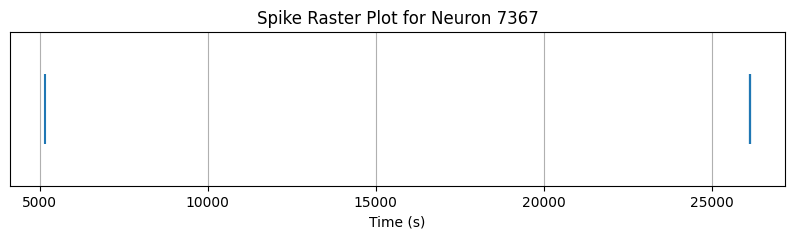

784053


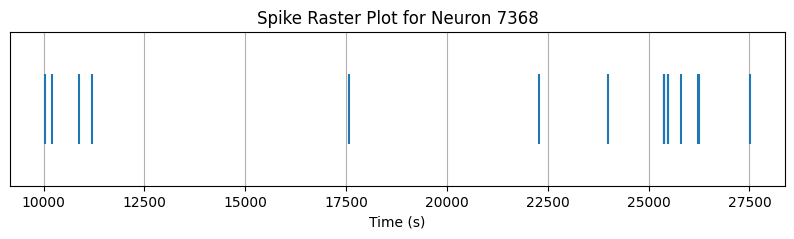

825294


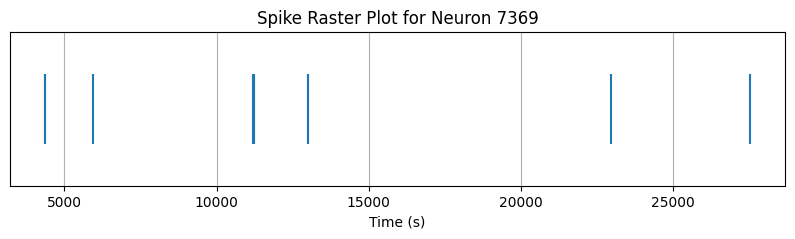

825353


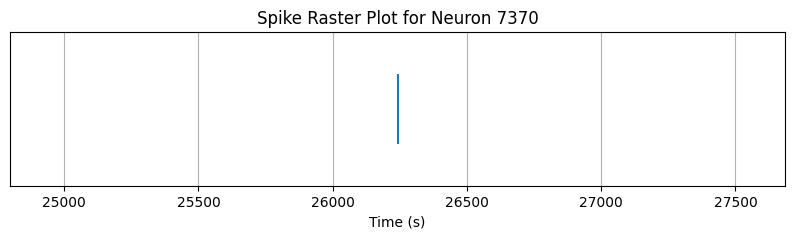

787239


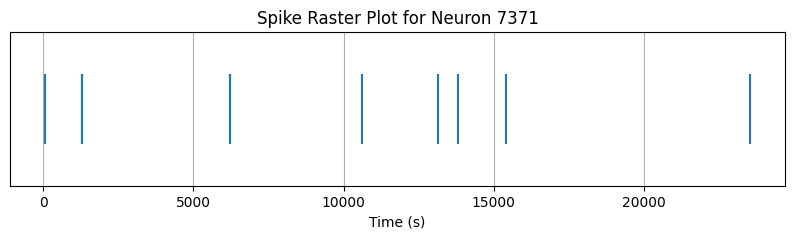

705819


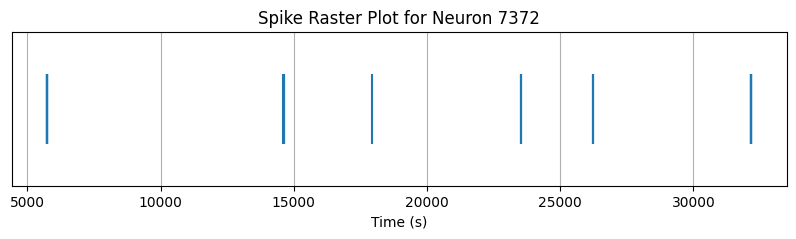

965478


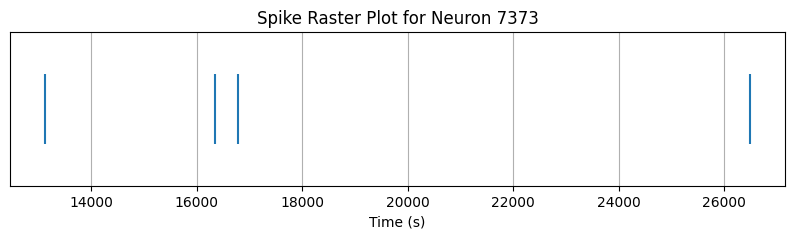

794437


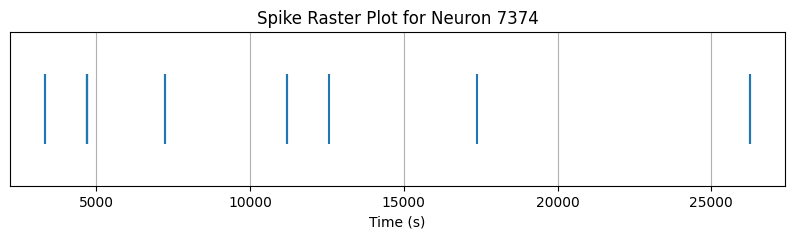

787534


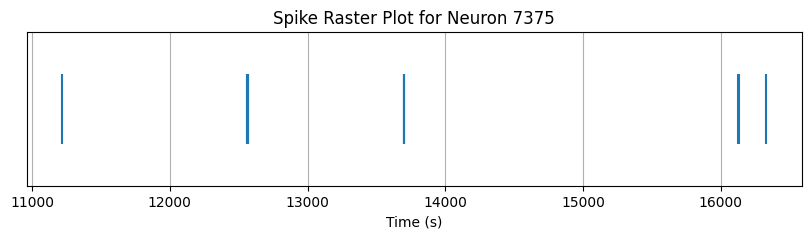

489879


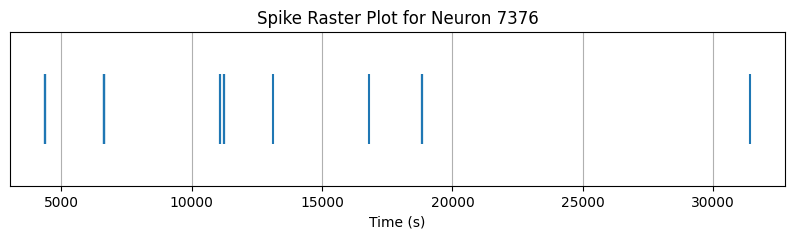

942114


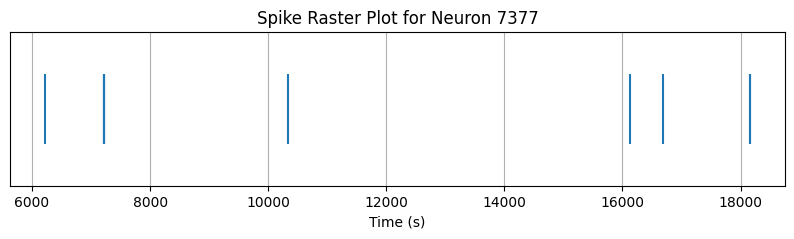

544690


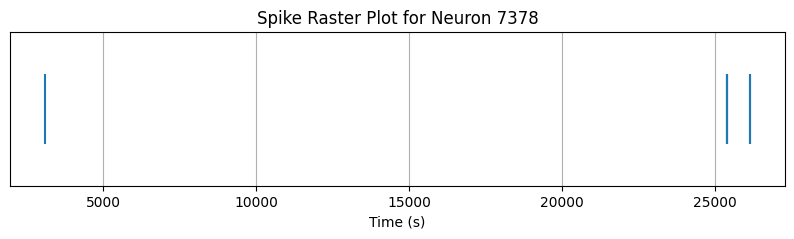

783758


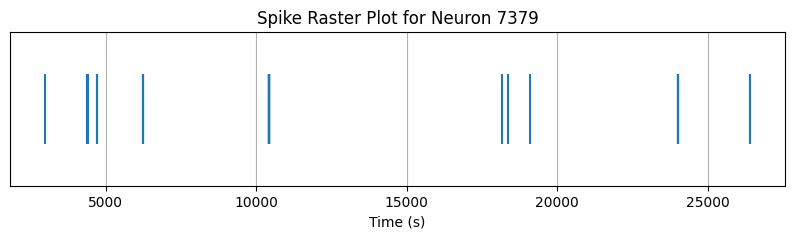

791841


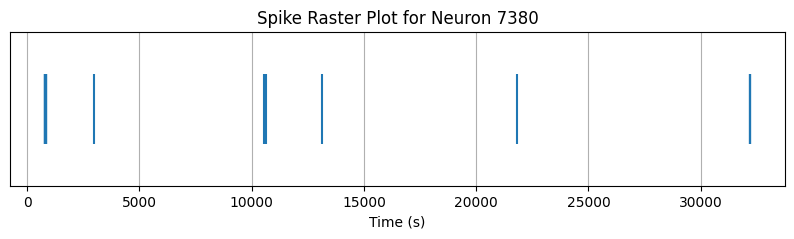

965714


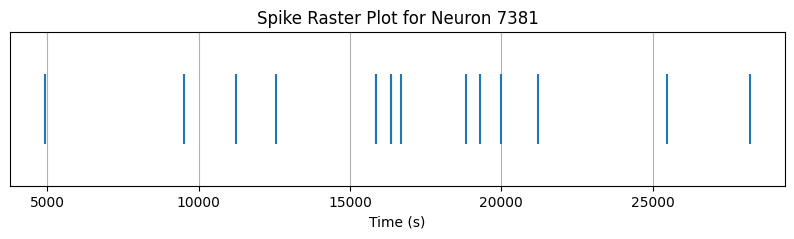

846357


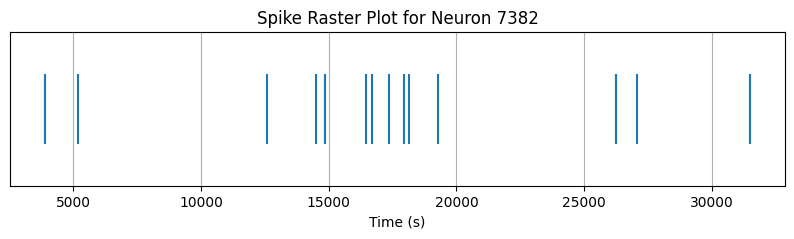

944592


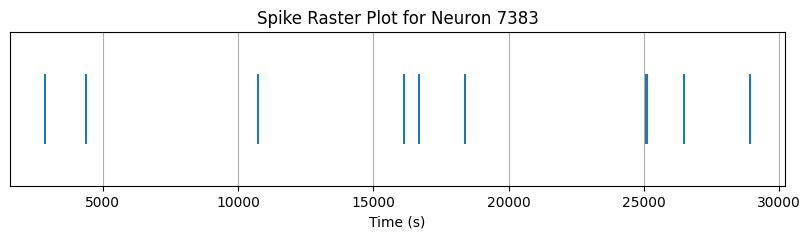

867420


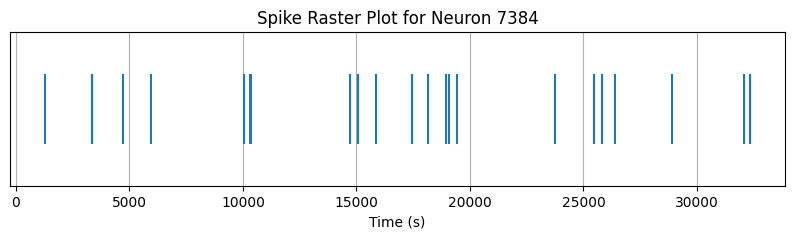

969844


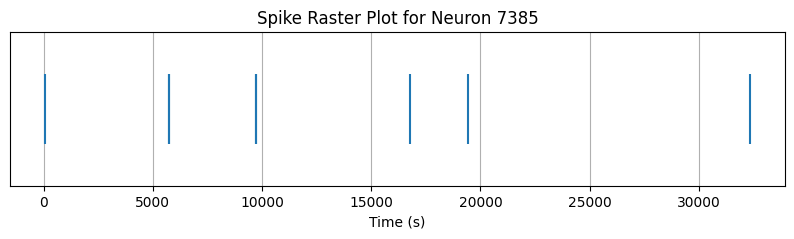

969903


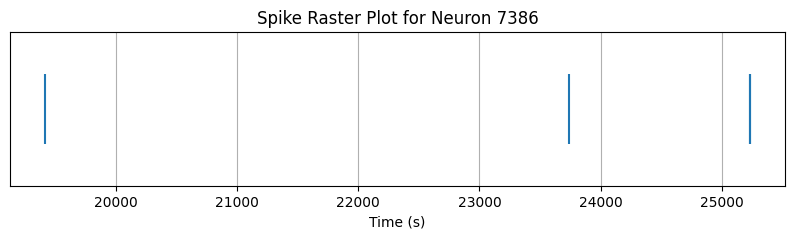

756913


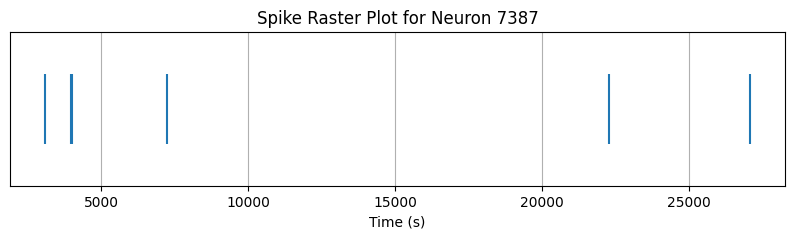

812255


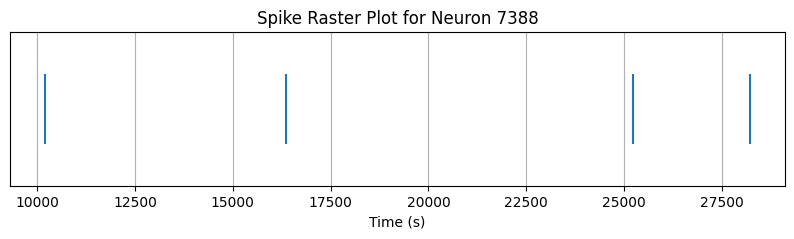

846416


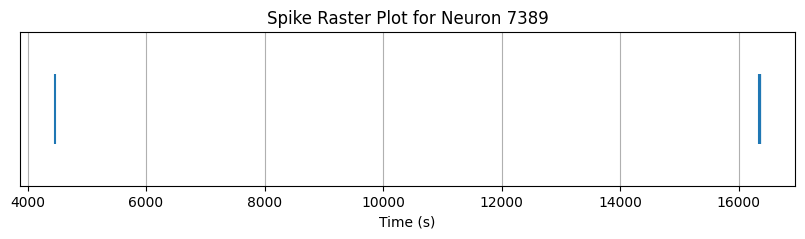

490646


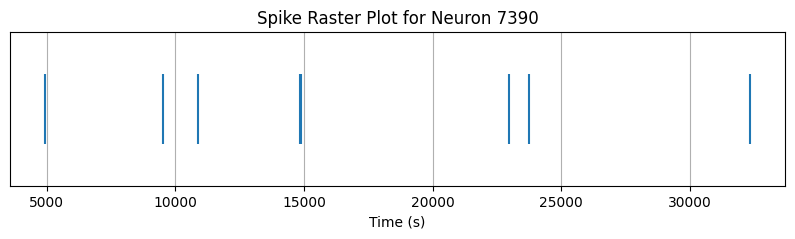

969962


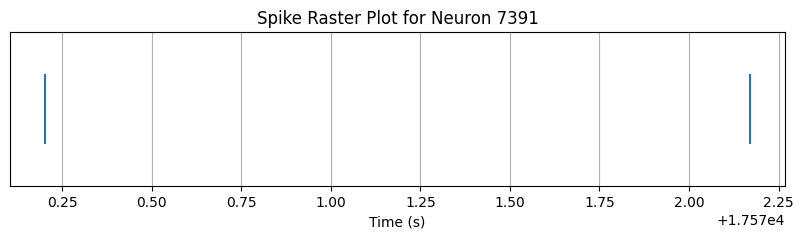

527167


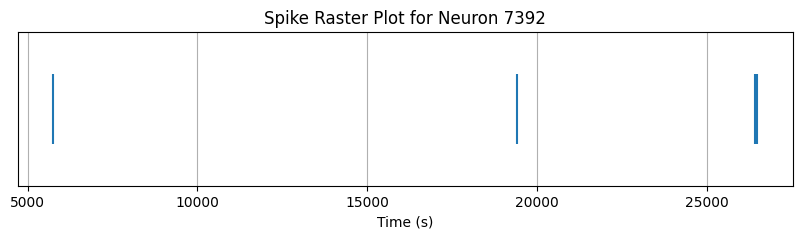

794614


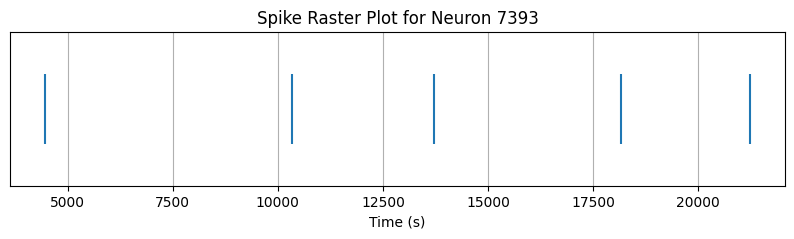

636730


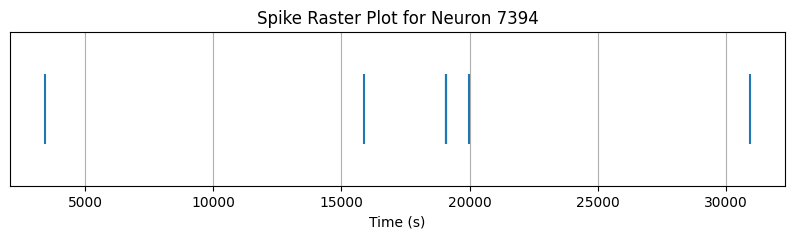

928013


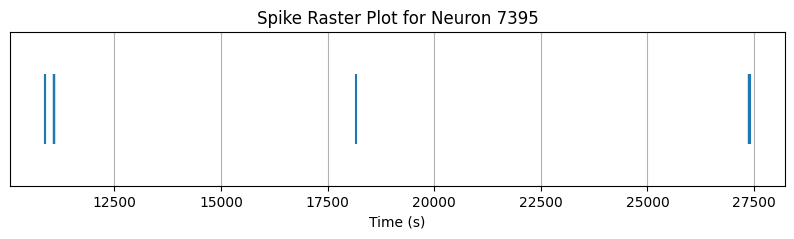

821990


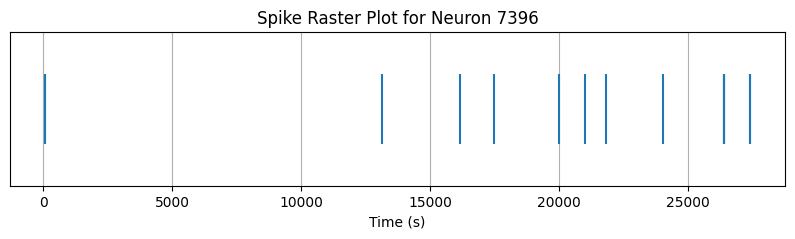

821695


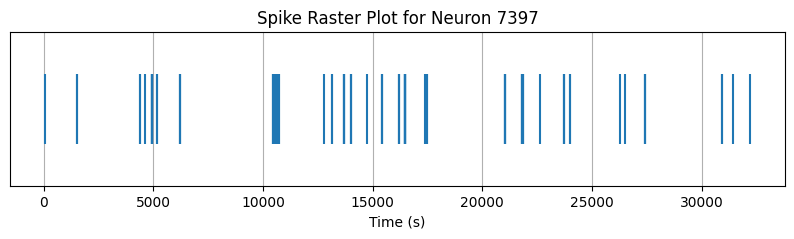

965773


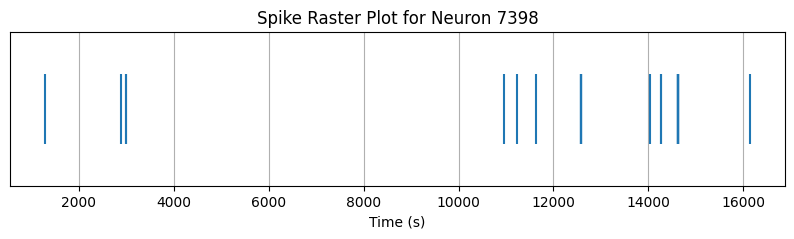

484097


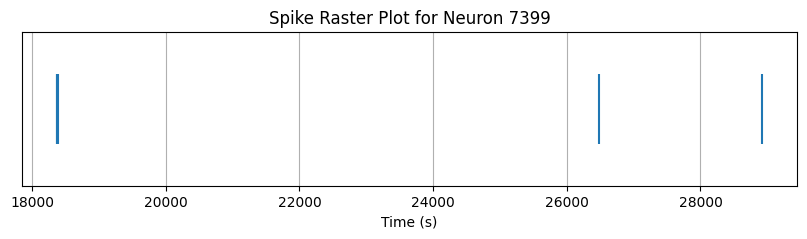

867538


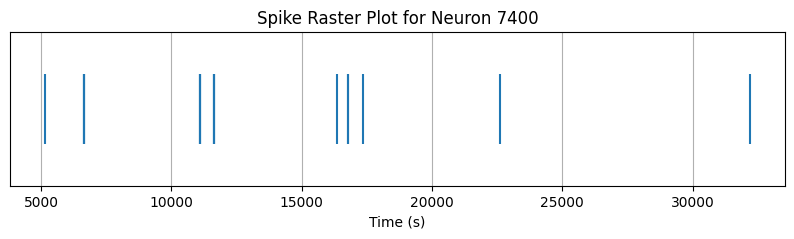

965832


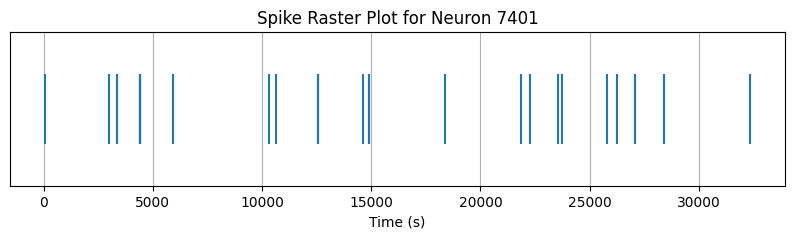

970021


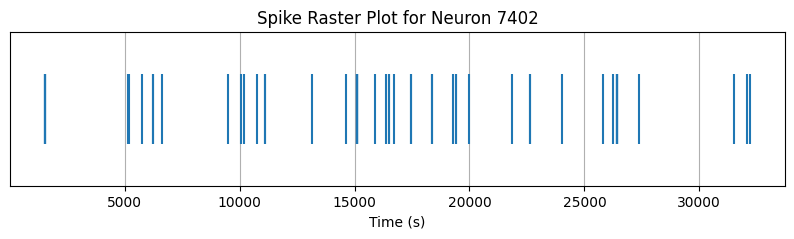

965891


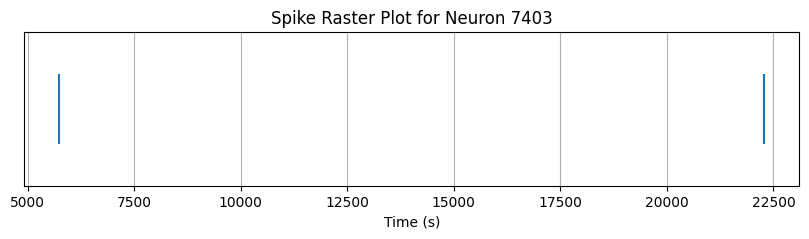

668413


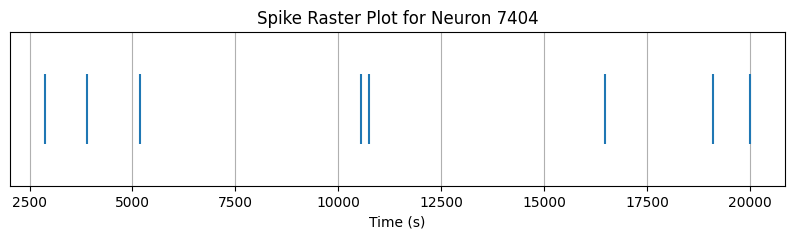

599796


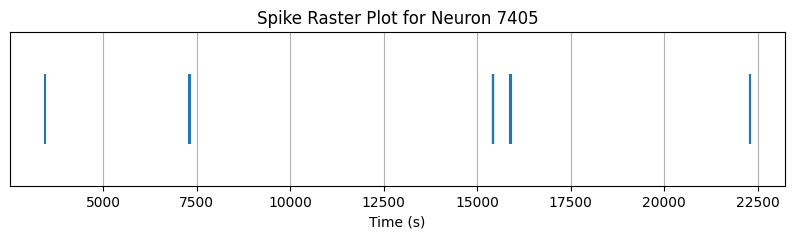

668531


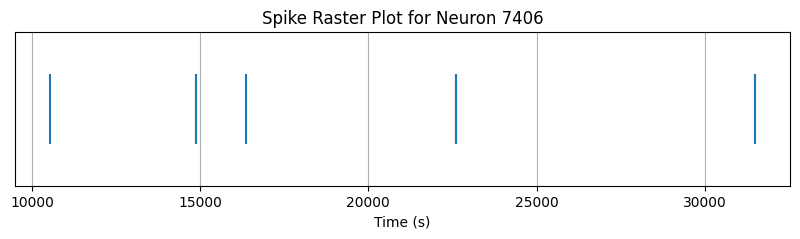

944769


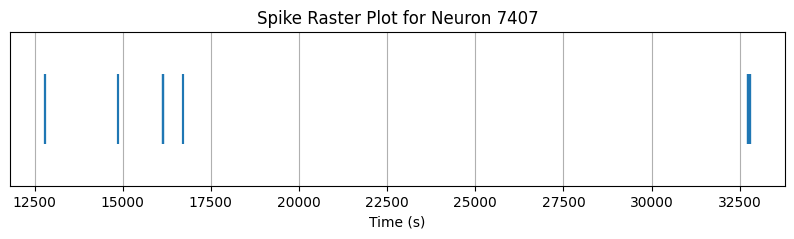

983532


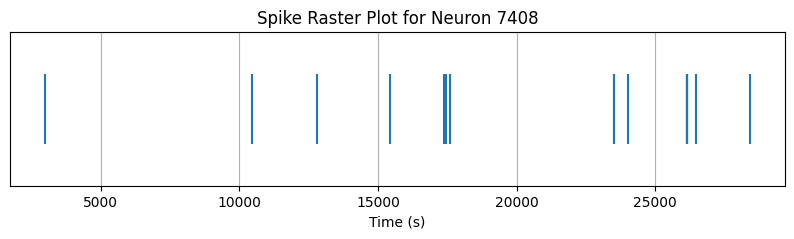

852493


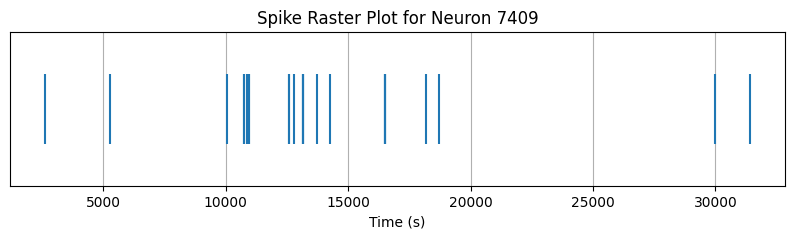

942232


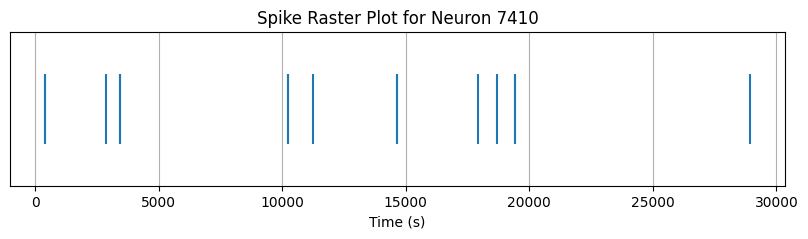

867597


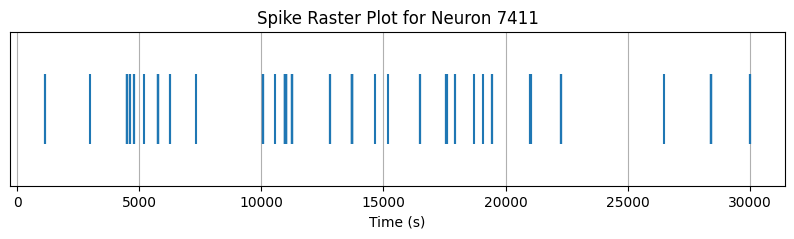

900224


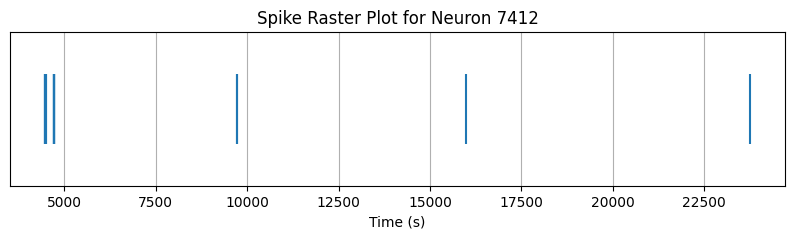

712427


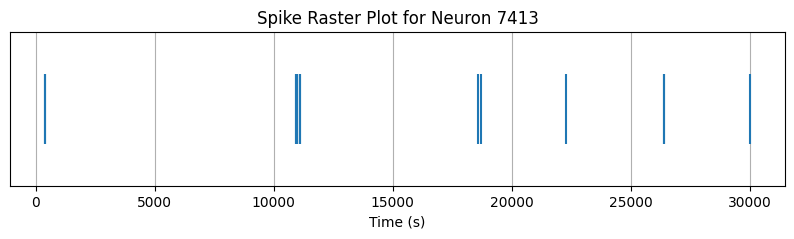

900283


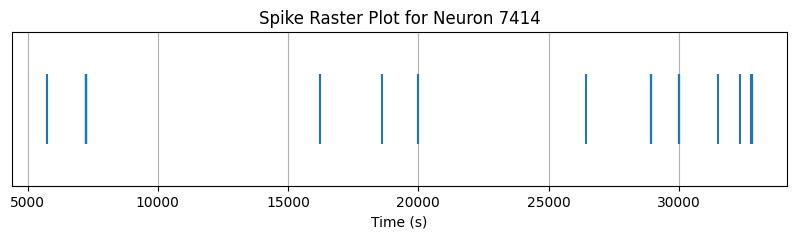

983768


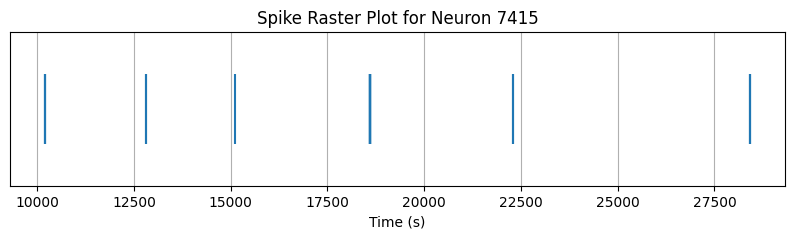

852434


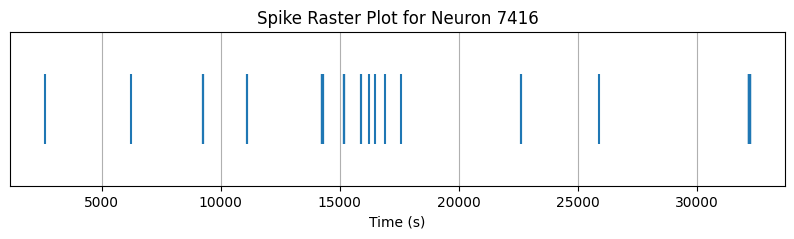

966717


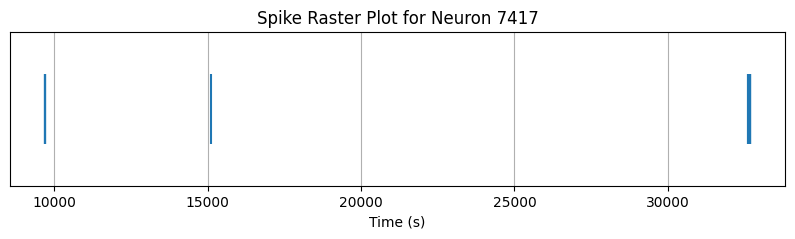

980110


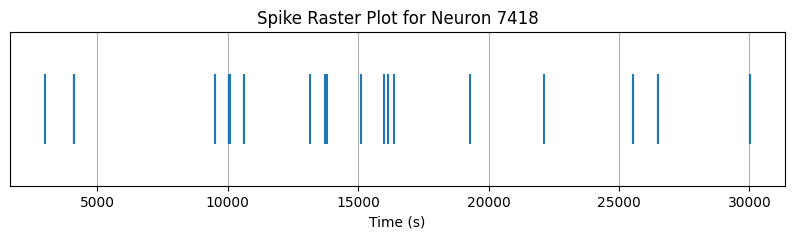

900519


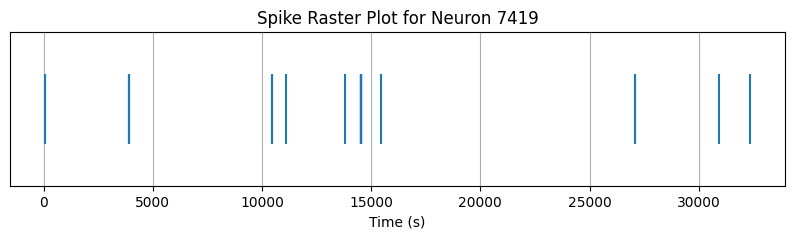

970139


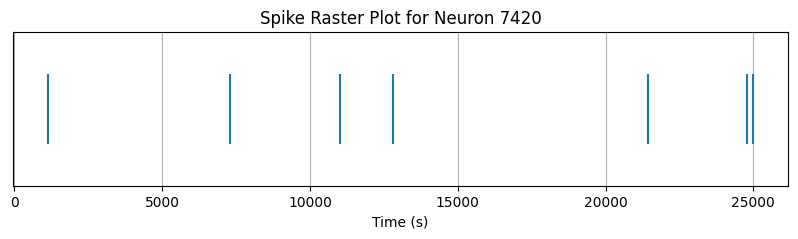

749479


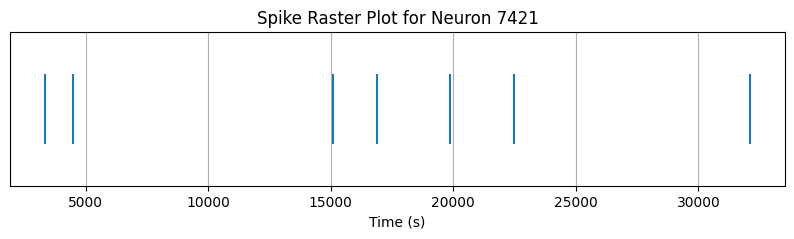

962764


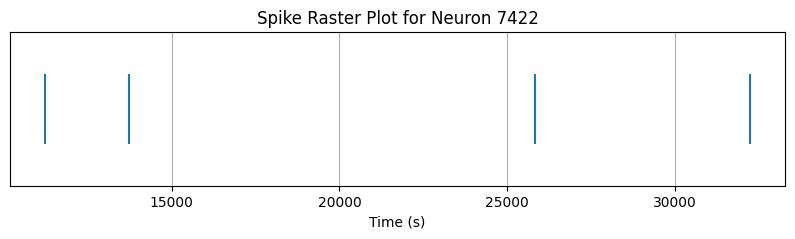

966776


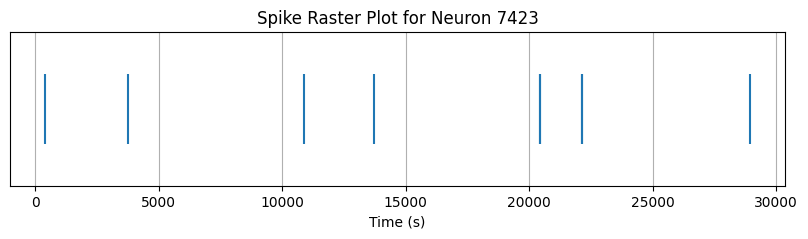

867892


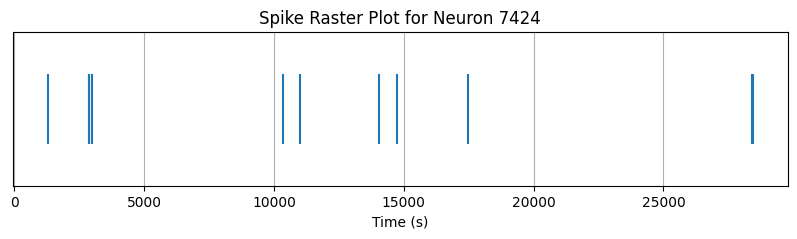

852965


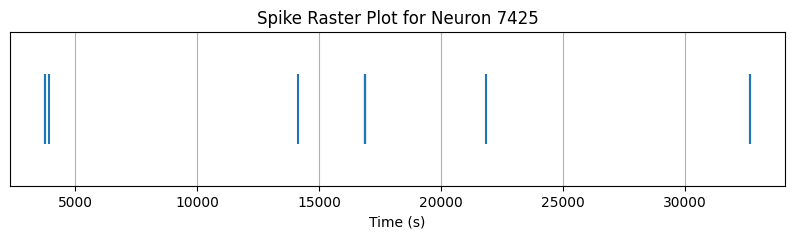

980228


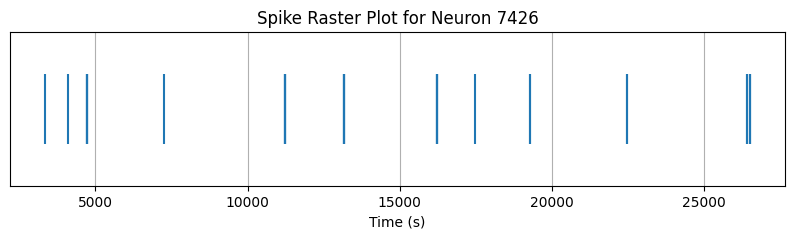

795086


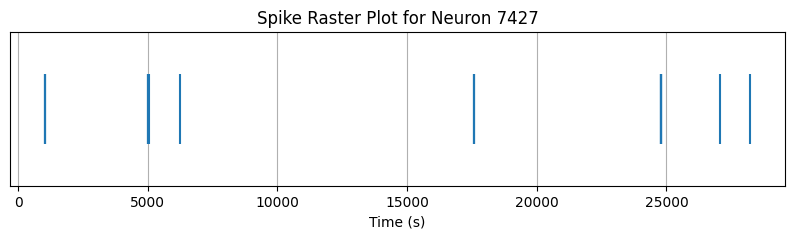

846475


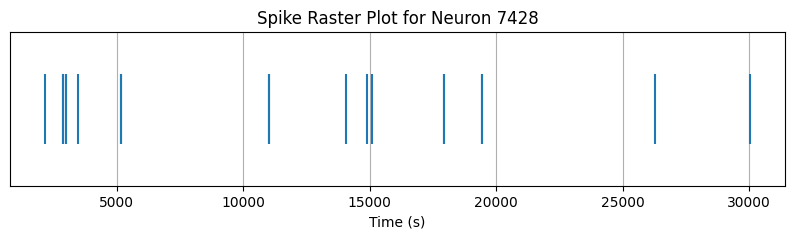

900578


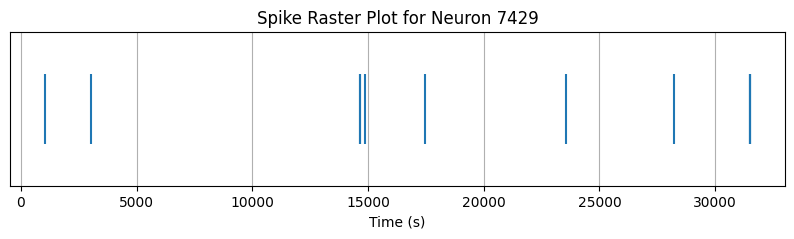

945005


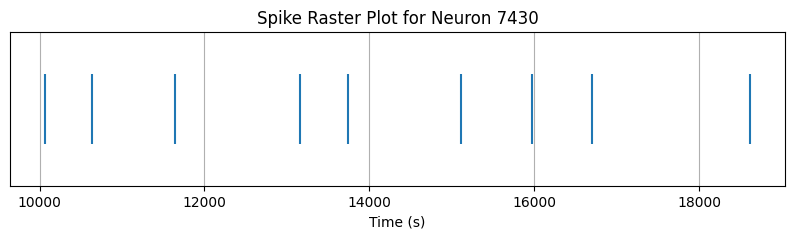

558496


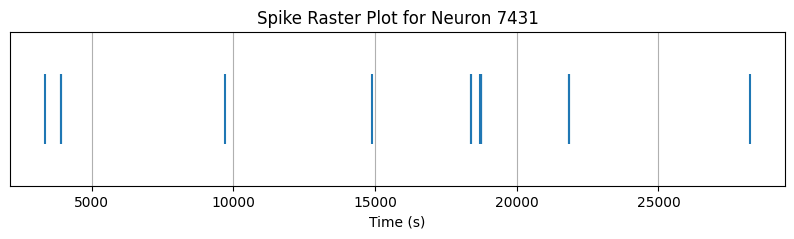

846652


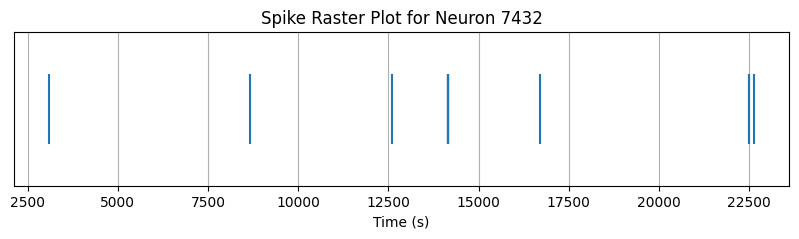

678856


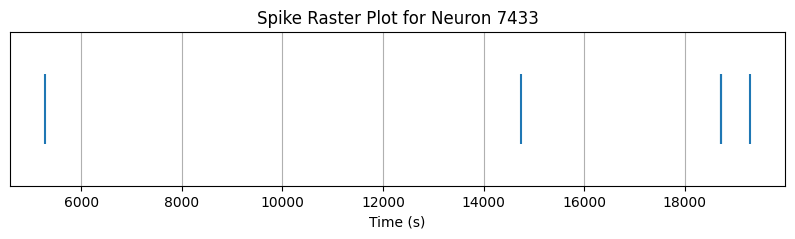

578851


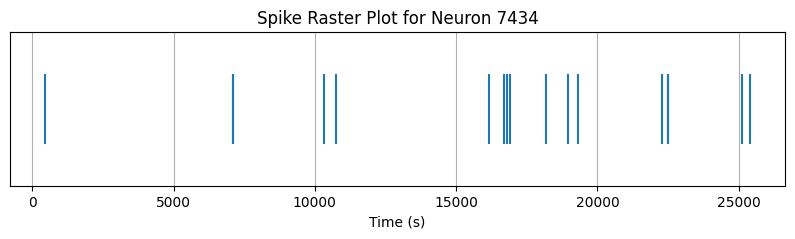

761751


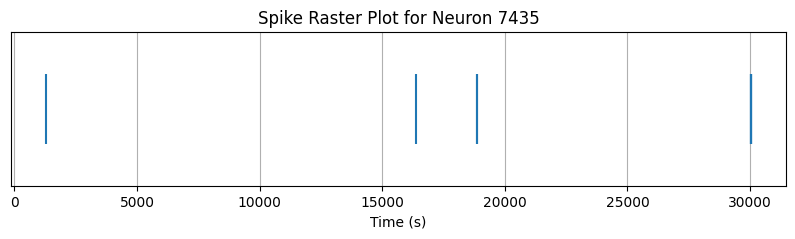

900873


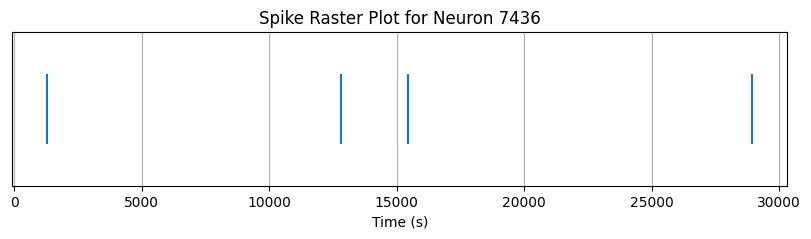

867951


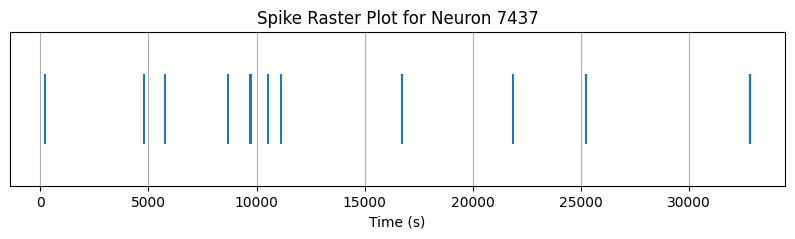

984063


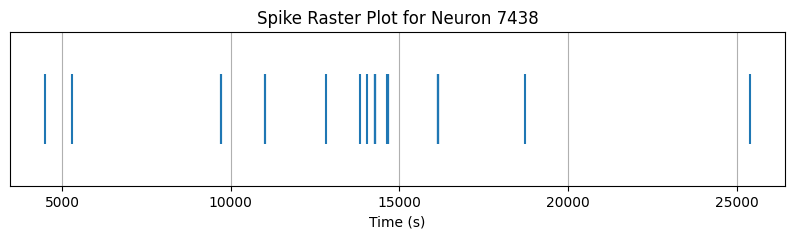

761810


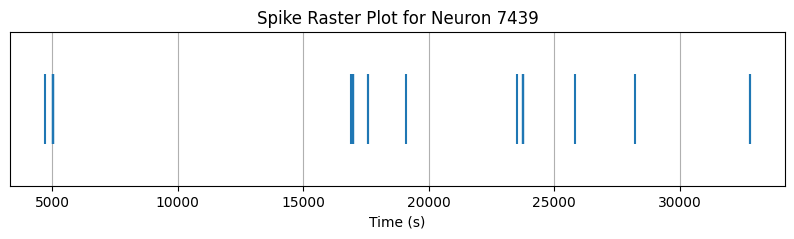

983945


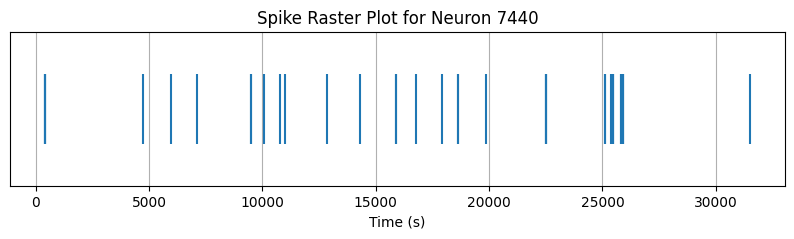

945064


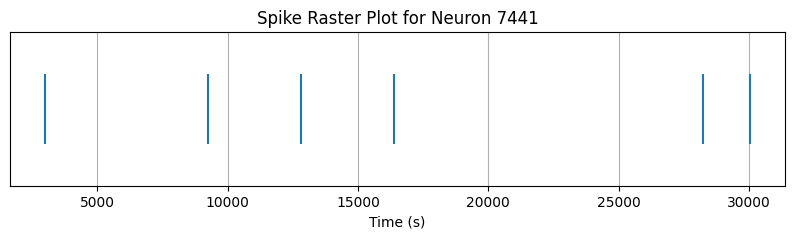

900932


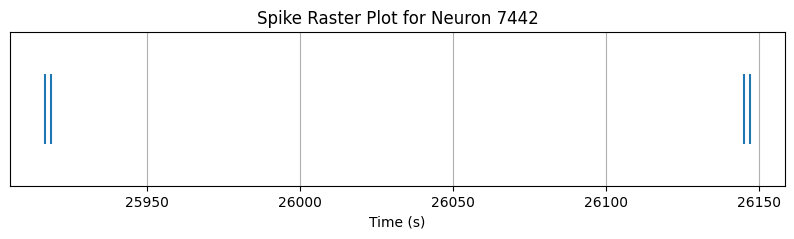

784407


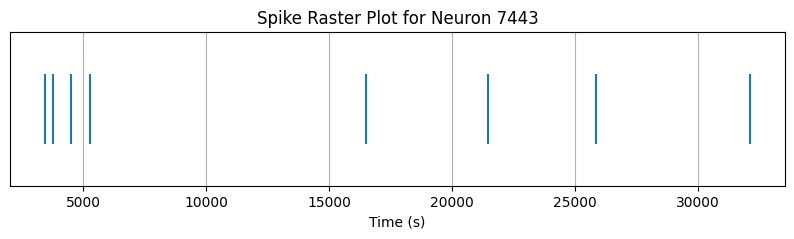

962941


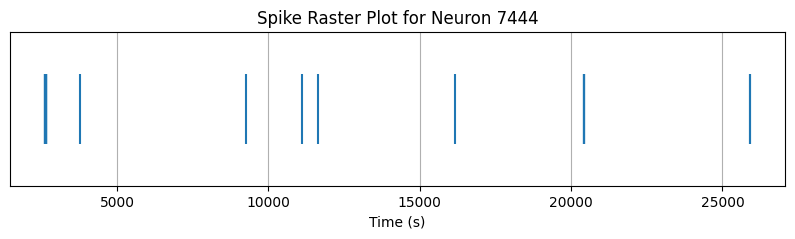

777150


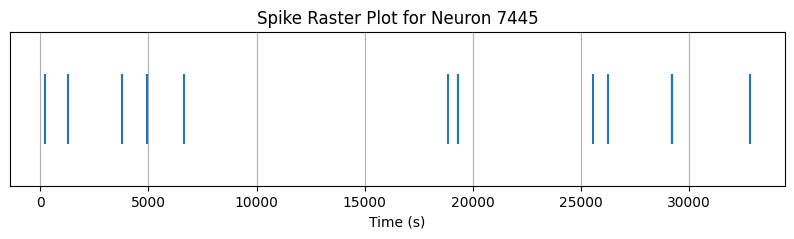

984122


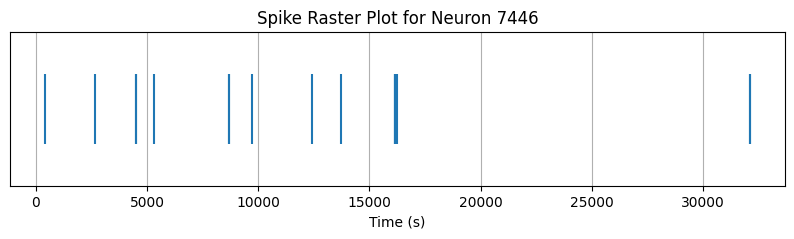

963059


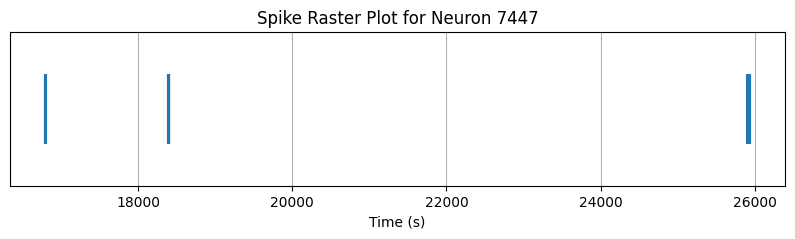

778094


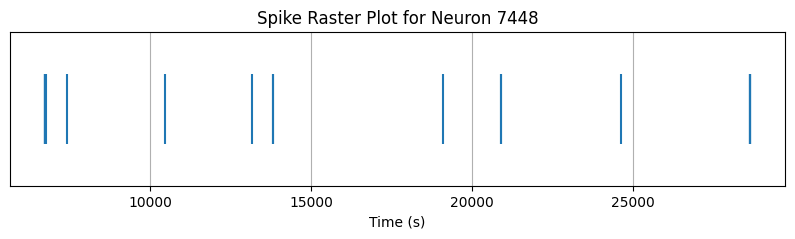

859160


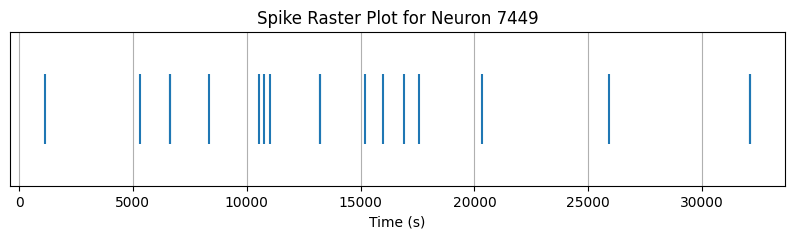

962882


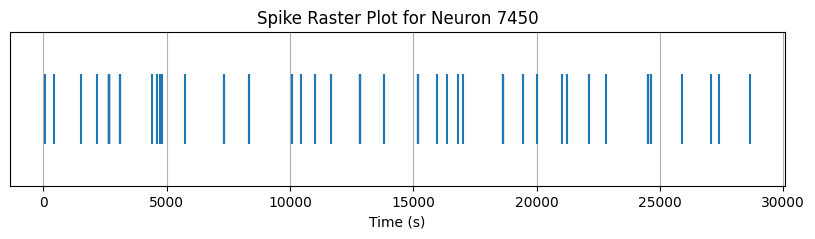

859219


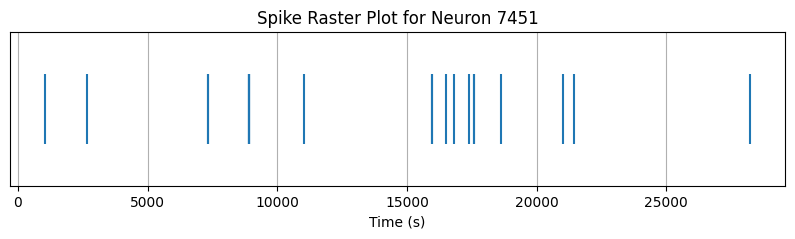

846770


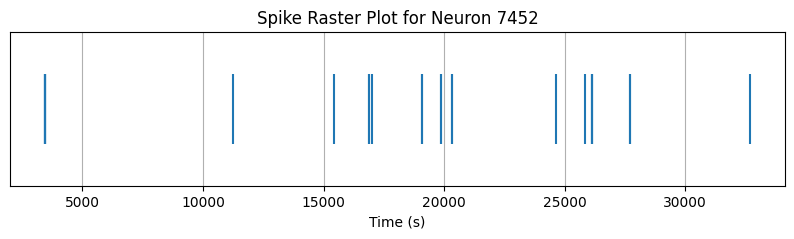

980287


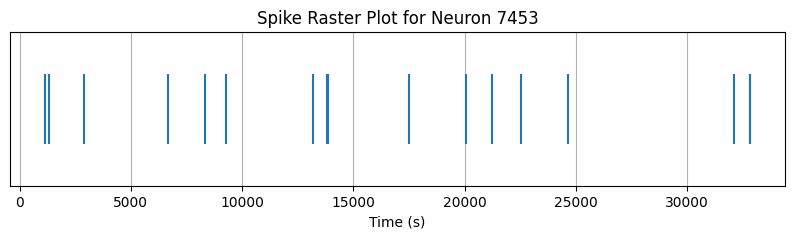

984240


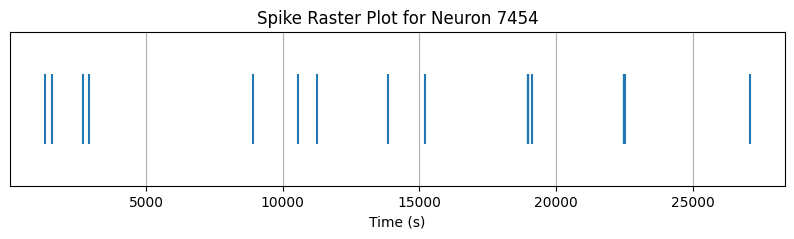

812668


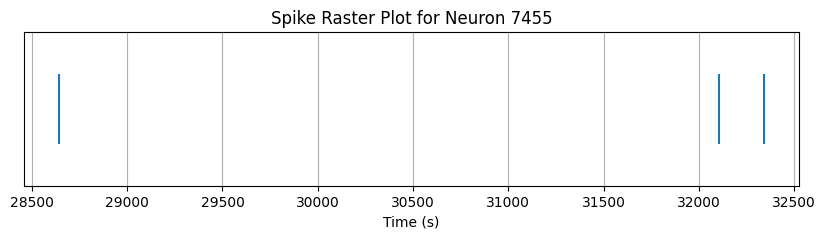

970198


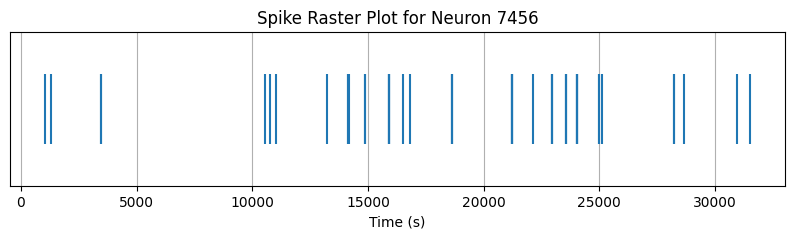

945123


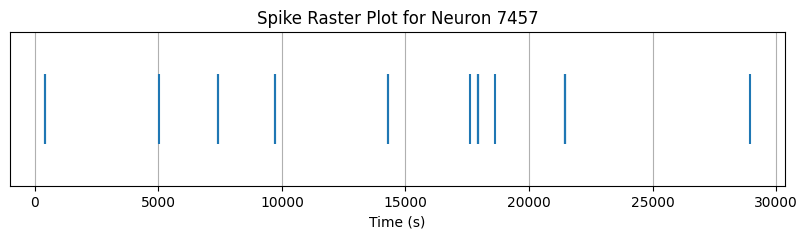

868010


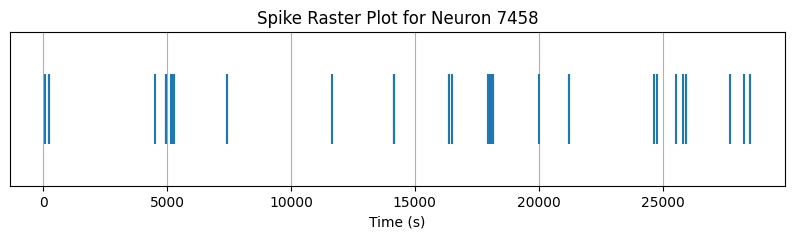

855620


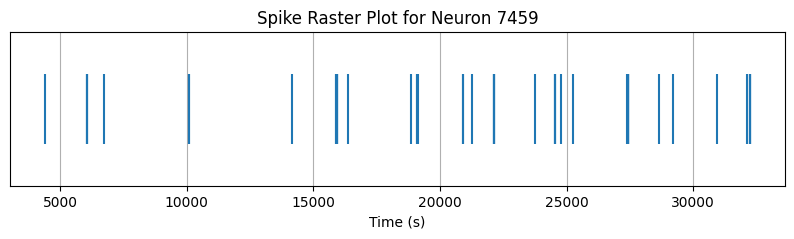

967012


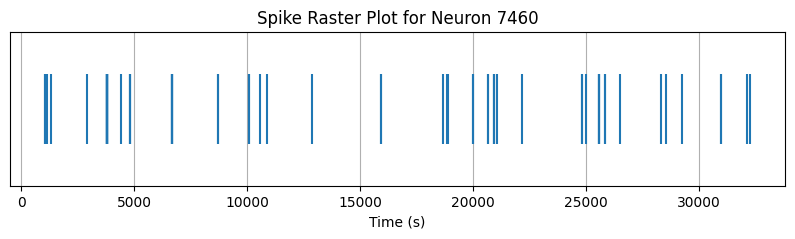

967071


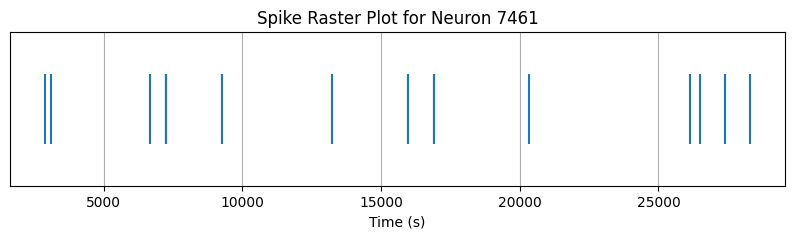

848835


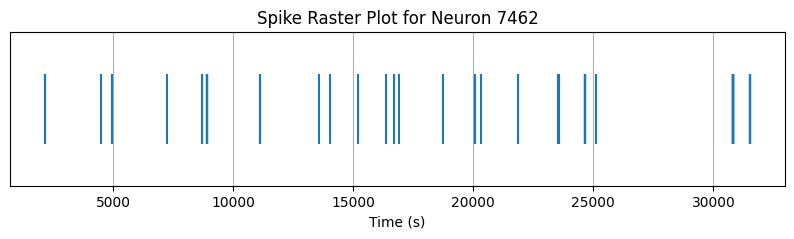

945477


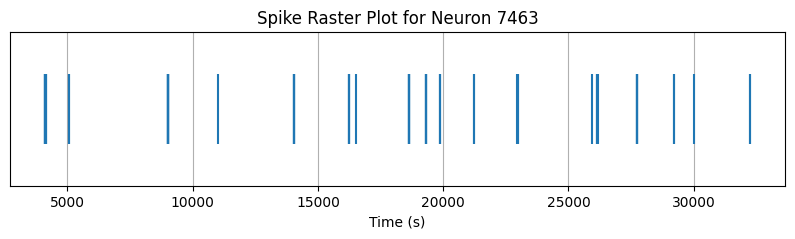

967189


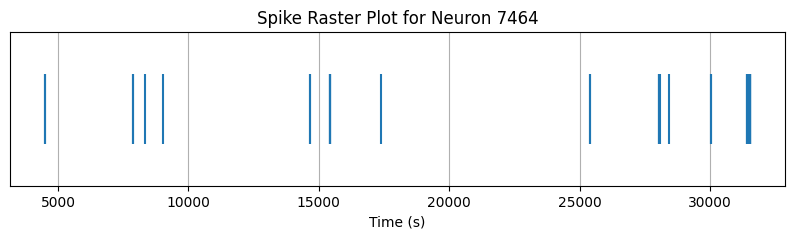

945890


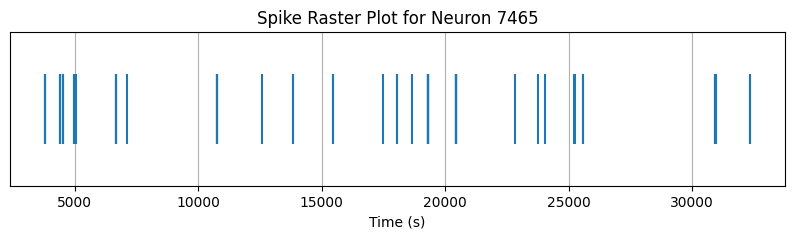

970316


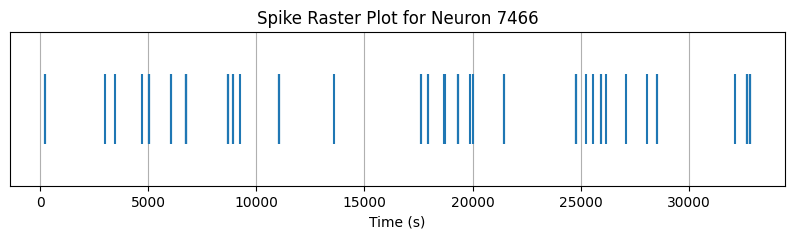

984417


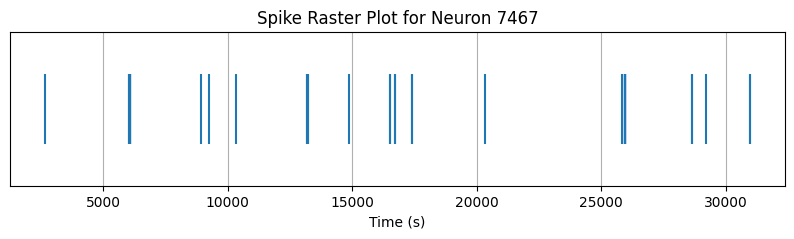

928839


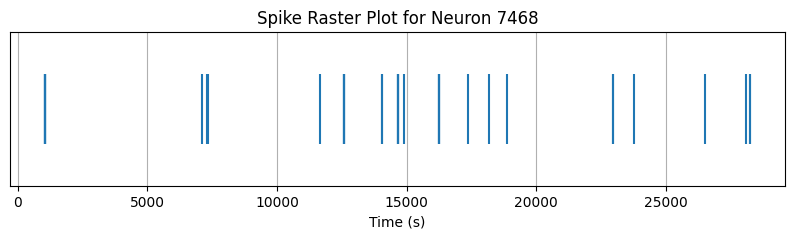

847006


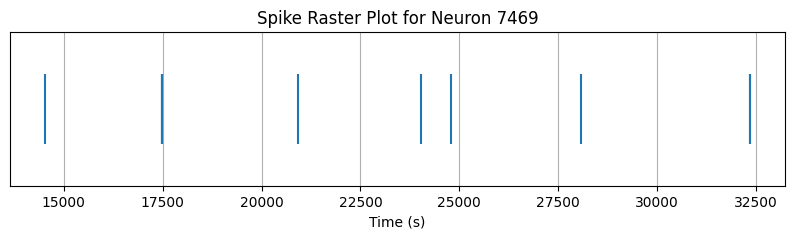

970434


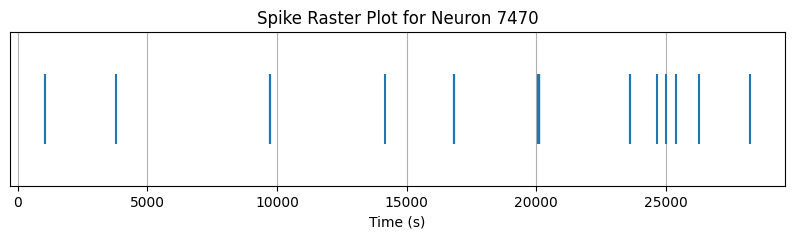

847065


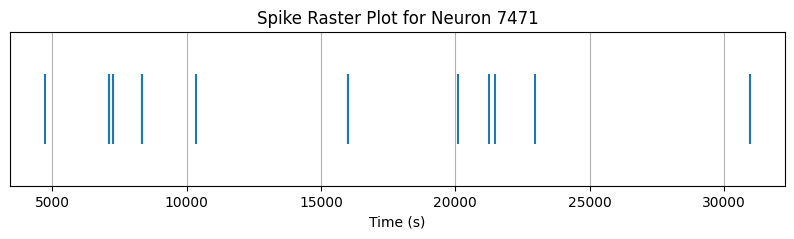

928898


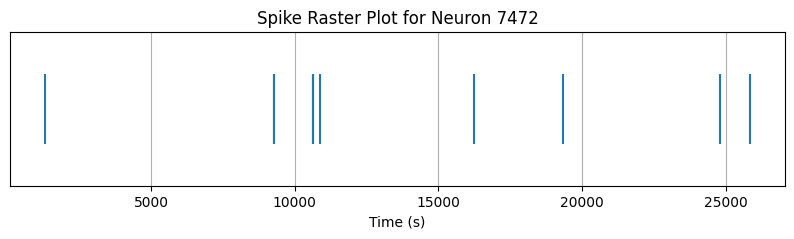

775203


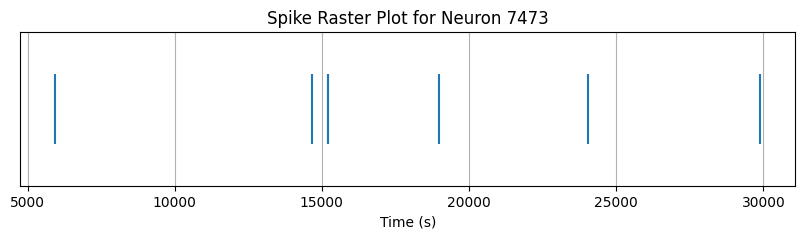

896625


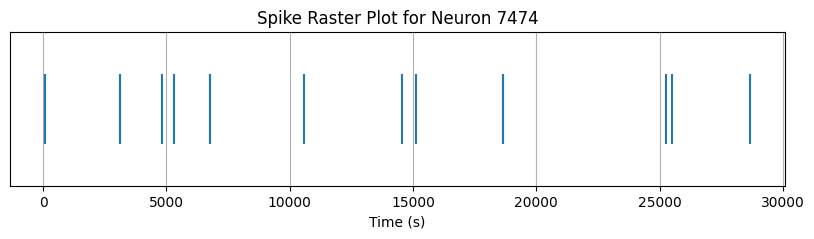

859573


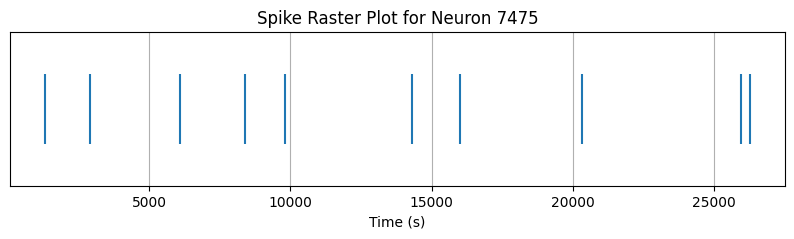

788065


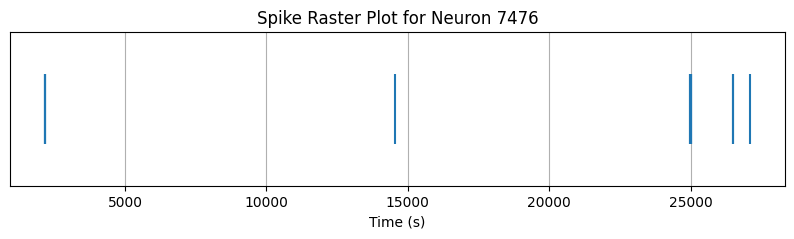

812727


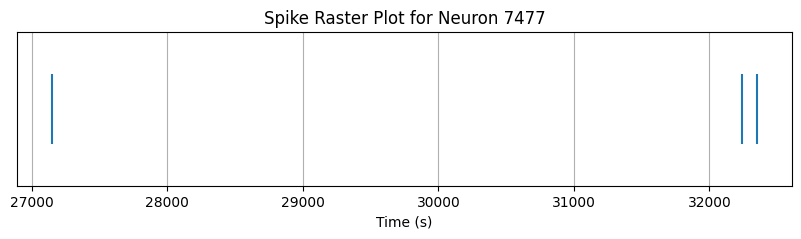

970493


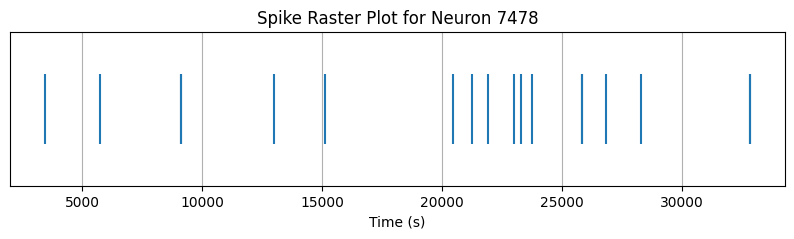

984535


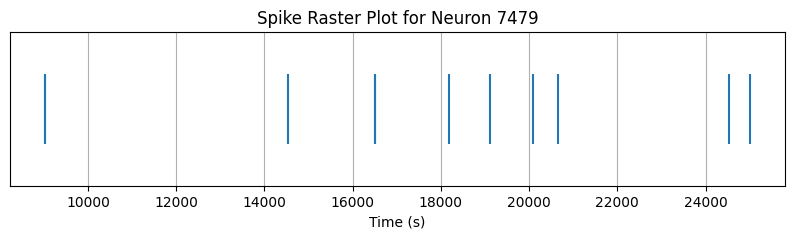

750069


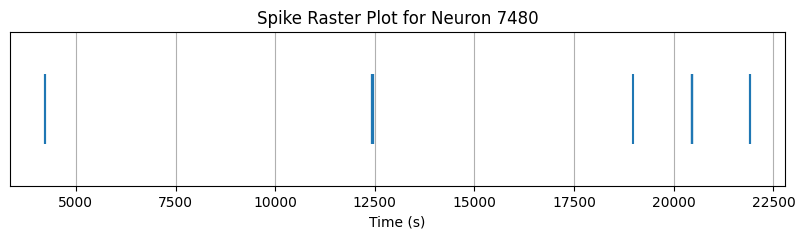

657203


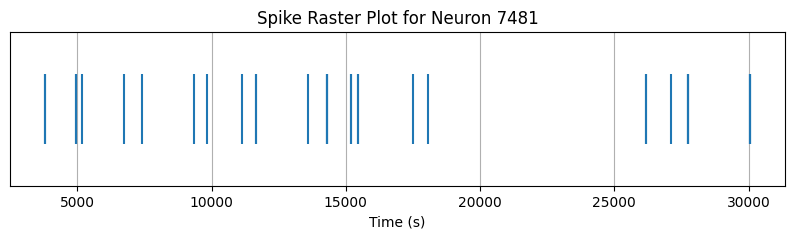

901286


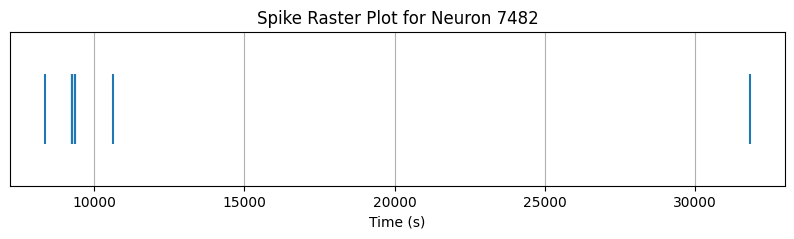

954799


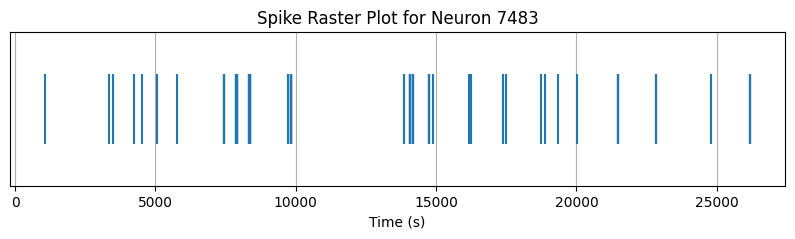

785292


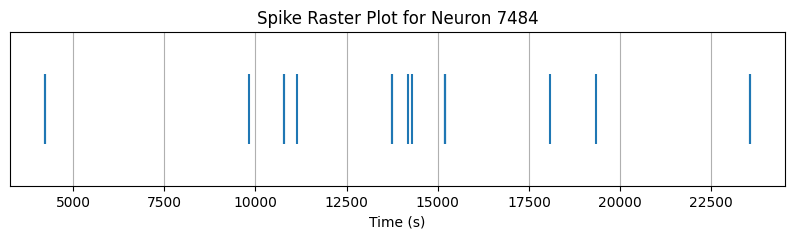

706704


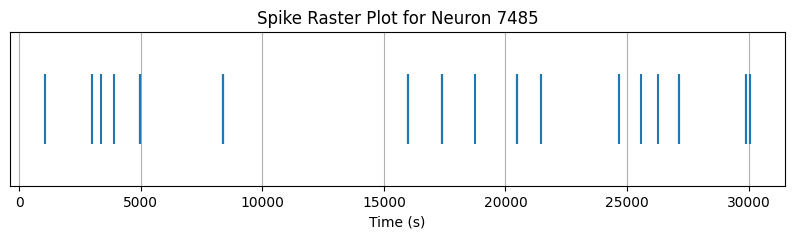

901404


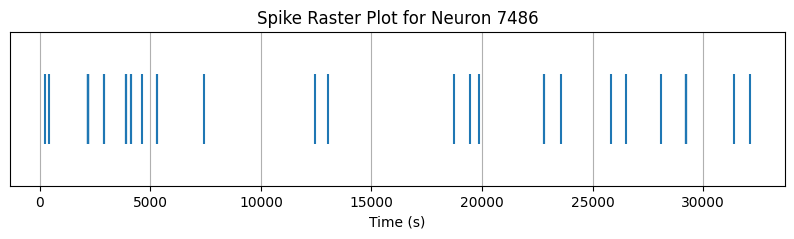

963413


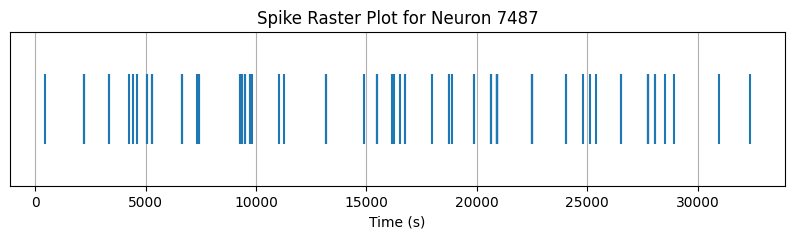

970552


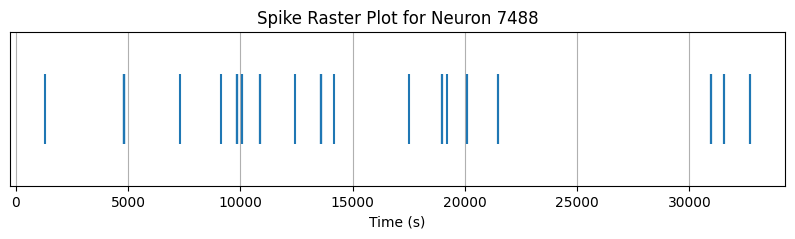

980582


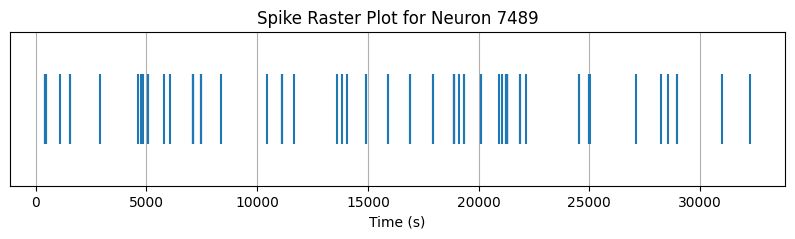

967307


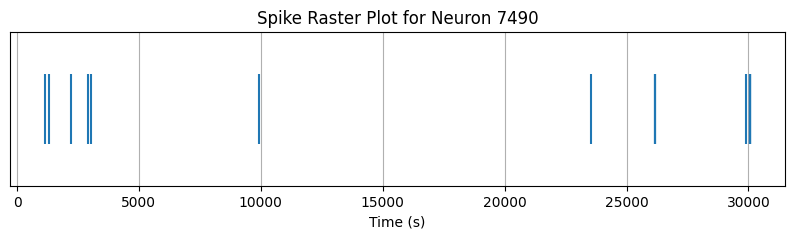

901699


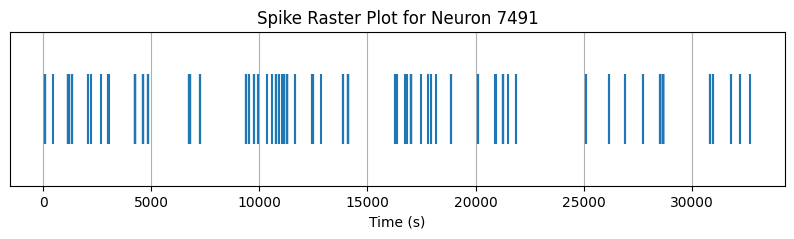

980641


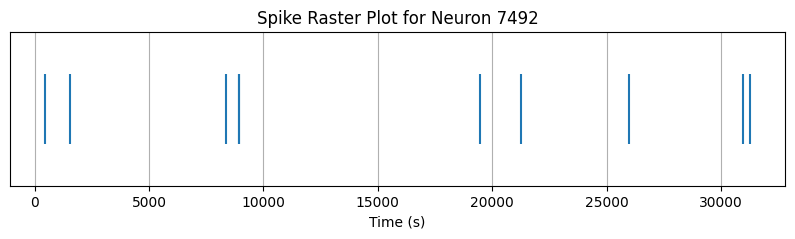

937689


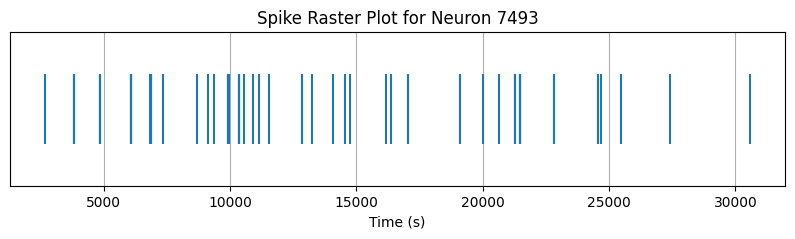

917157


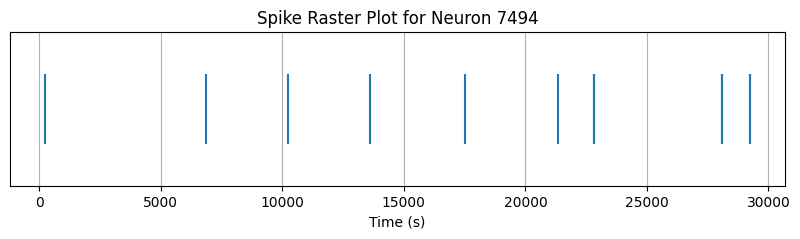

876919


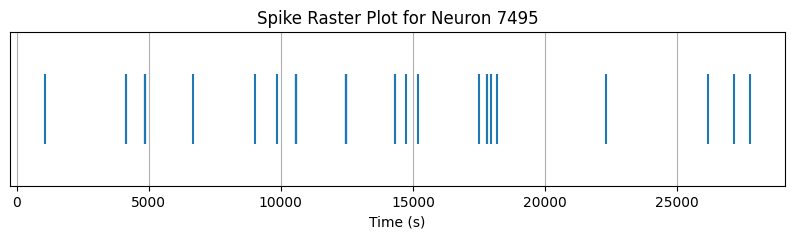

832610


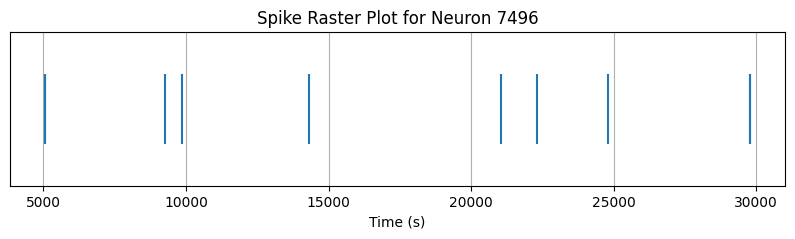

893262


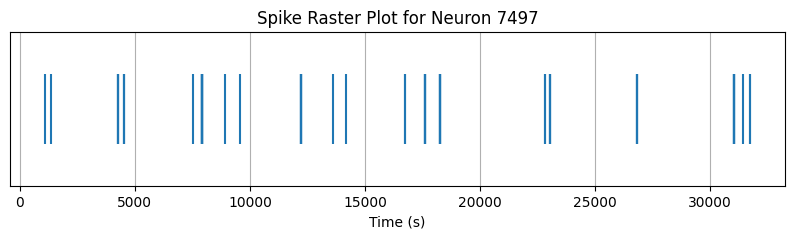

951436


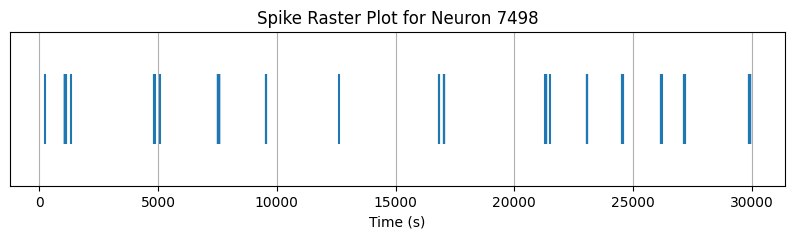

897333


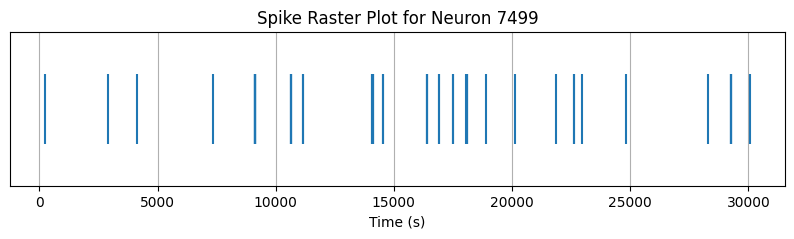

901758


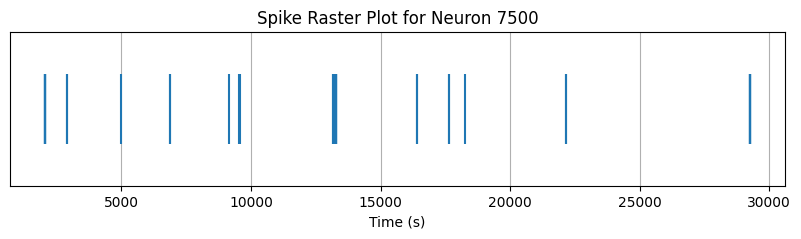

877391


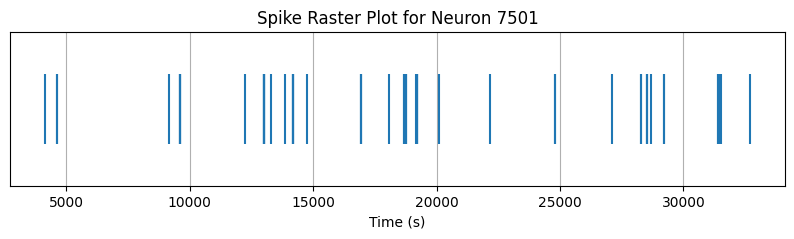

980700


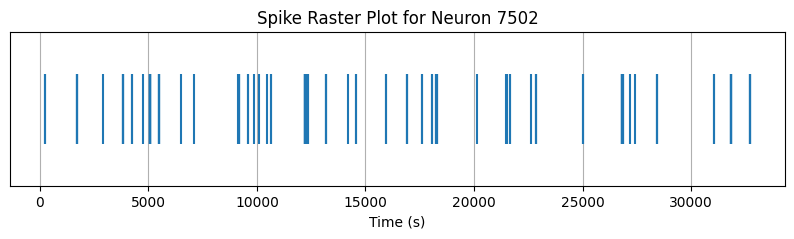

980936


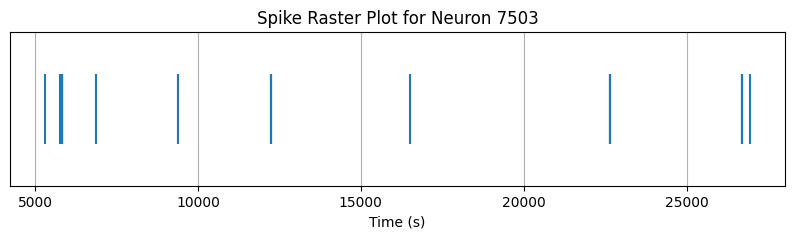

808184


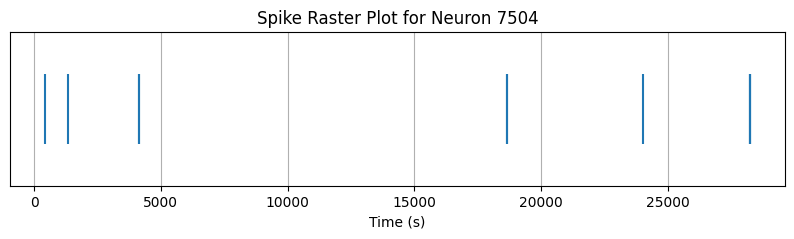

847301


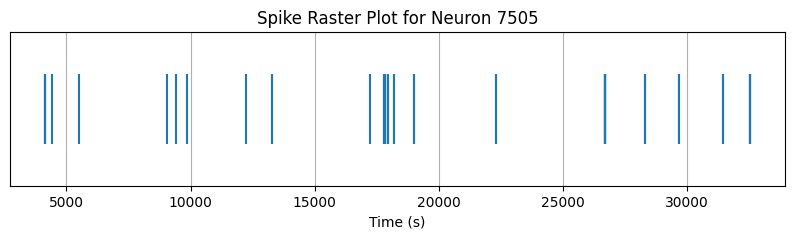

975508


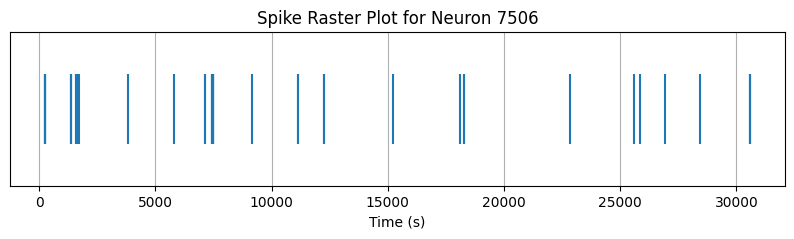

917334


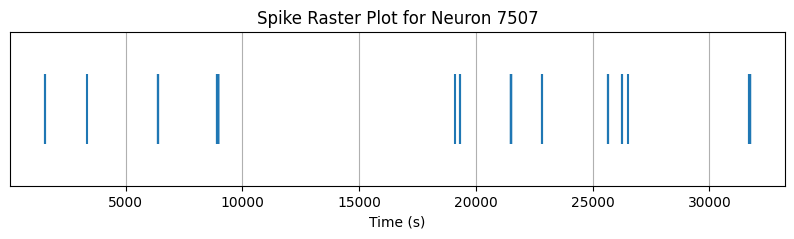

951908


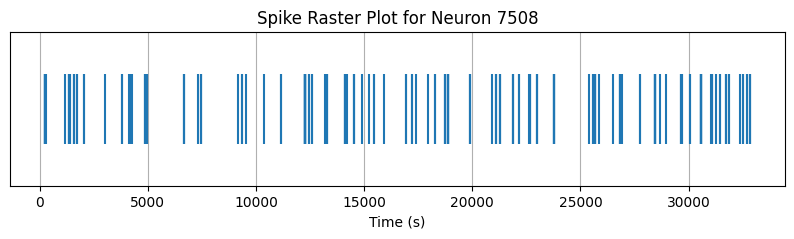

984712


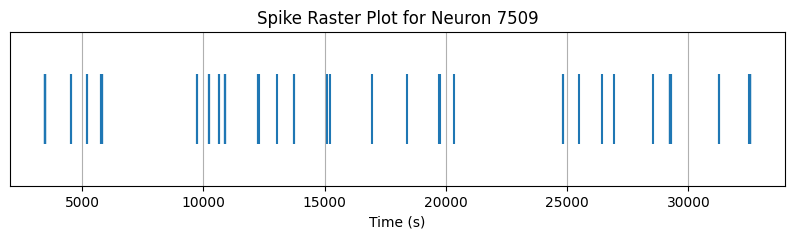

976039


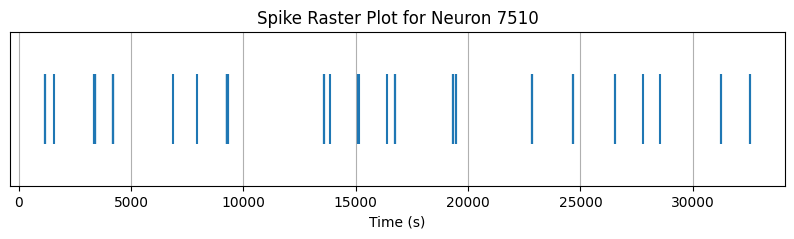

976157


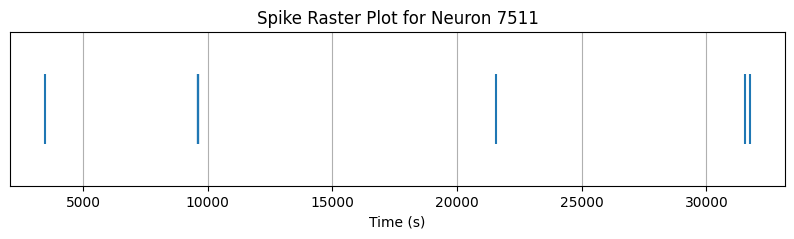

952144


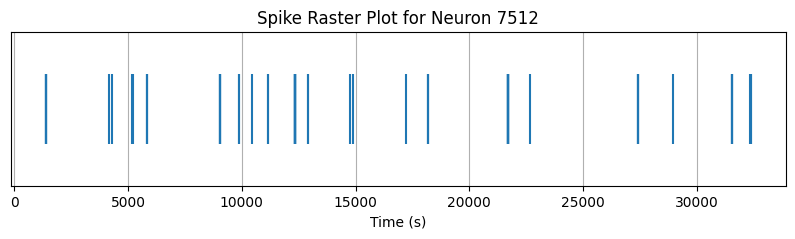

970788


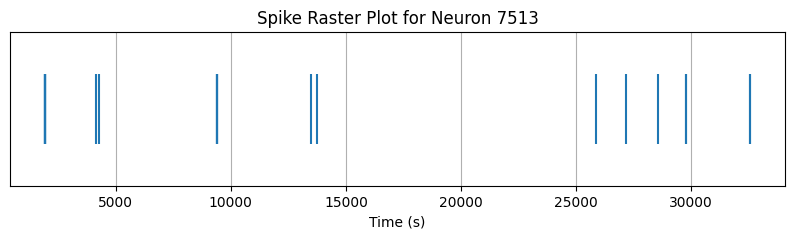

976275


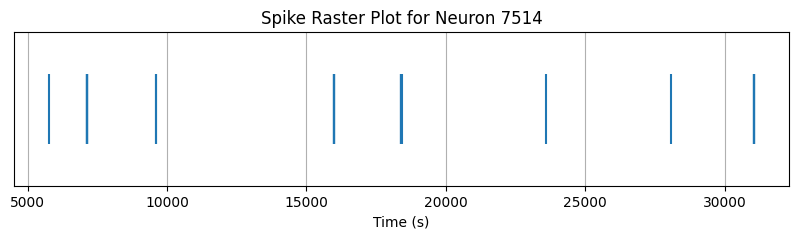

931494


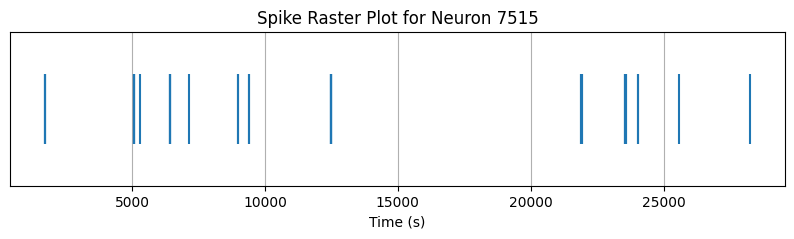

847360


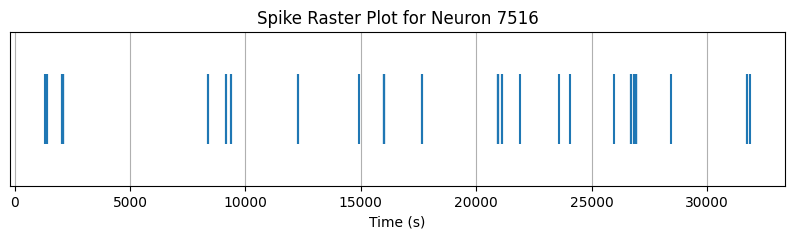

955448


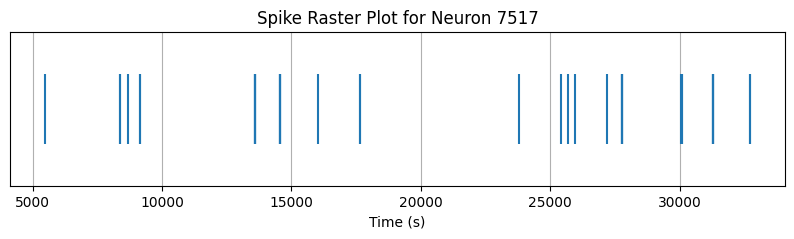

981054


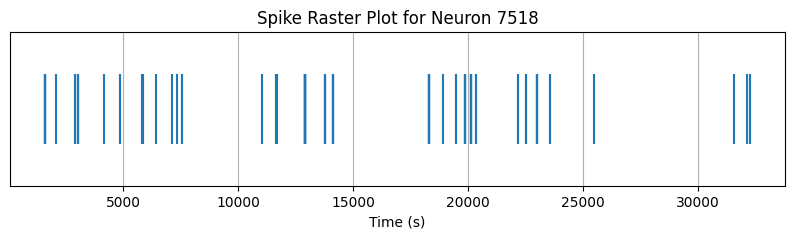

967543


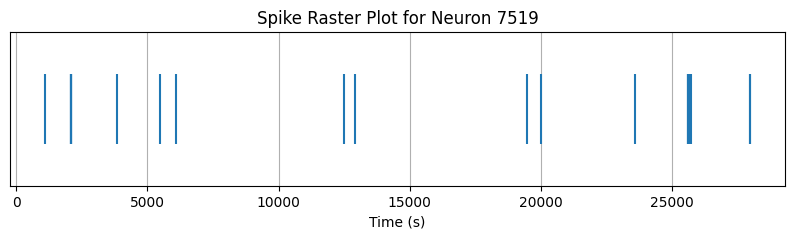

838628


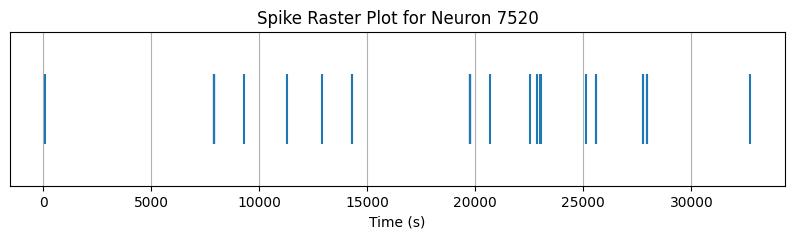

981113


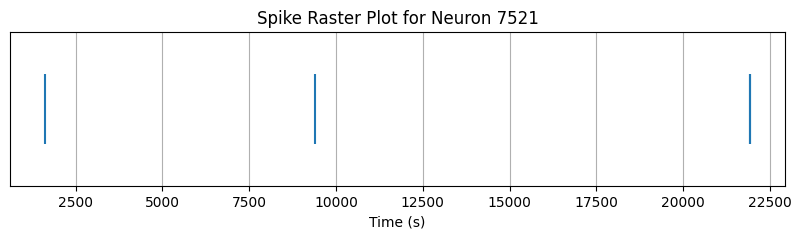

657616


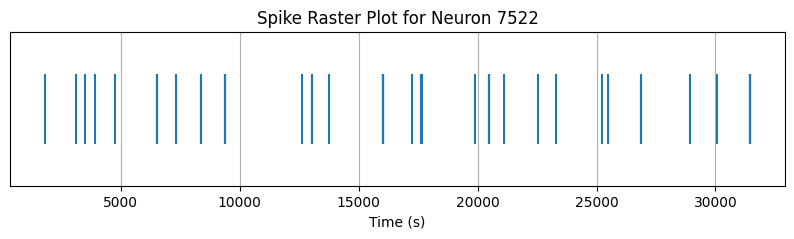

943235


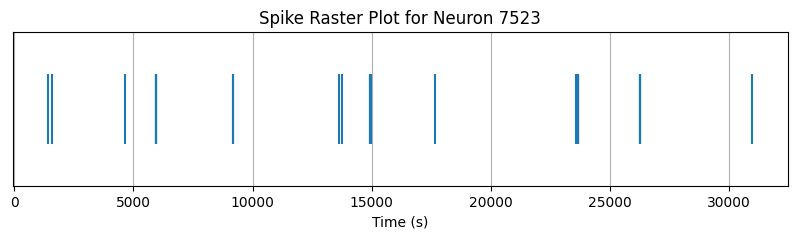

929429


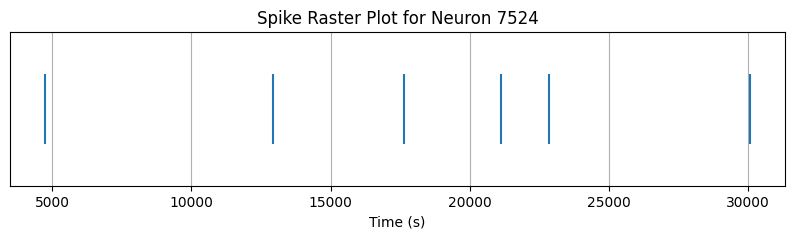

902171


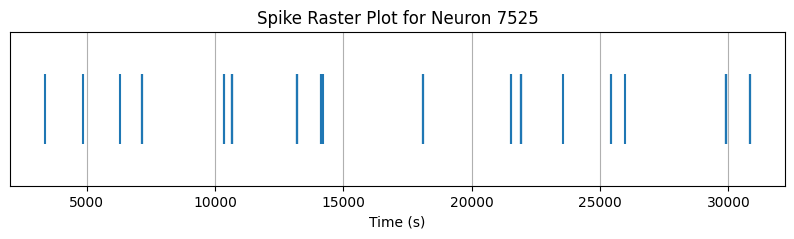

925063


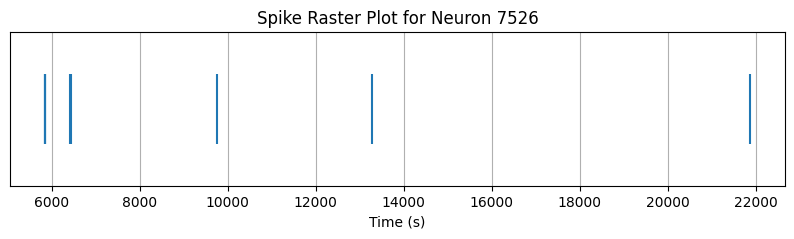

656082


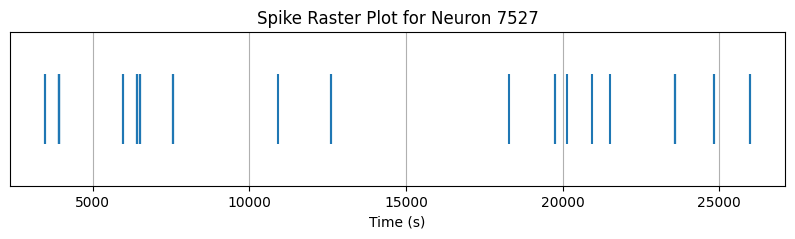

779215


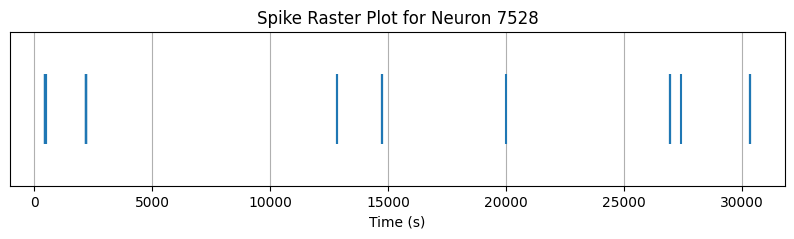

910431


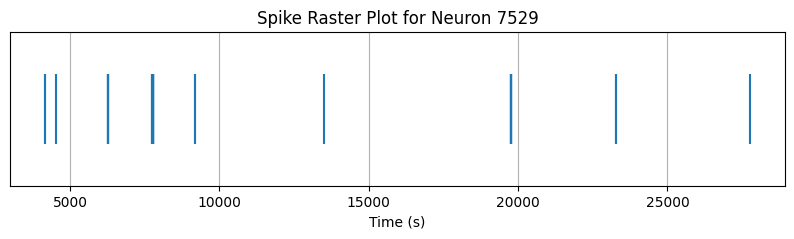

832728


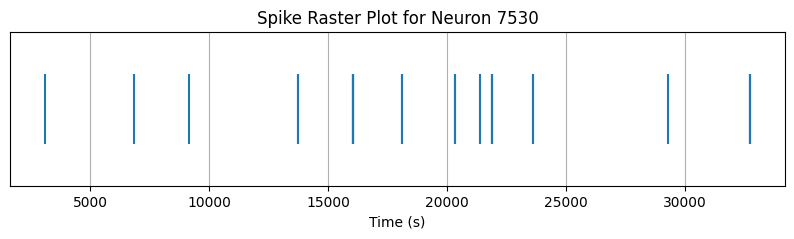

981408


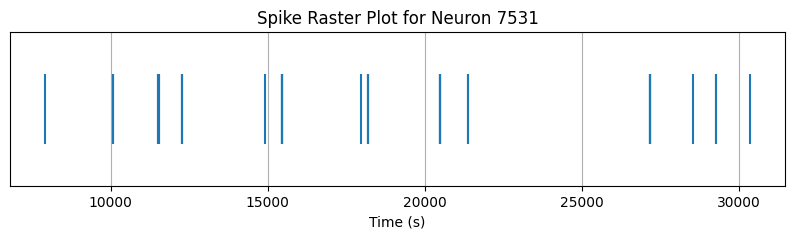

910490


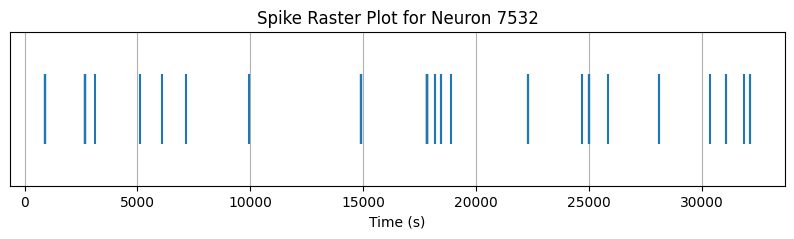

963590


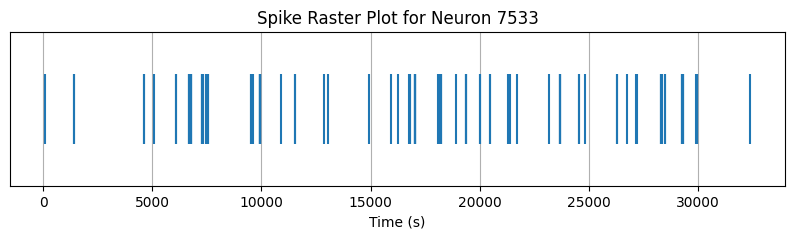

970847


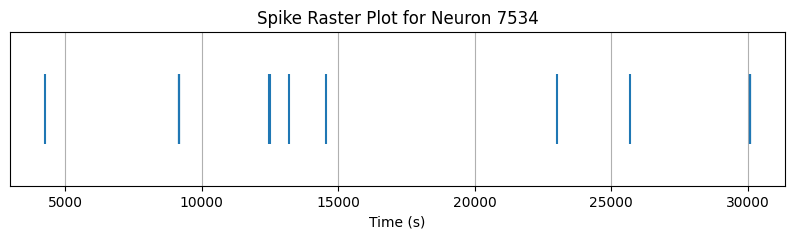

902348


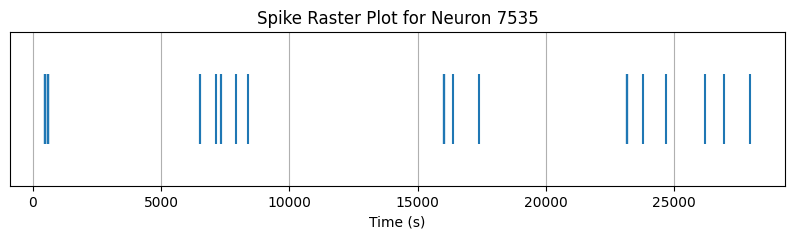

838687


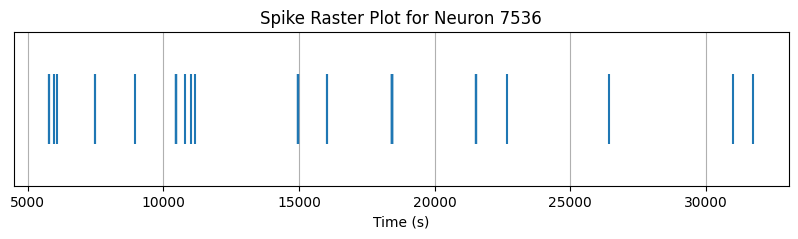

952321


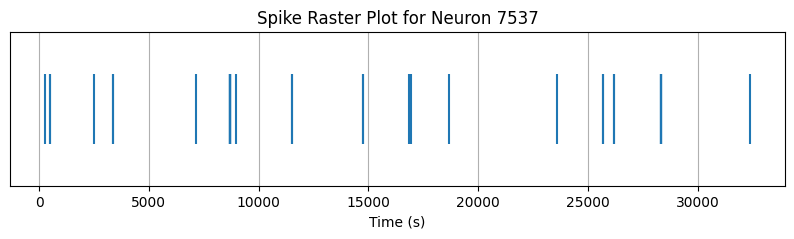

970906


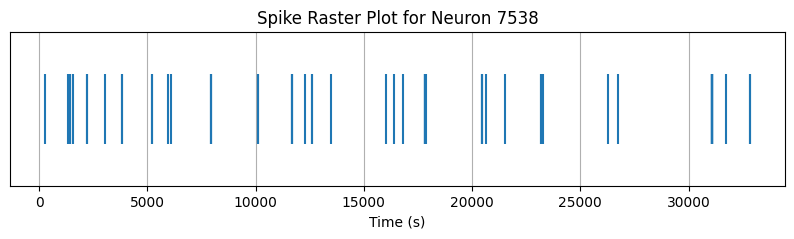

984830


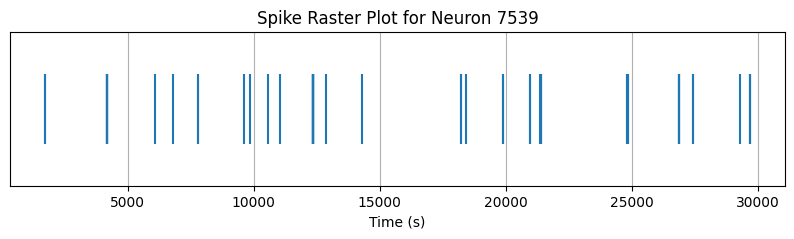

890312


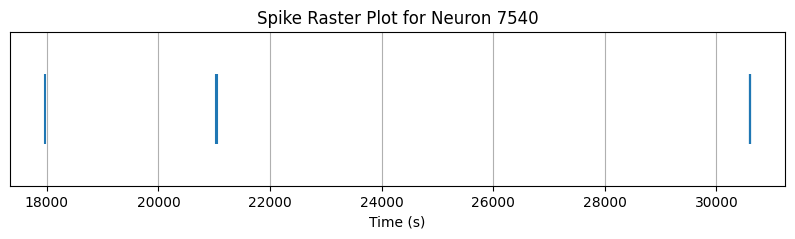

917924


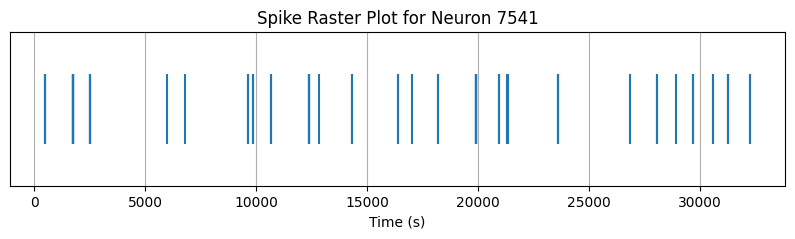

967661


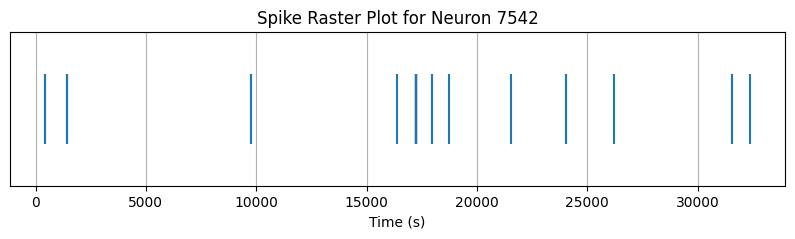

970965


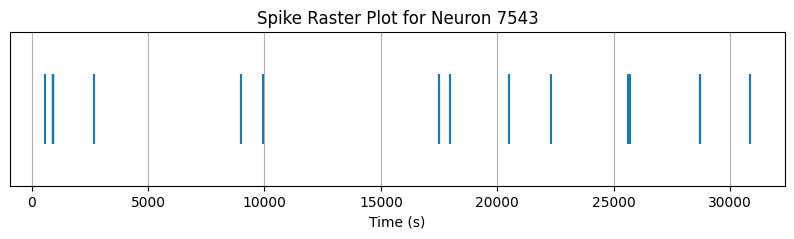

925181


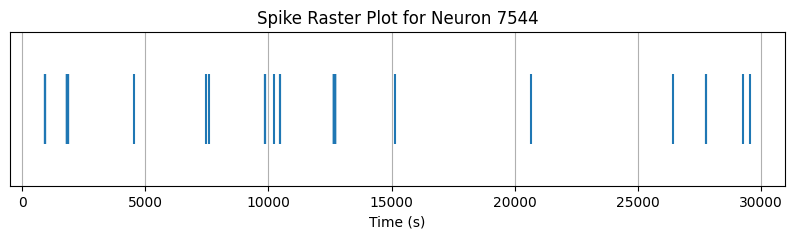

886359


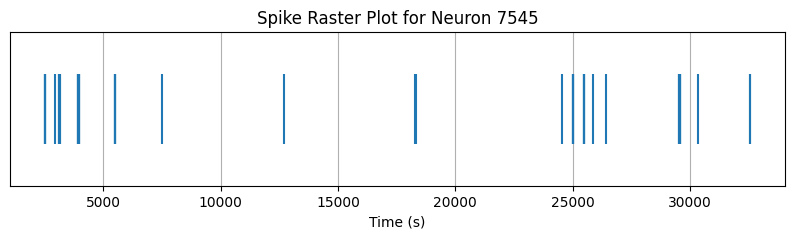

976393


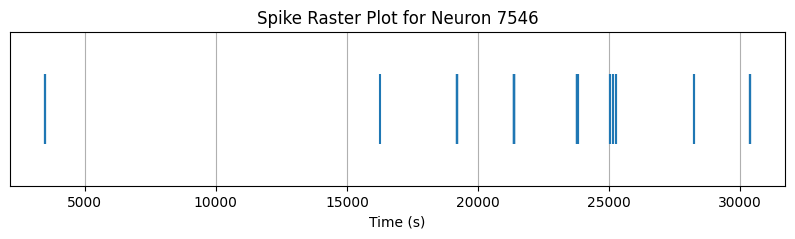

910844


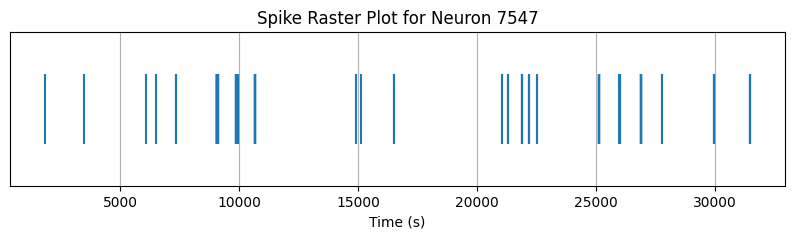

943471


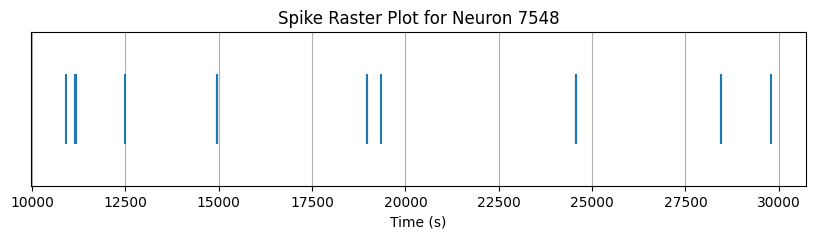

893439


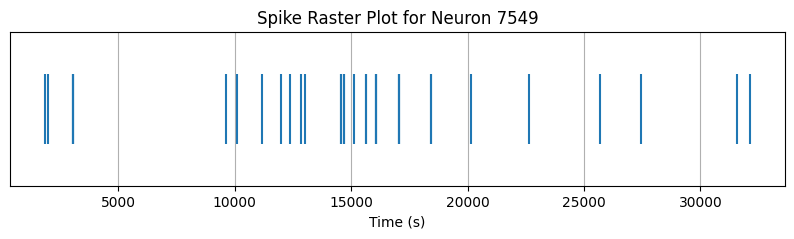

963649


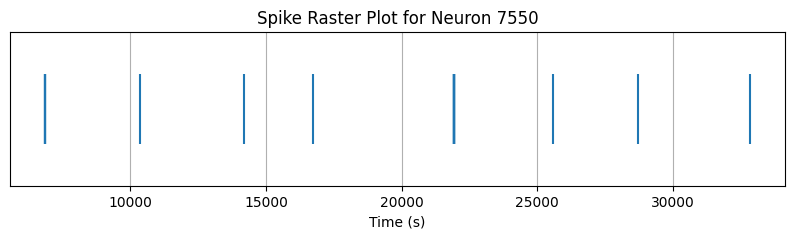

984889


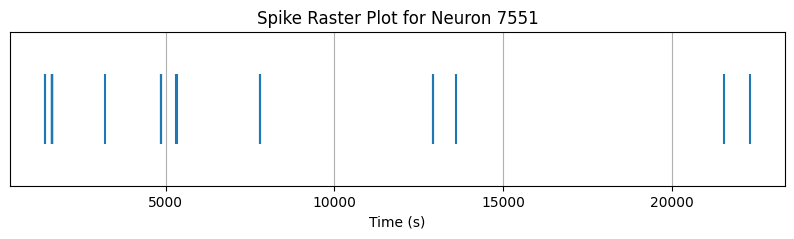

669534


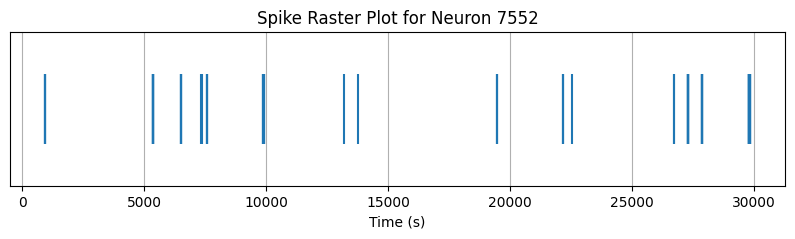

894501


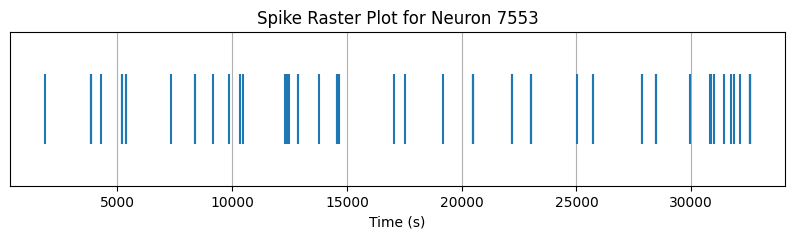

976629


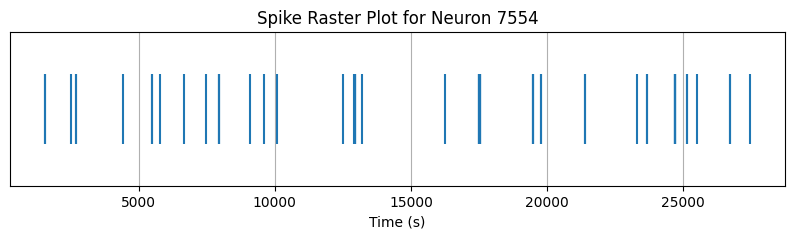

823229


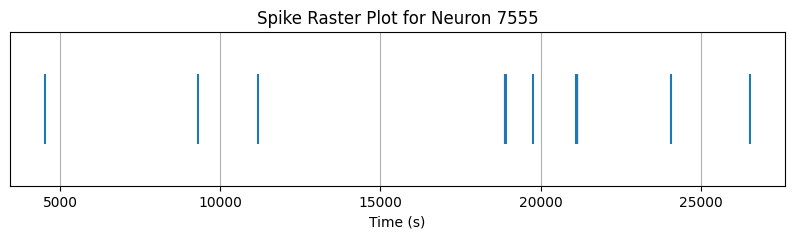

795853


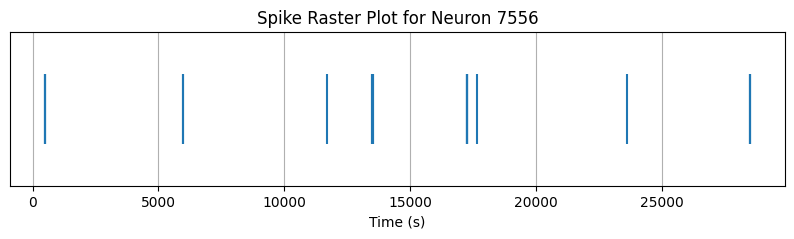

854263


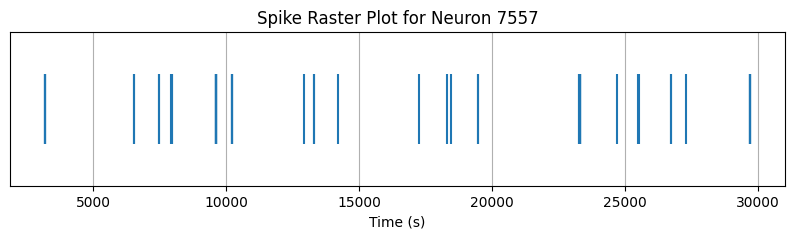

890725


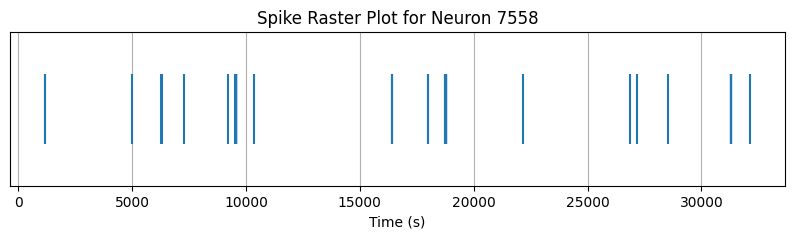

963767


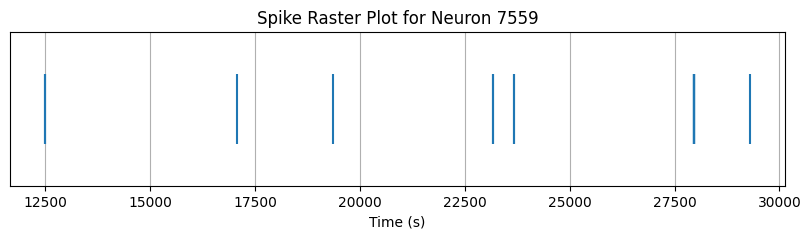

878748


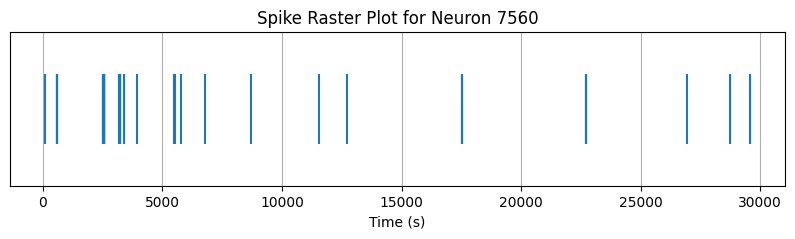

886890


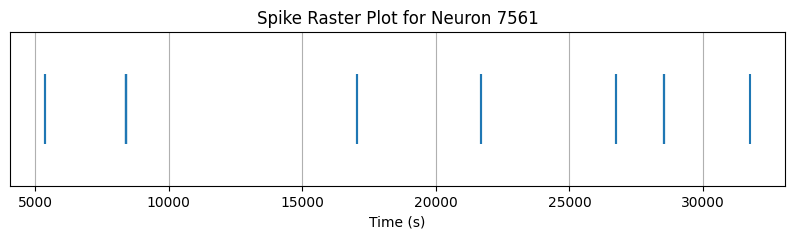

952498


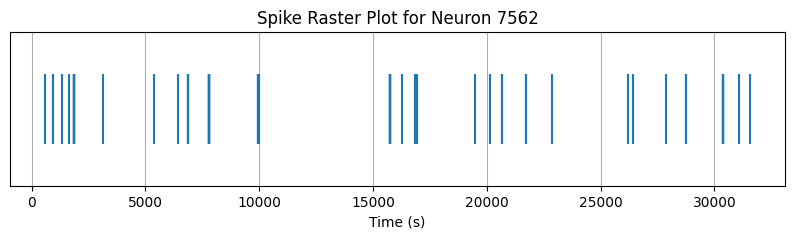

946657


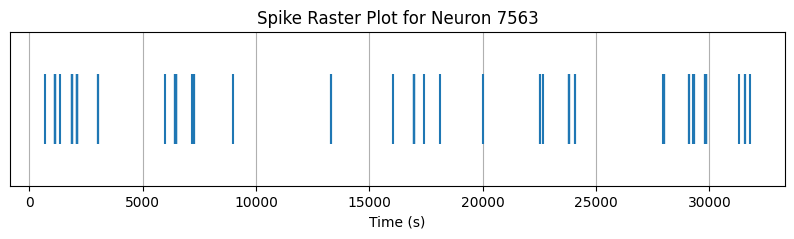

953324


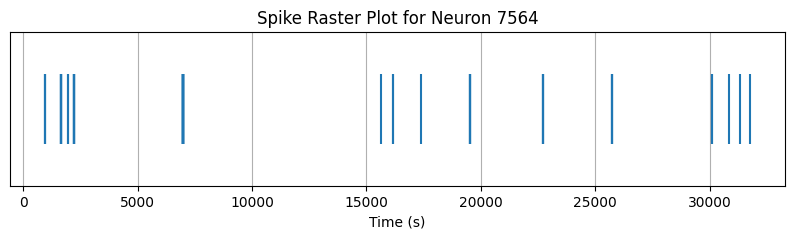

952557


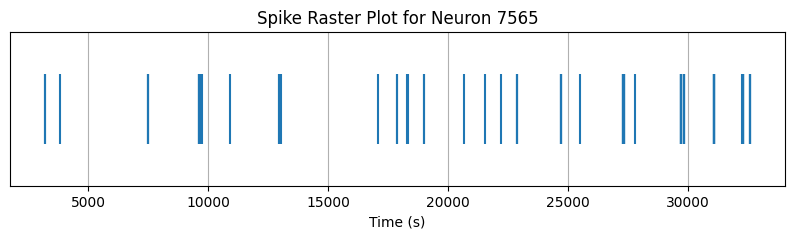

976865


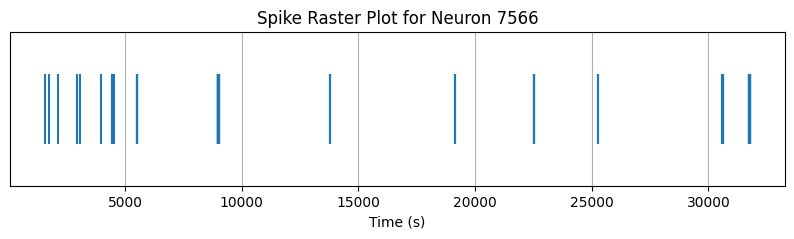

953265


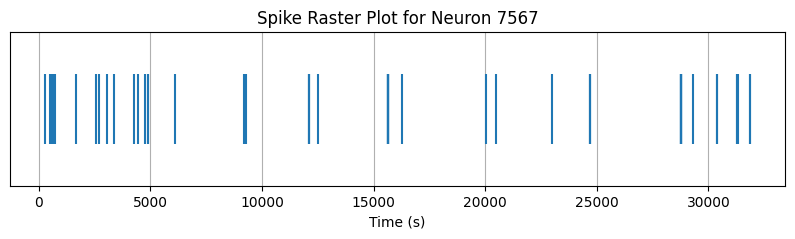

955684


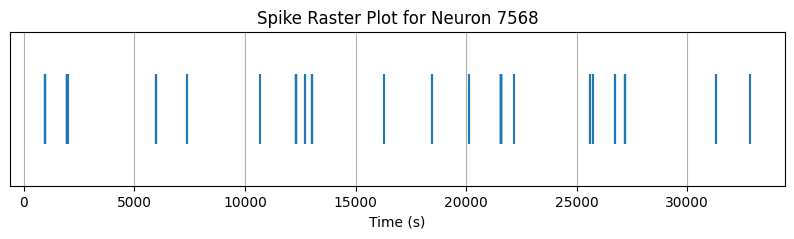

984948


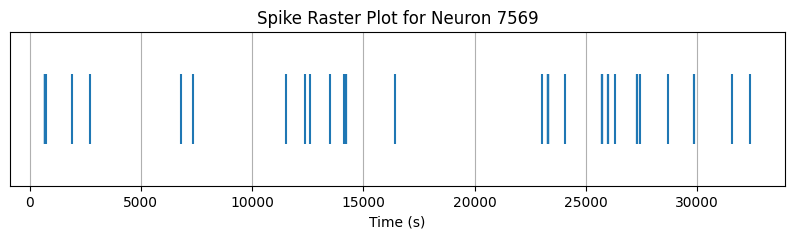

971024


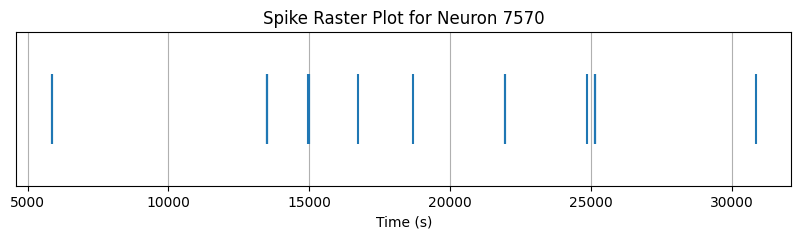

925417


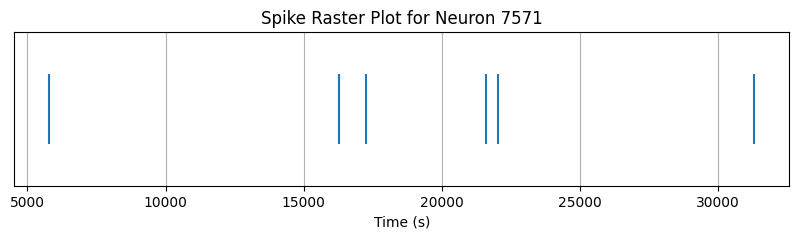

939105


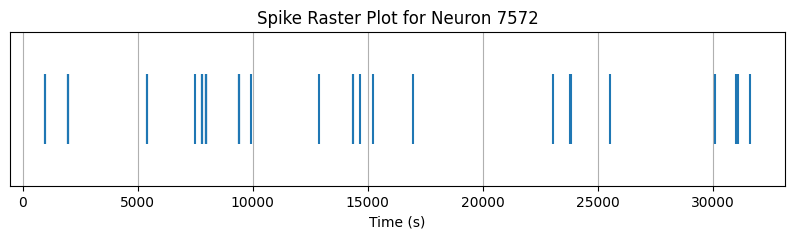

948014


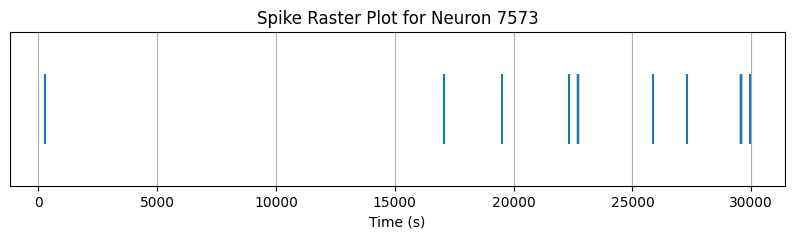

898100


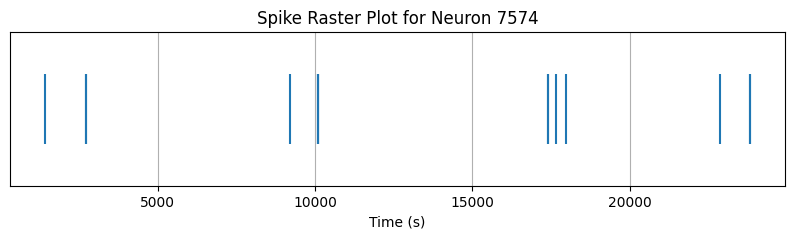

714433


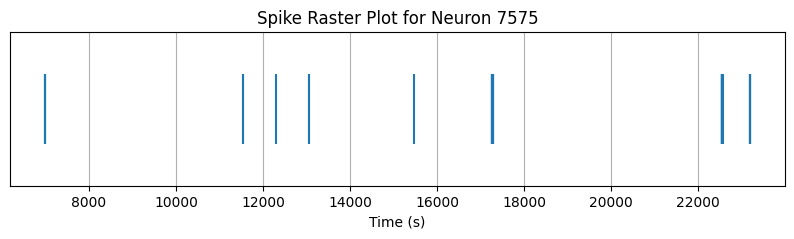

695553


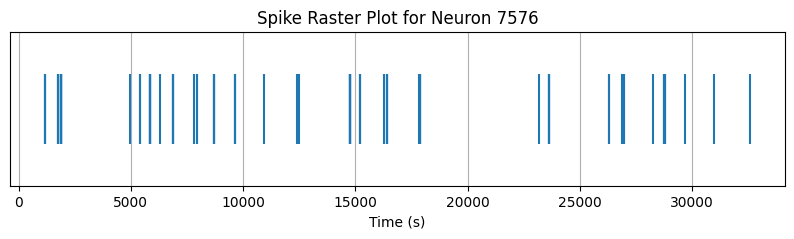

977101


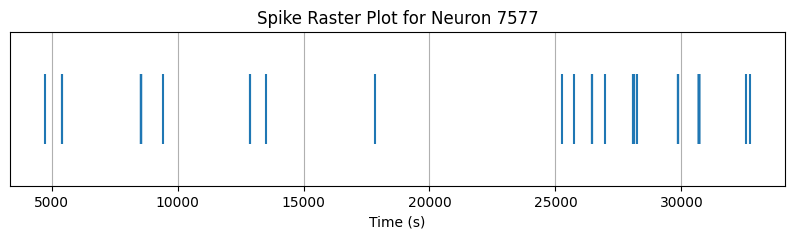

981467


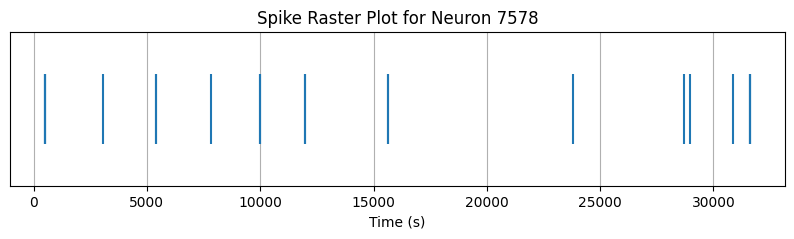

948191


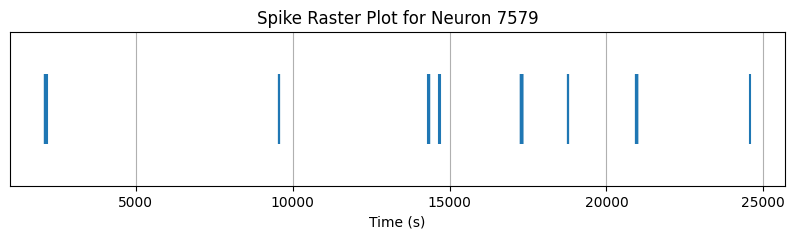

737089


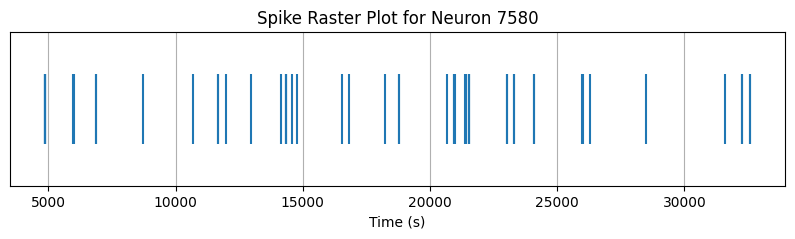

976983


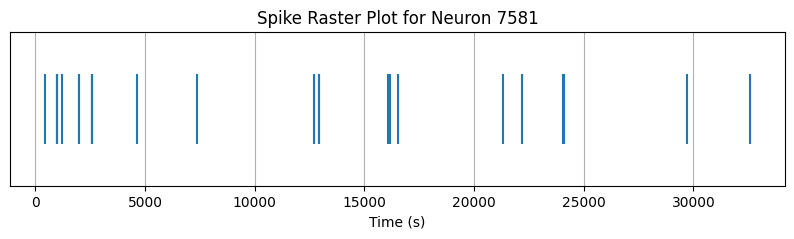

977042


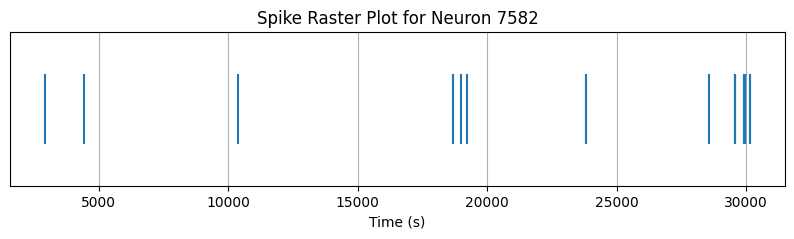

904354


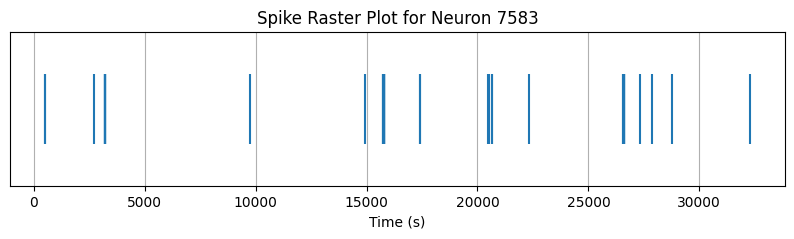

968251


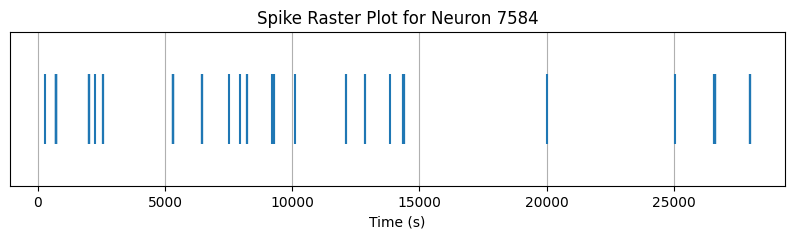

839572


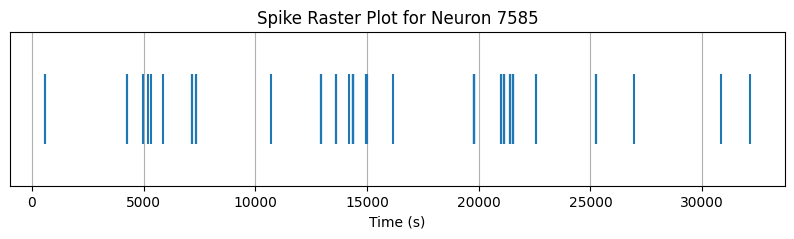

963826


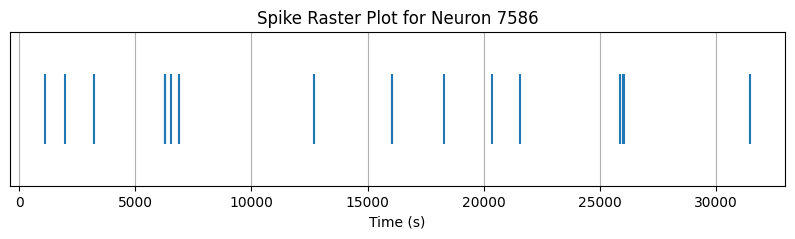

943589


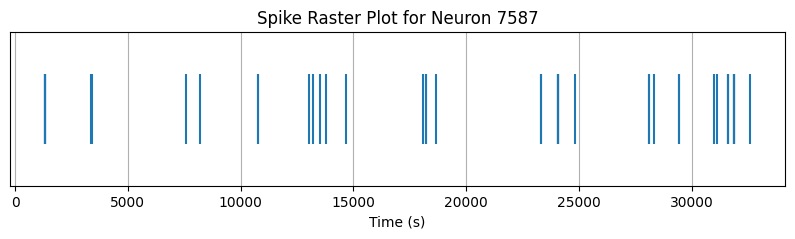

977219


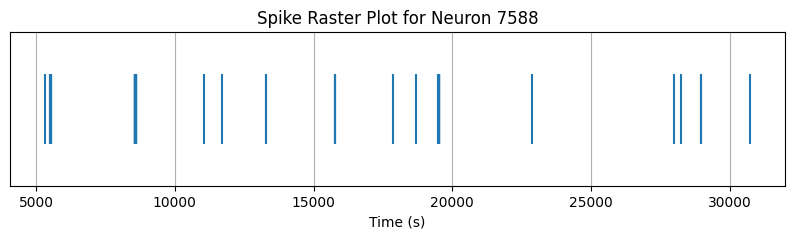

921582


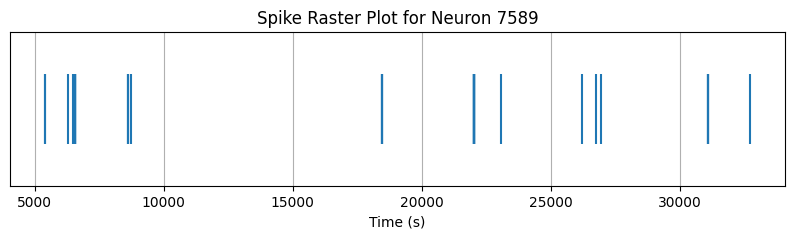

981526


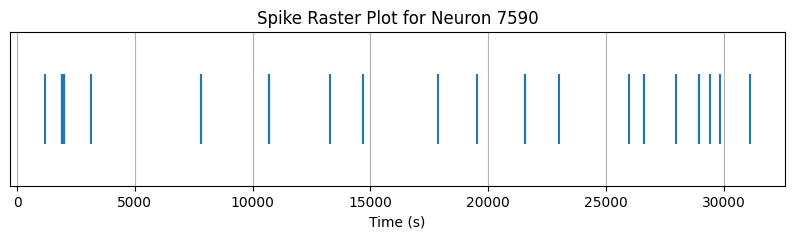

933264


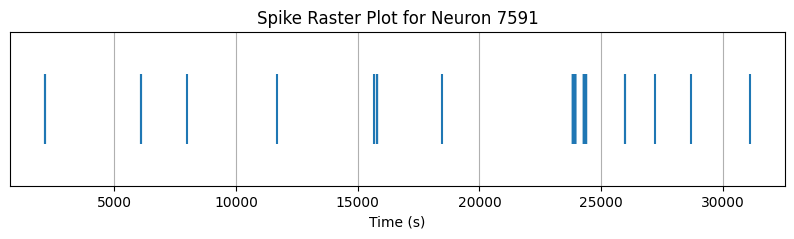

933323


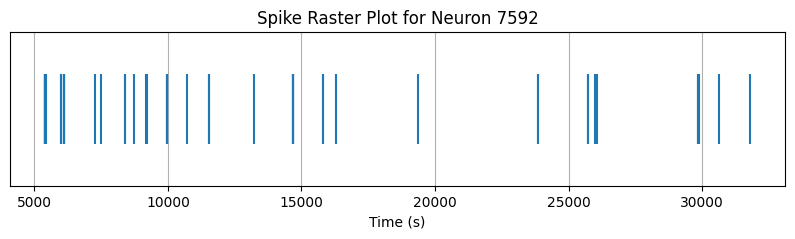

953383


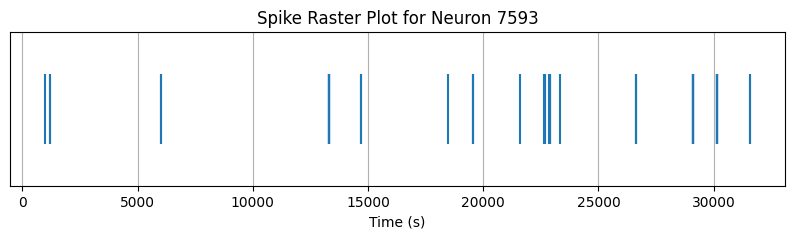

947070


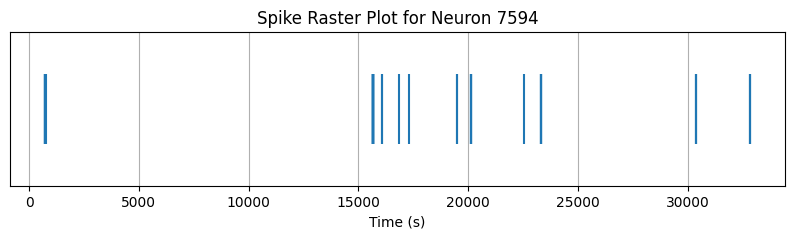

985125


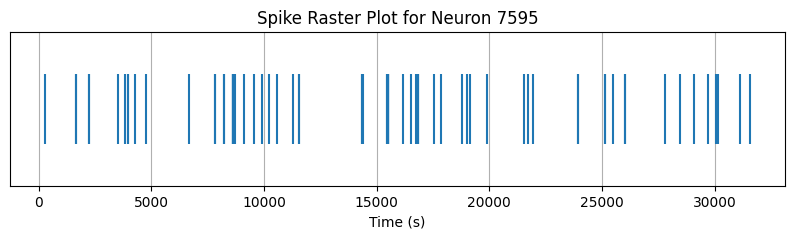

946952


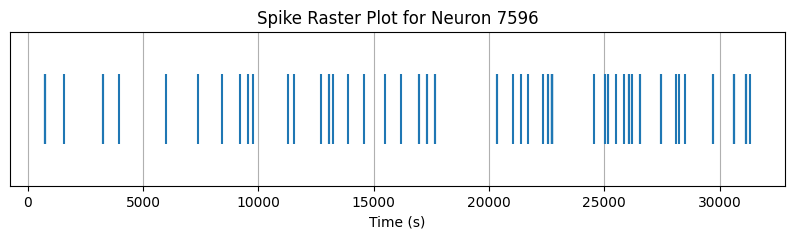

939282


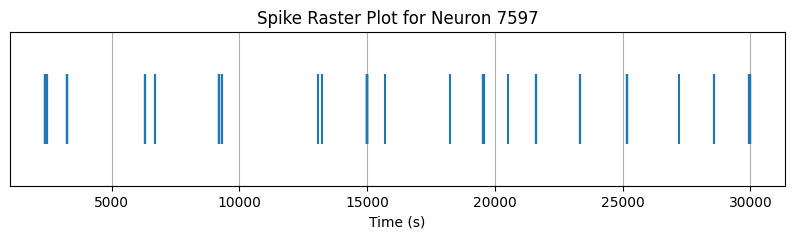

899162


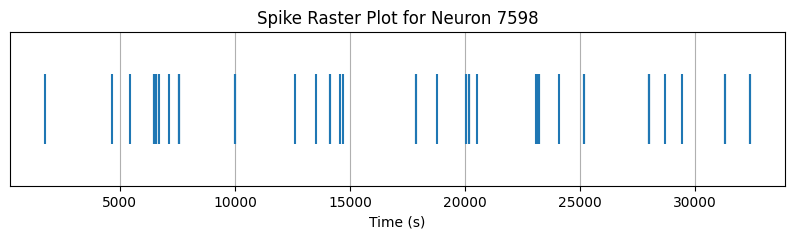

971142


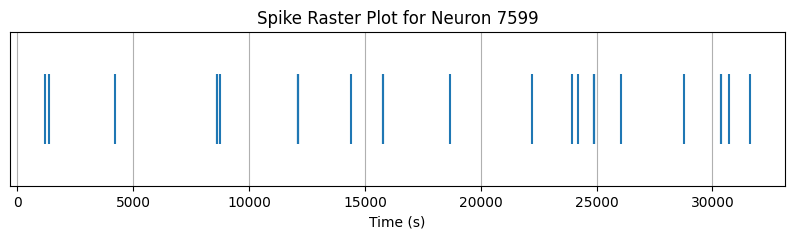

948427


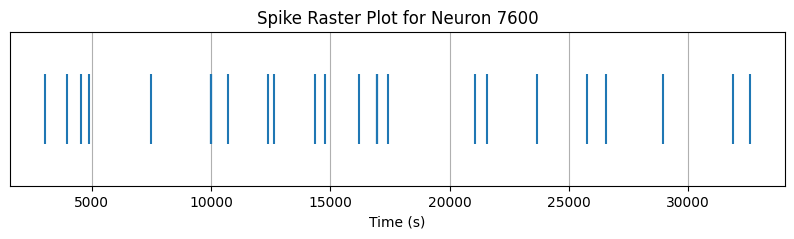

977278


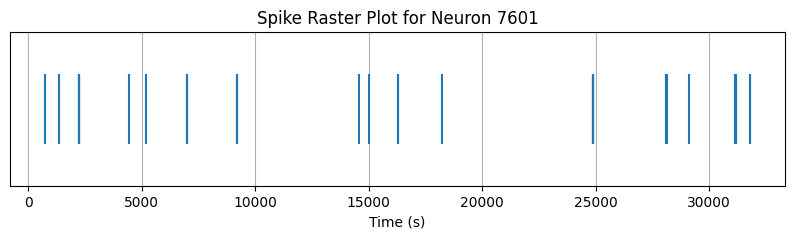

953501


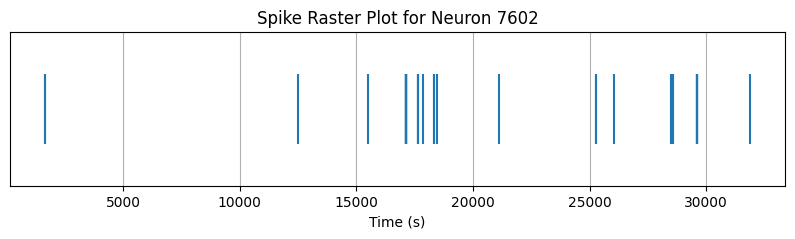

956038


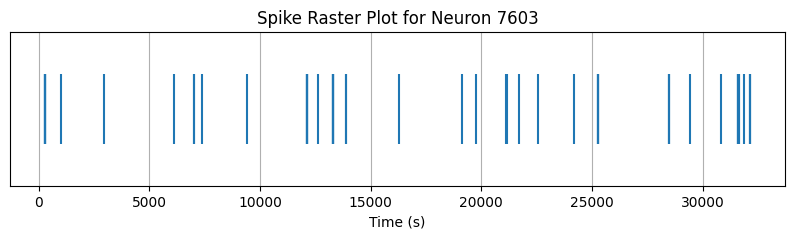

964003


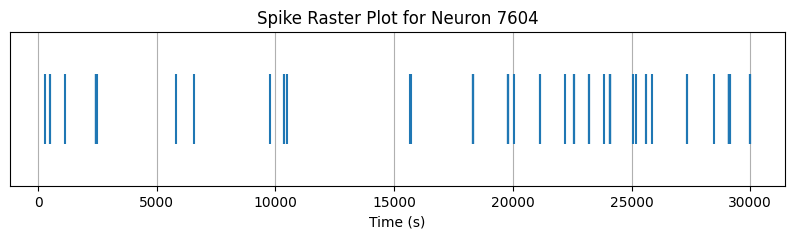

899339


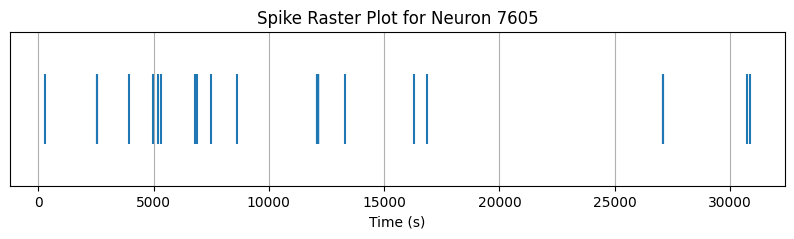

925653


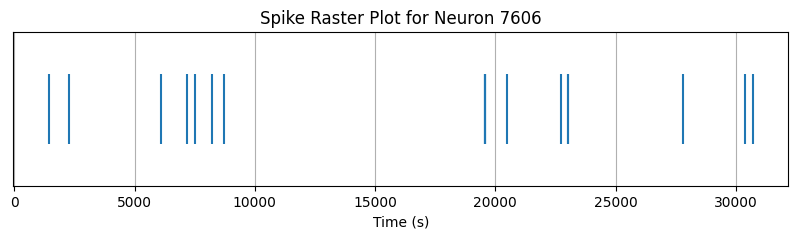

921759


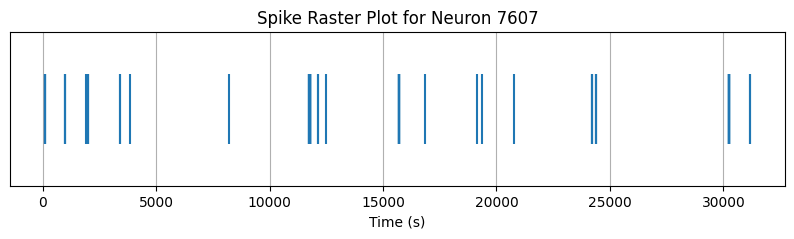

934857


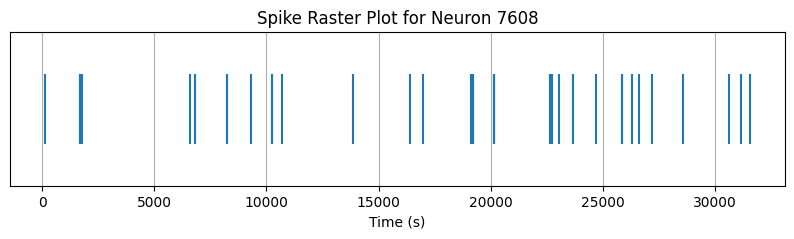

947129


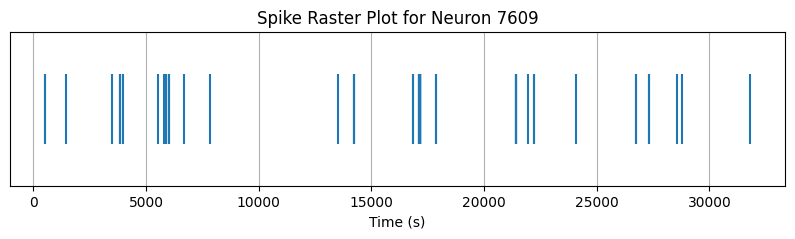

953796


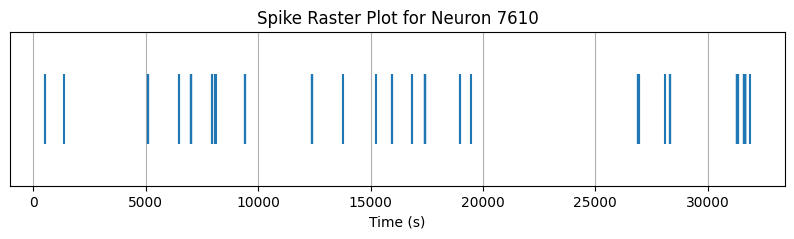

956156


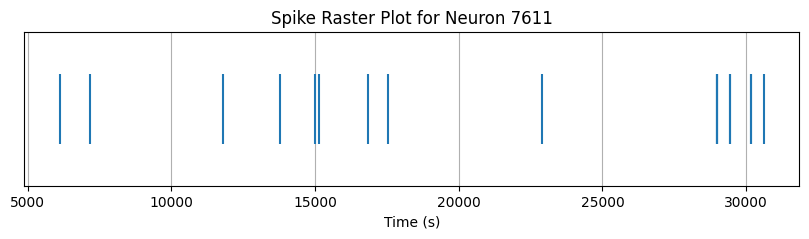

918750


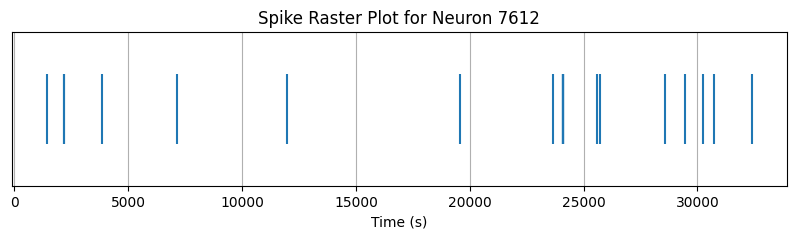

971201


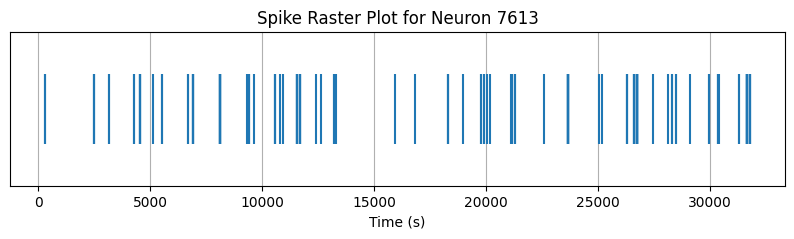

953855


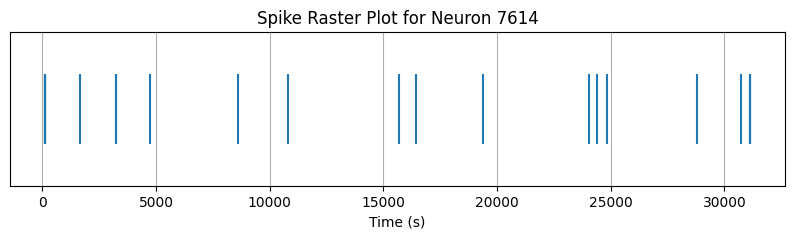

933500


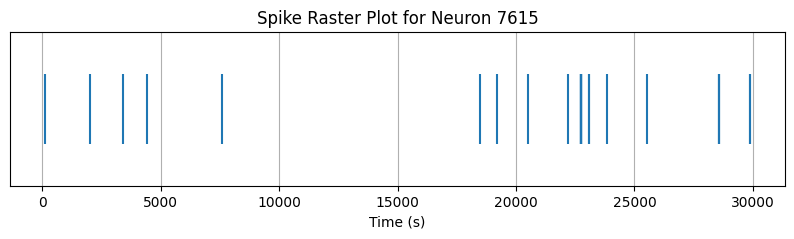

896035


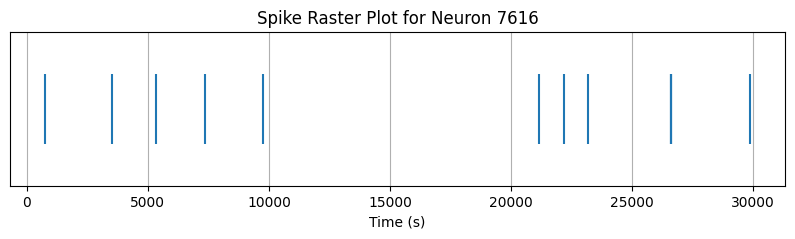

896094


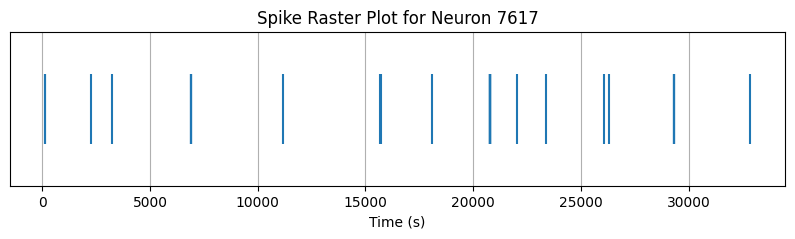

985184


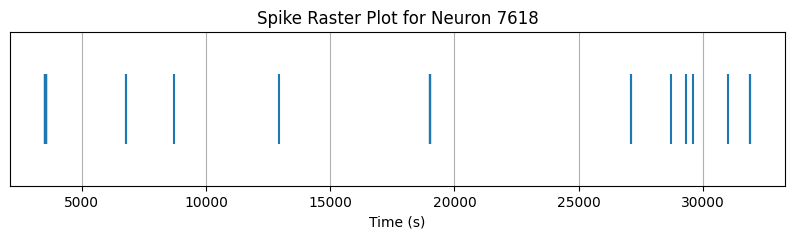

956333


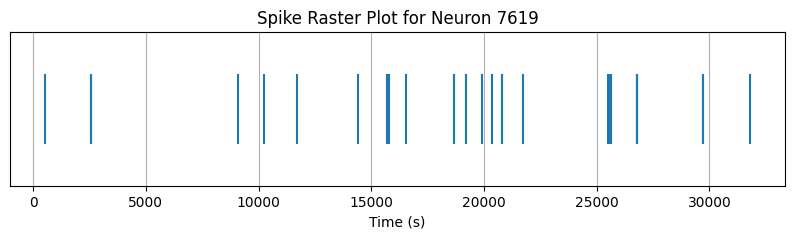

953678


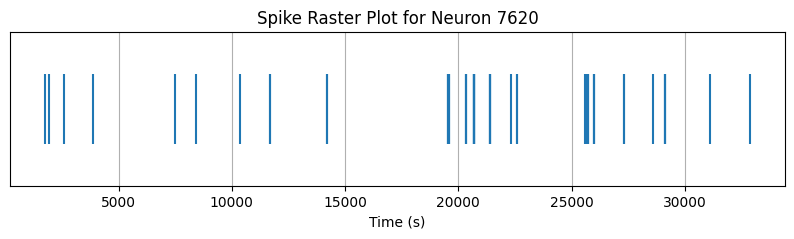

986069


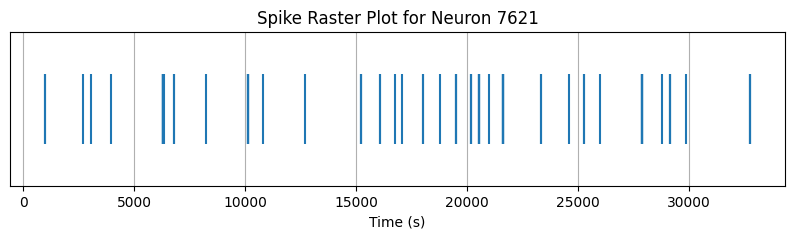

981703


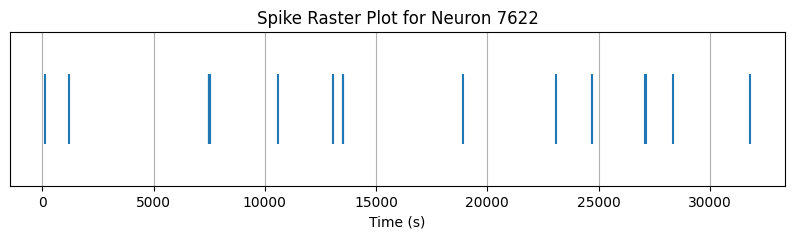

953914


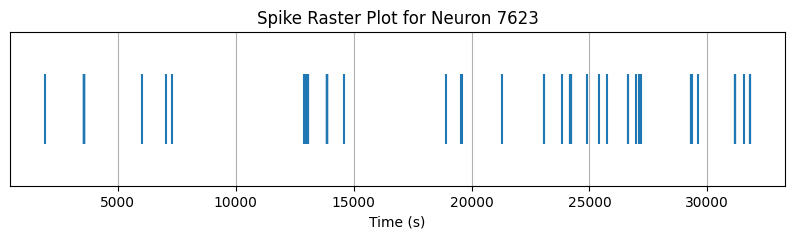

954091


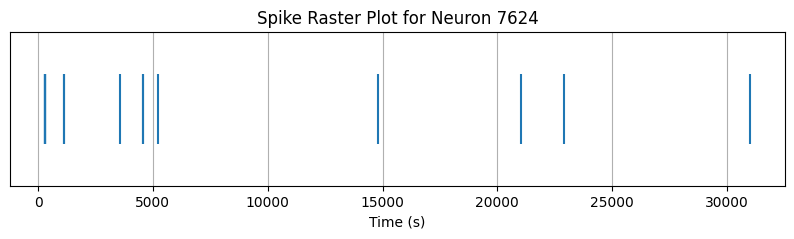

929842


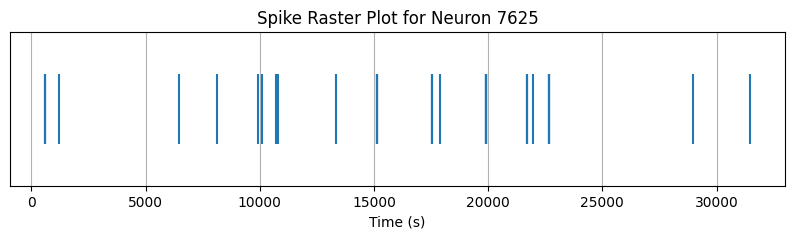

943648


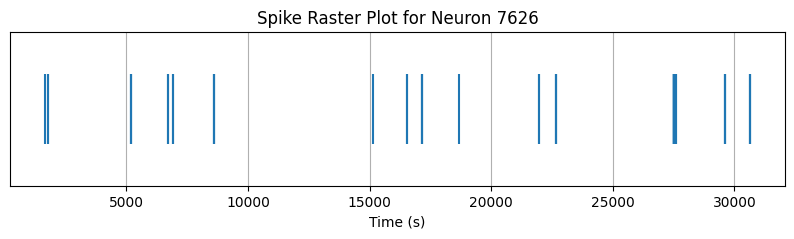

918927


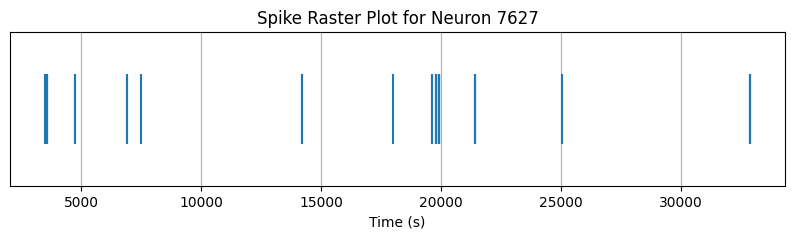

986246


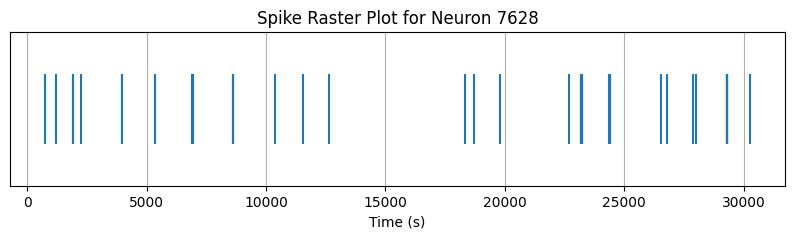

907599


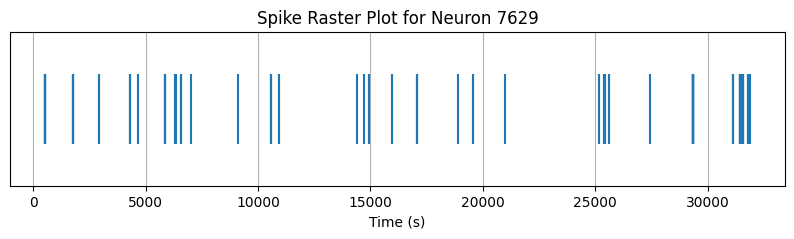

956392


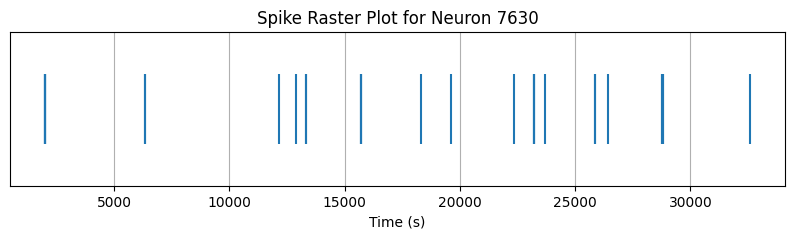

977337


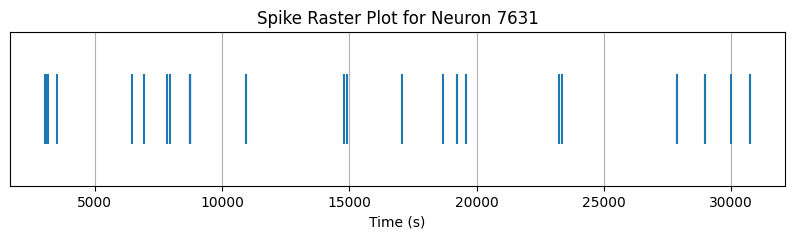

921995


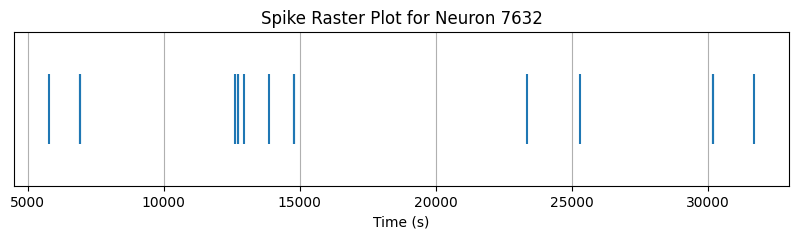

950492


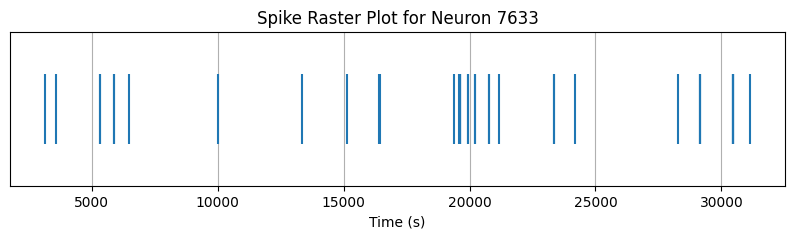

933795


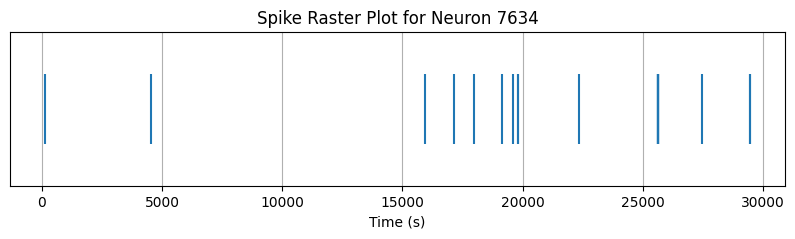

883468


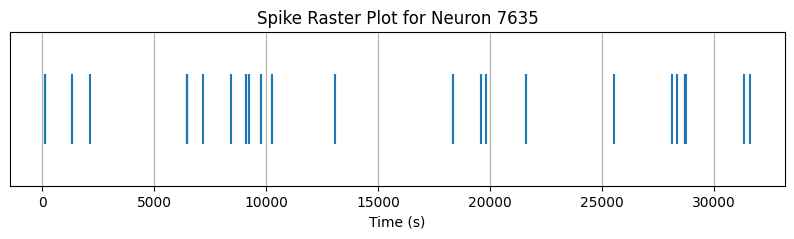

947483


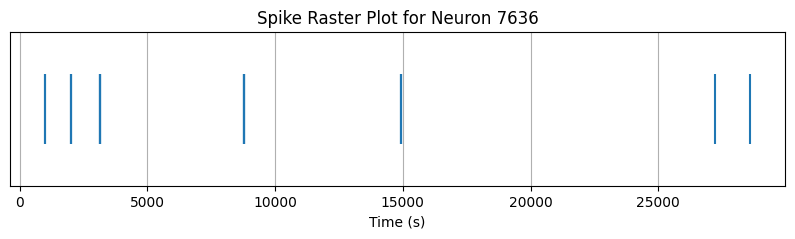

857508


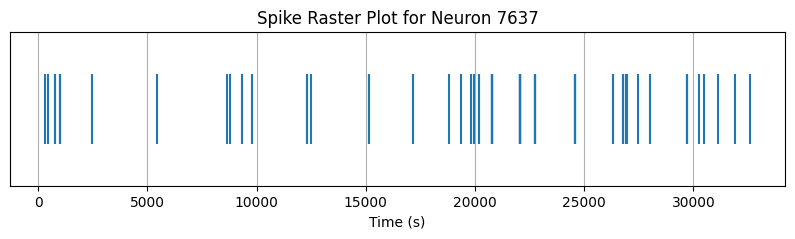

977396


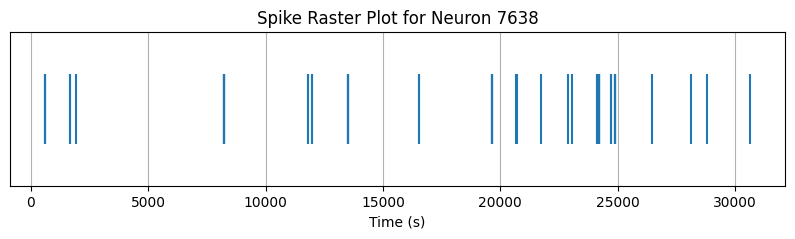

918986


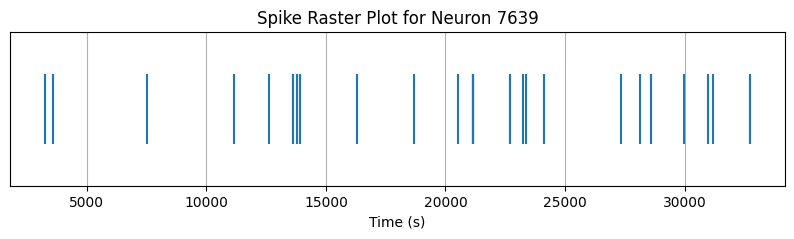

981821


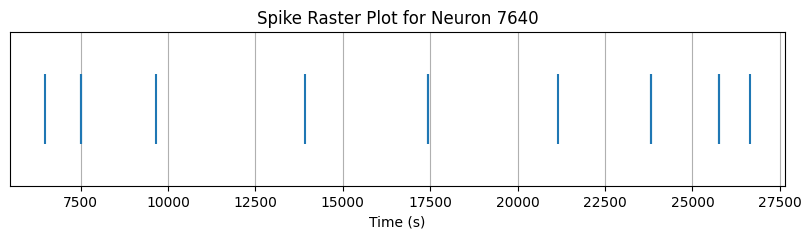

799216


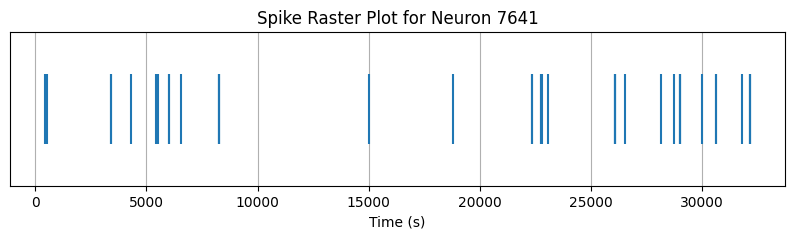

964180


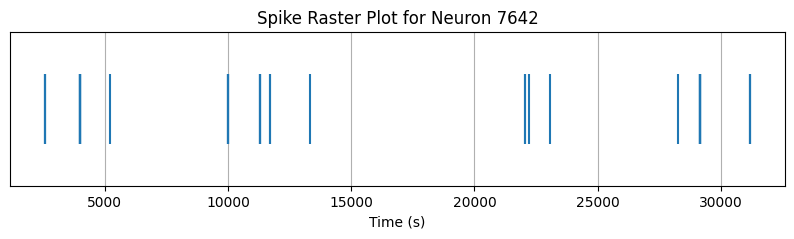

935388


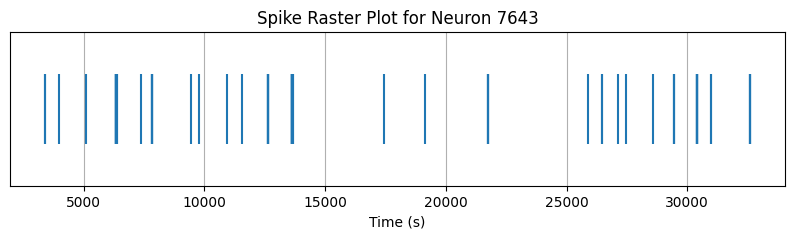

977632


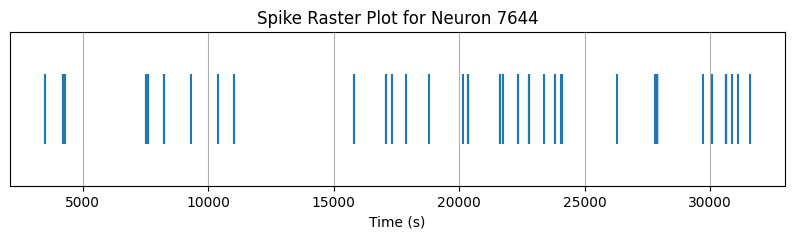

947542


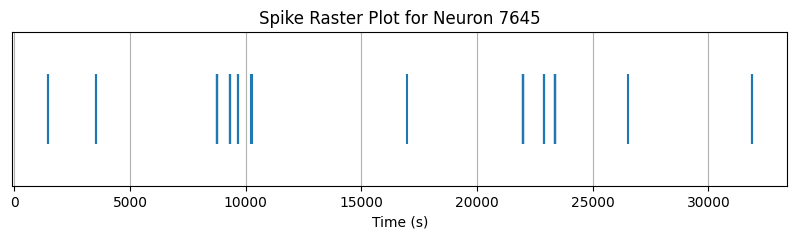

956569


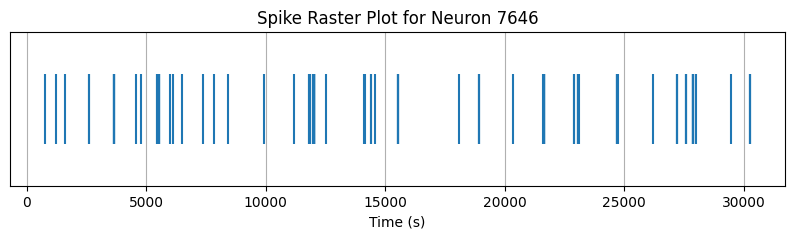

907835


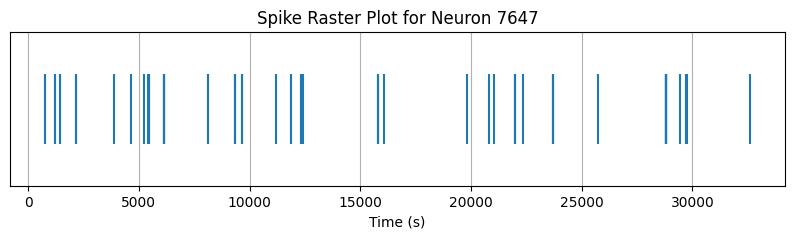

977691


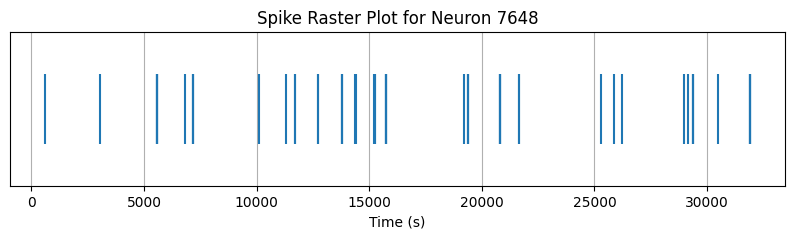

956805


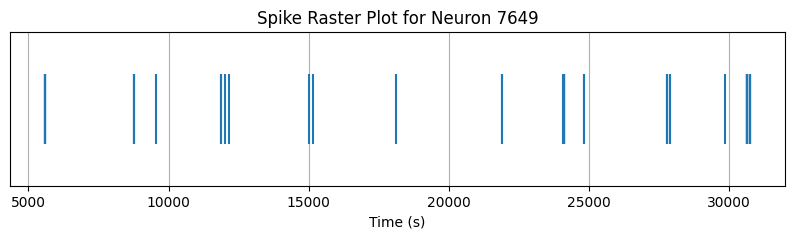

922231


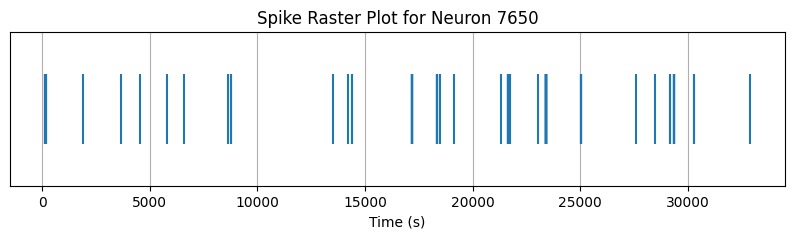

986305


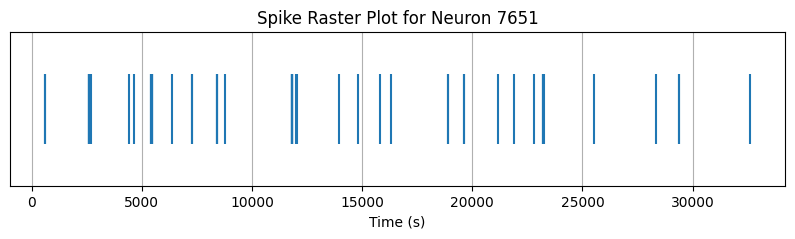

977750


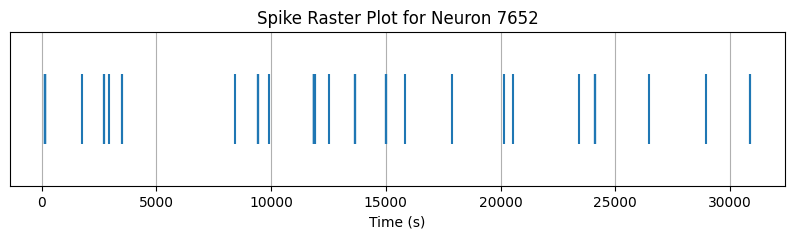

925830


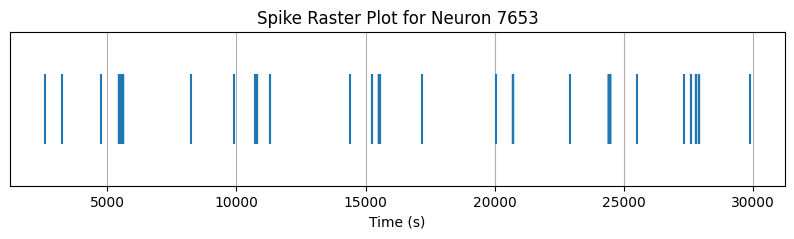

896271


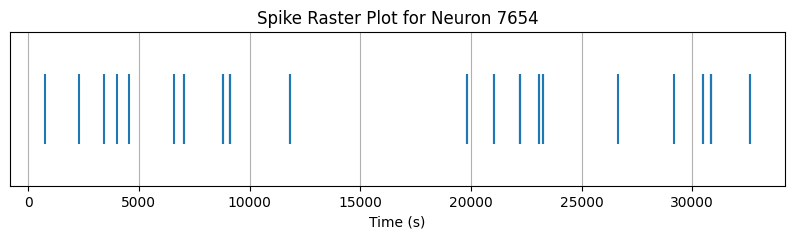

977868


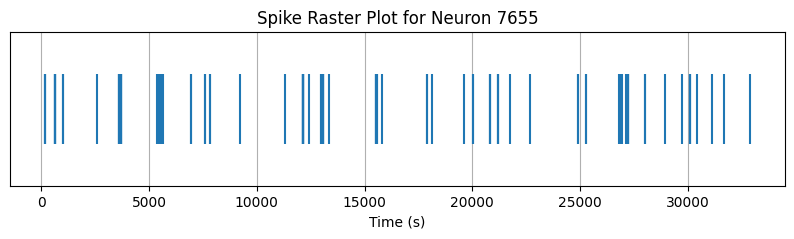

986364


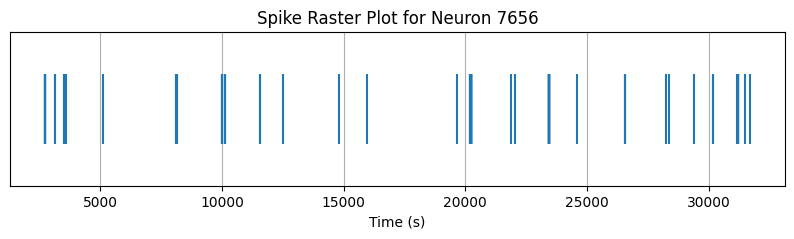

950610


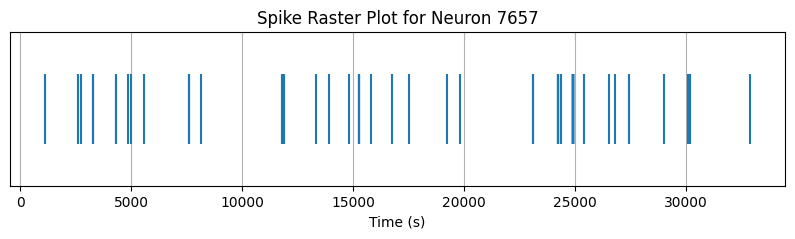

986423


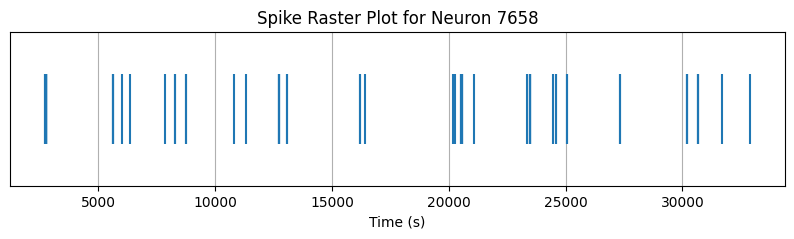

986482


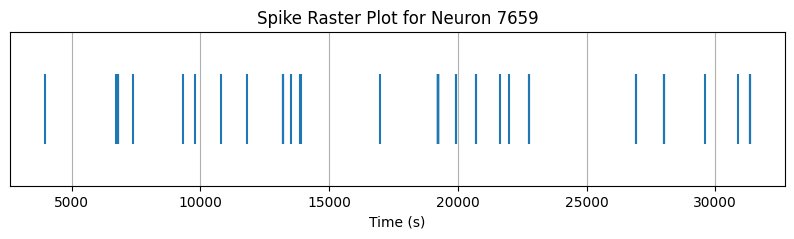

940285


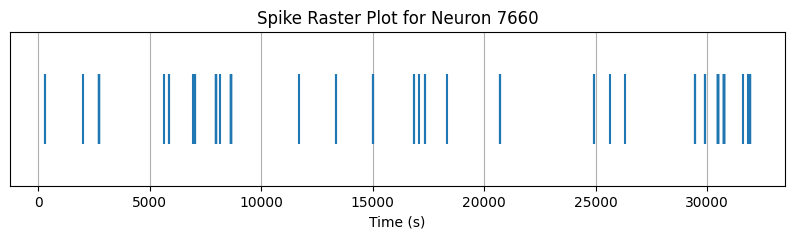

957159


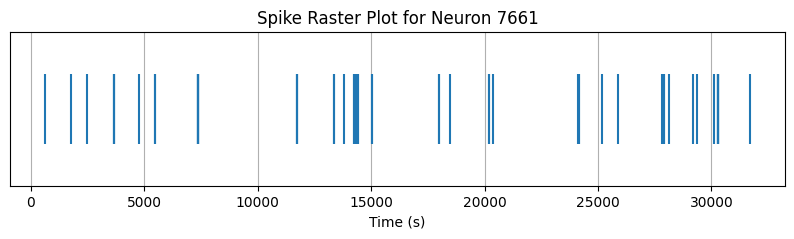

950669


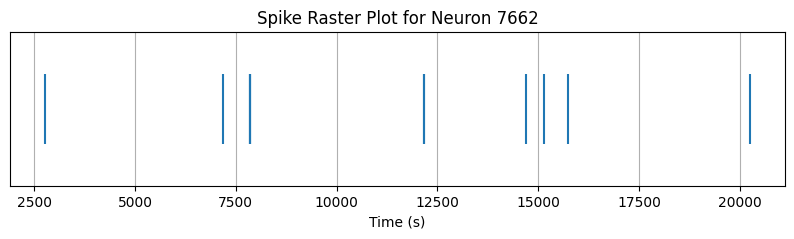

607525


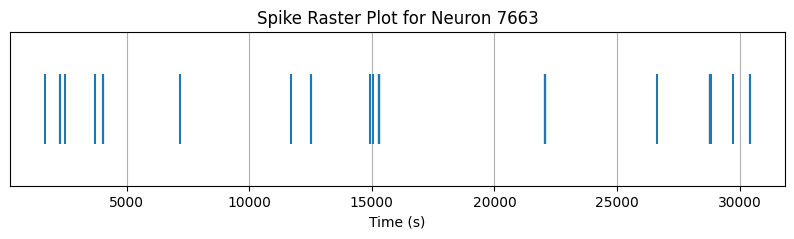

912555


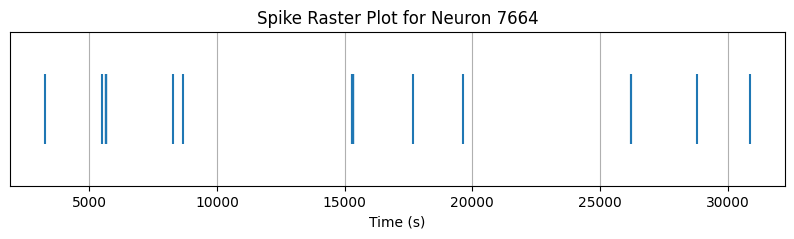

926125


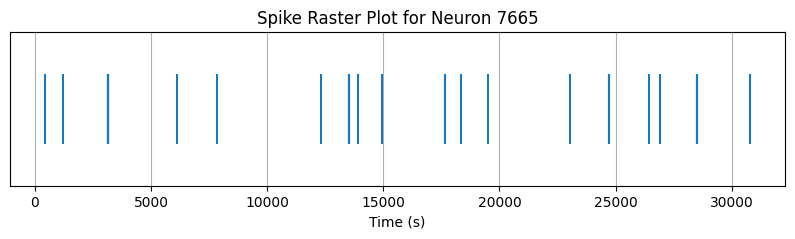

923175


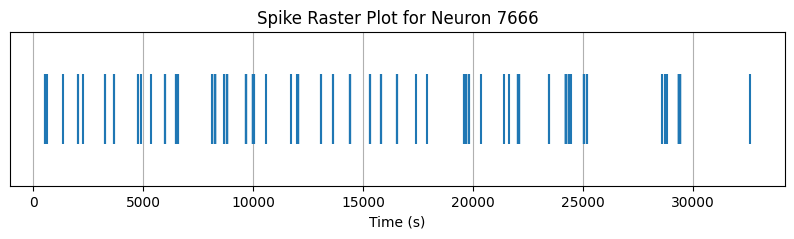

977927


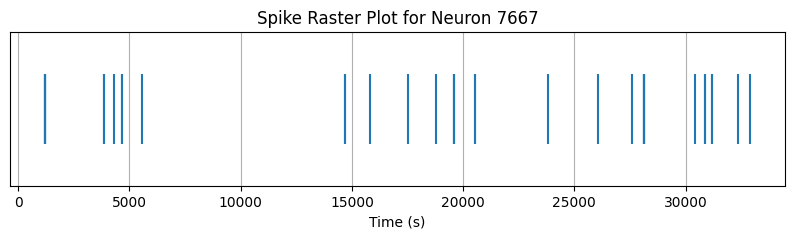

986541


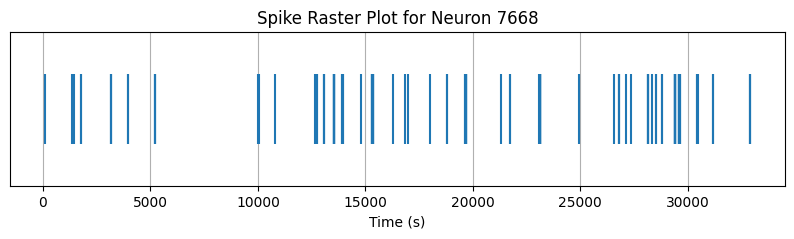

986718


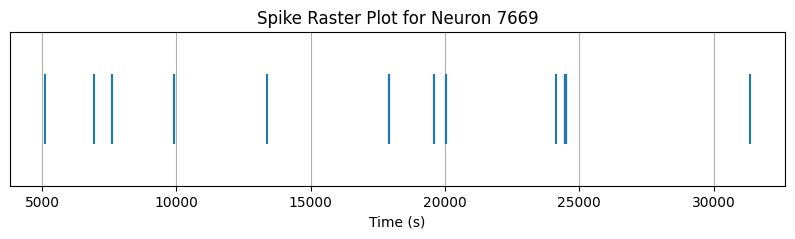

940344


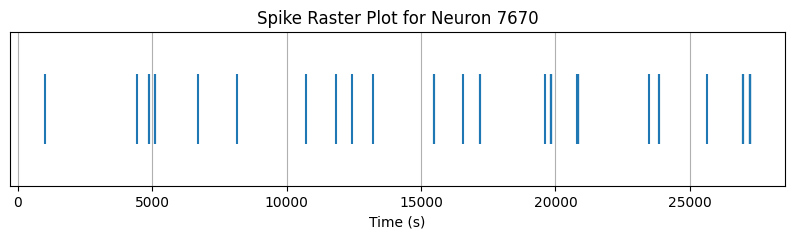

816857


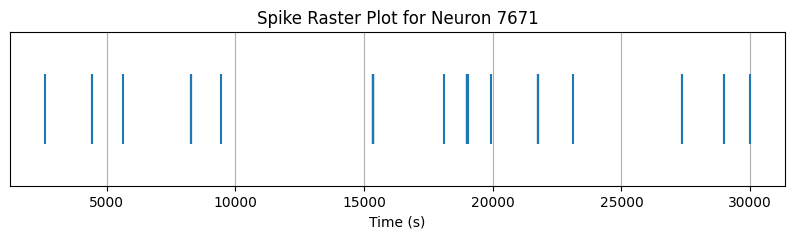

899693


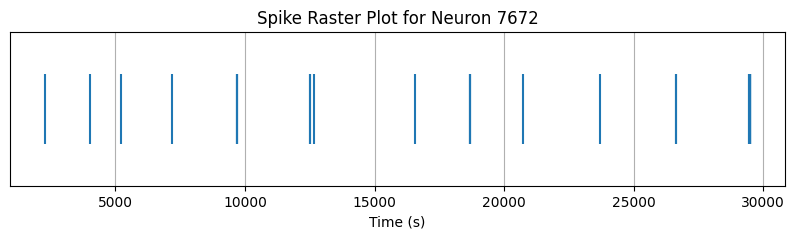

884412


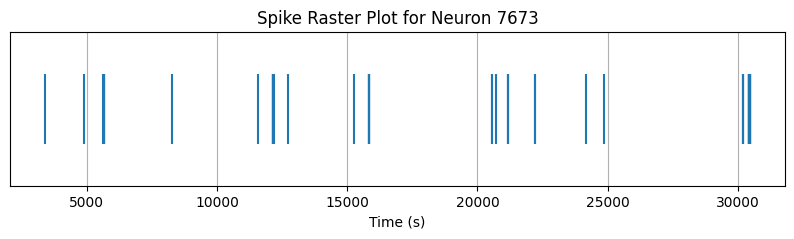

913558


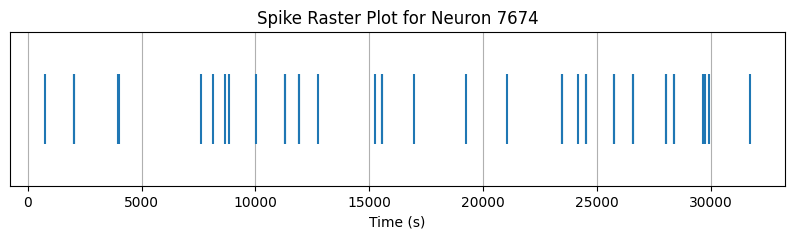

950787


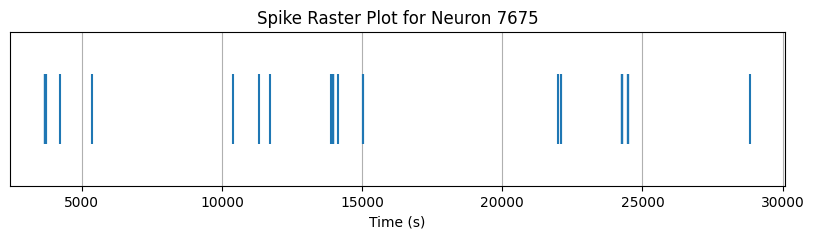

864824


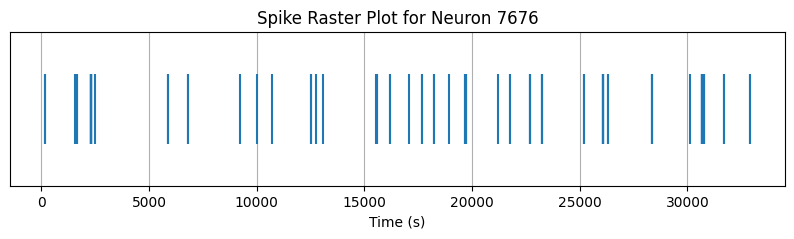

986836


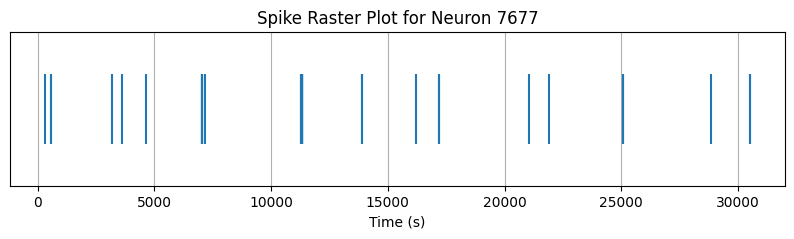

915151


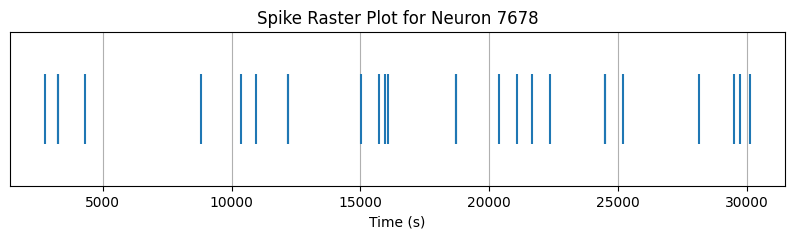

903056


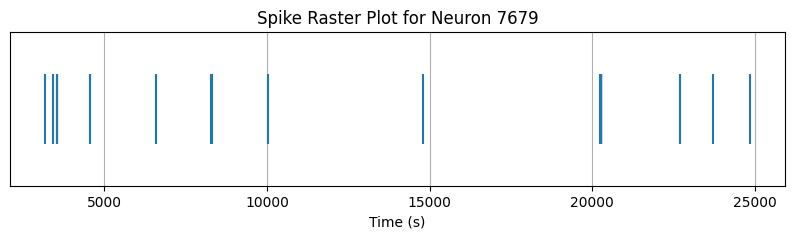

745349


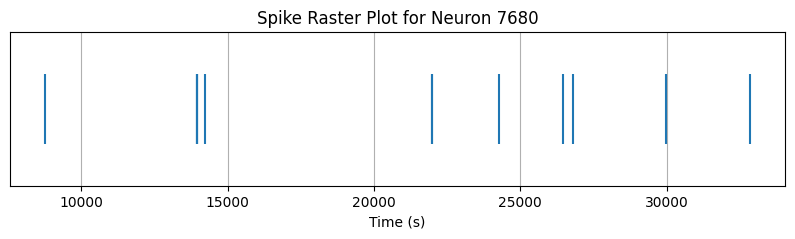

985243


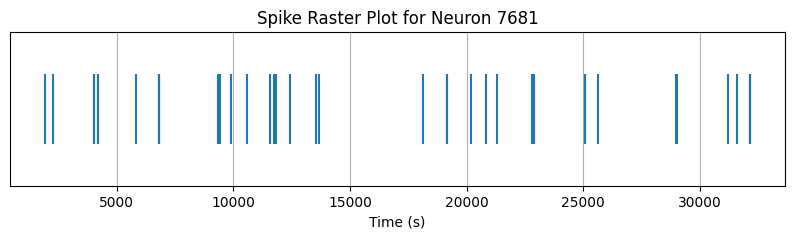

964357


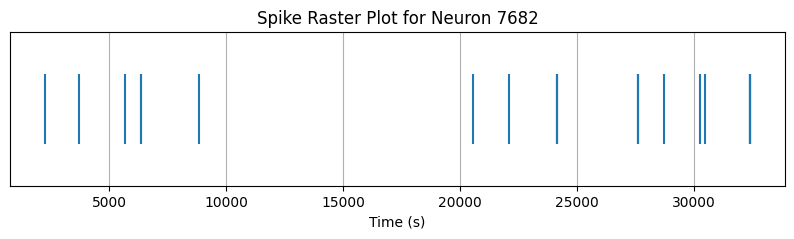

972086


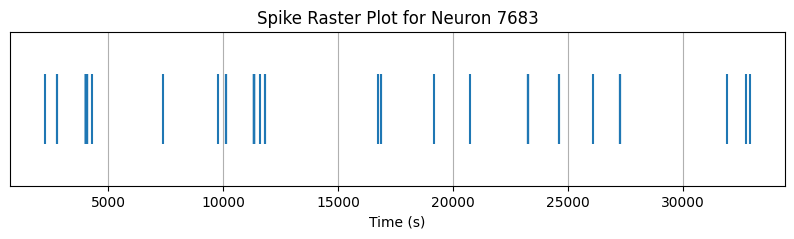

986895


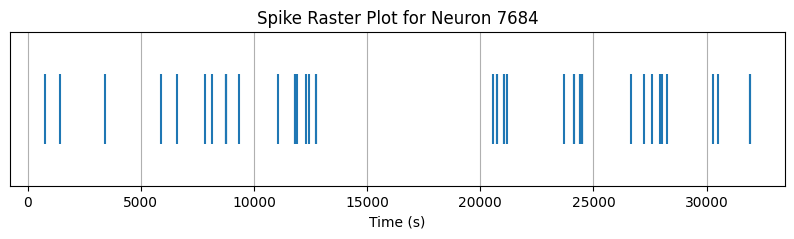

957336


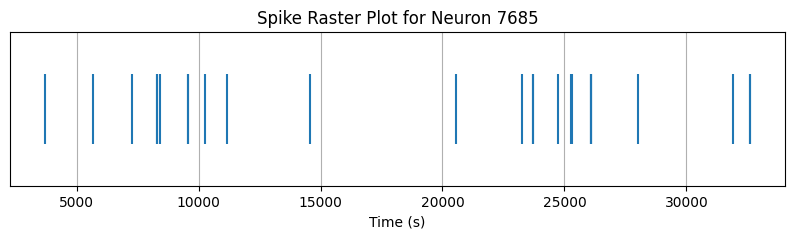

978045


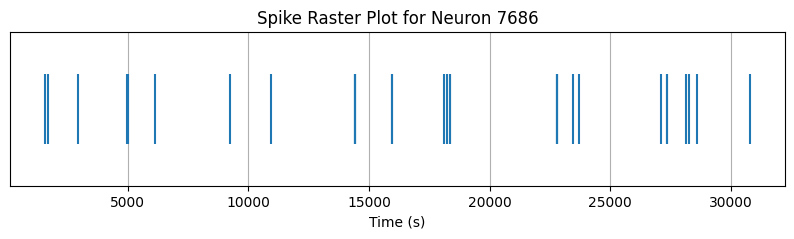

923411


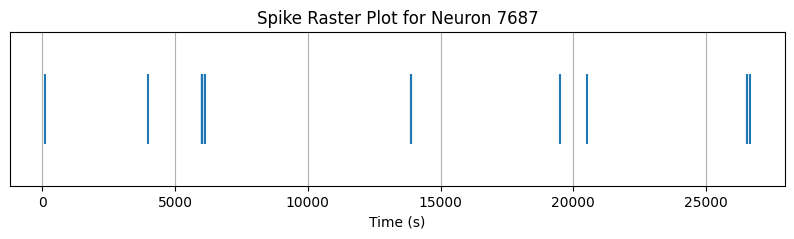

799570


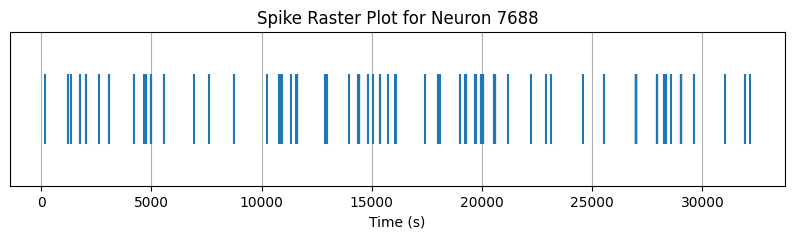

964416


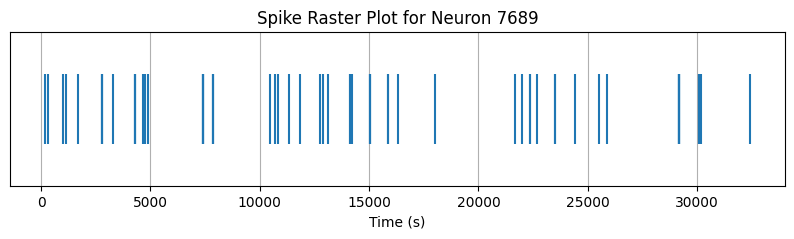

972145


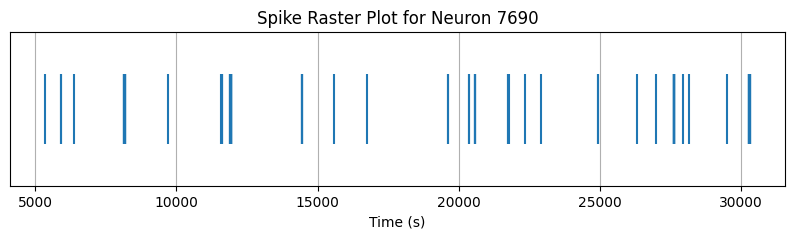

909074


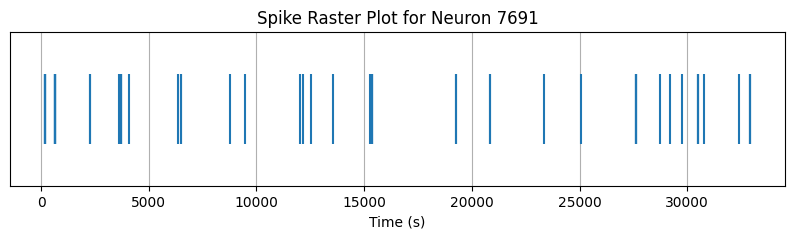

987072


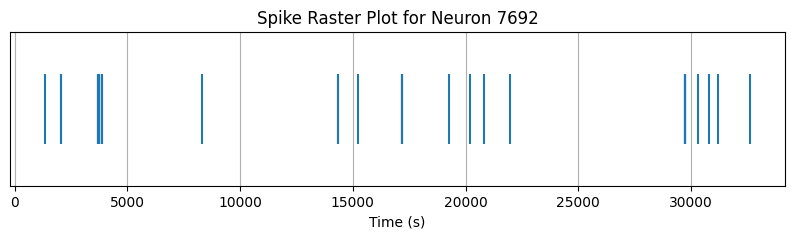

978104


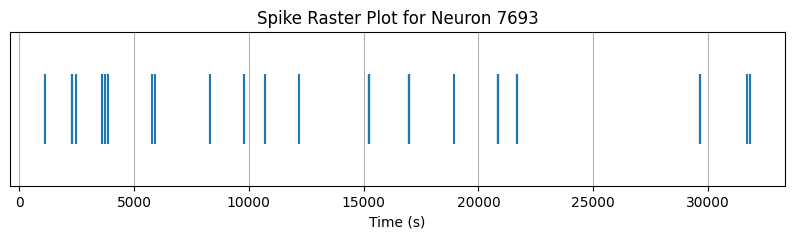

954504


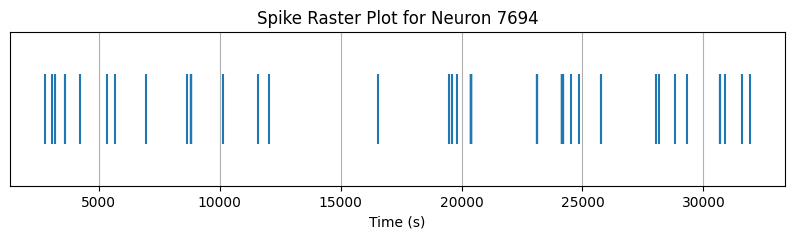

957572


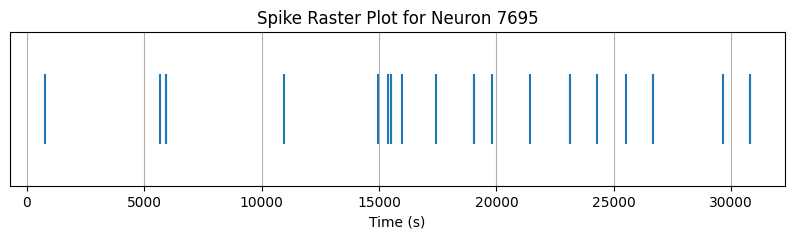

923647


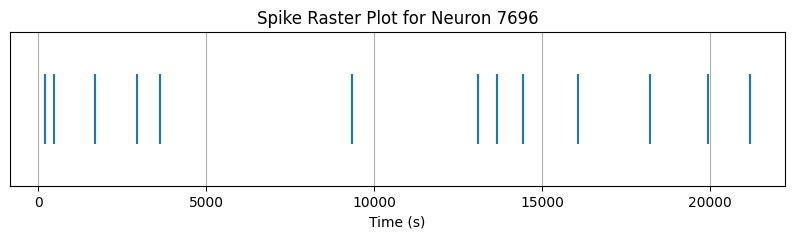

635727


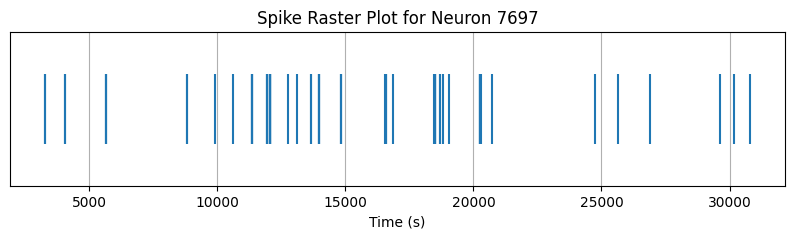

923706


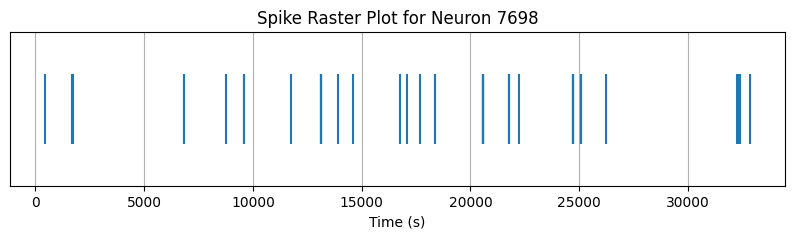

985302


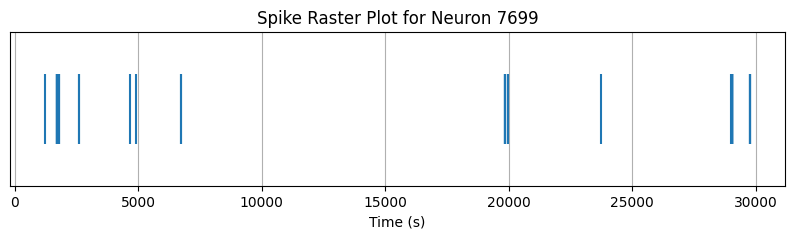

892731


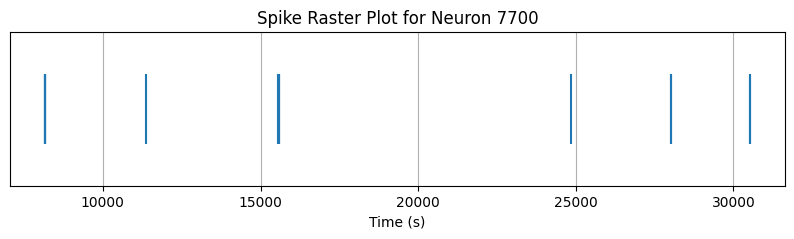

915564


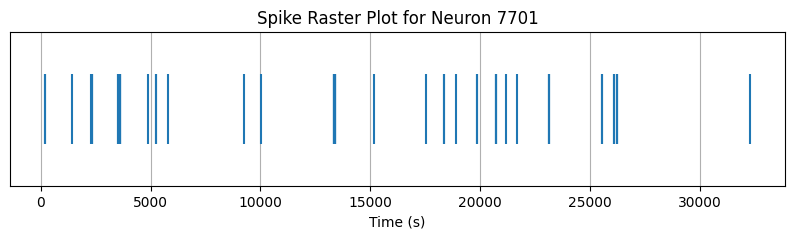

968310


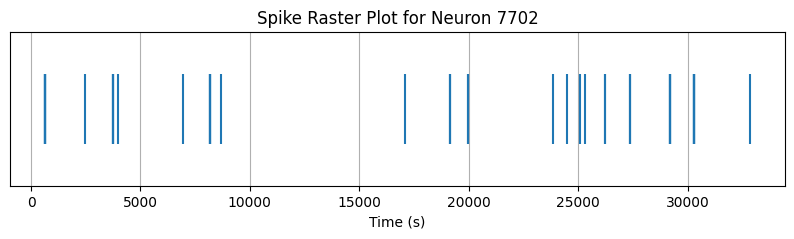

985361


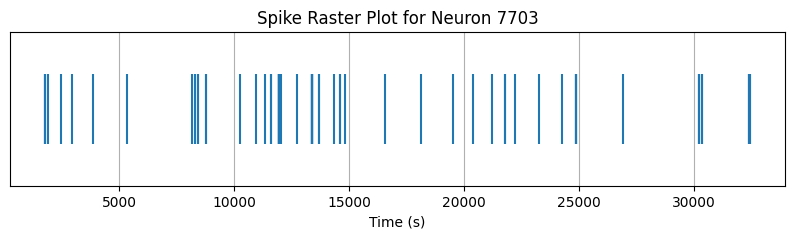

972381


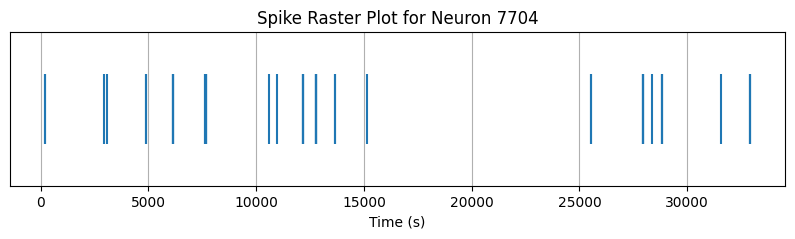

987249


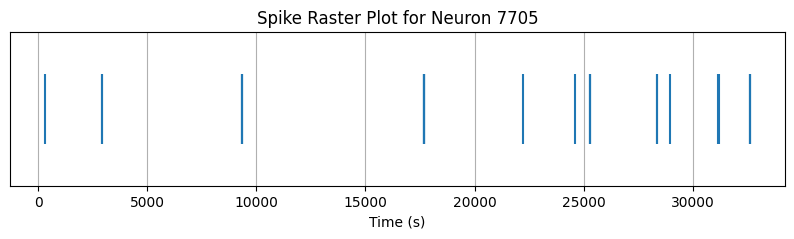

978281


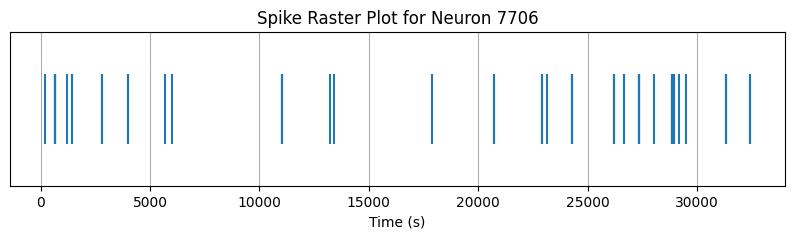

972499


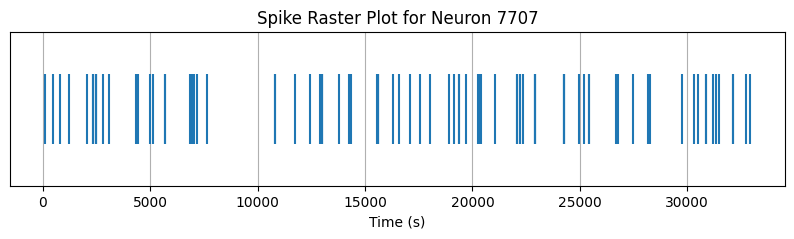

987308


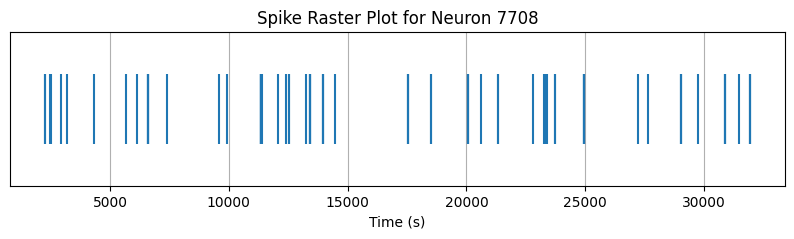

957749


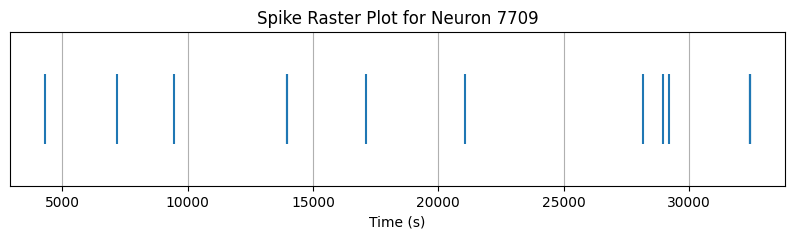

972676


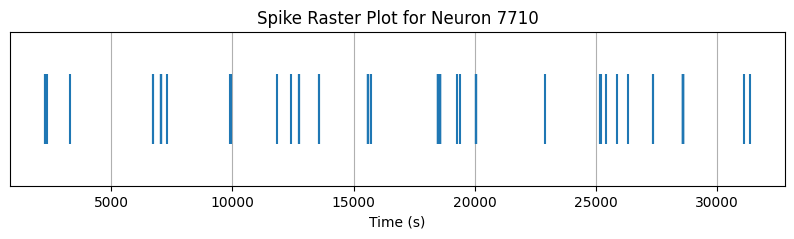

940698


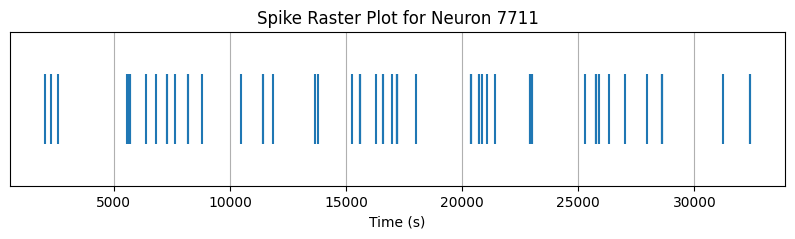

971555


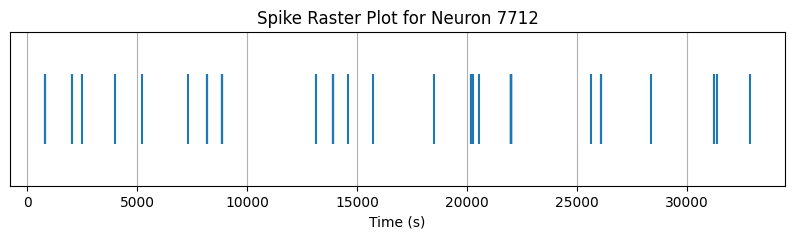

985420


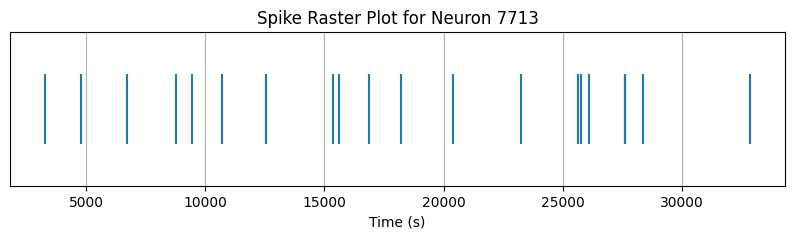

985479


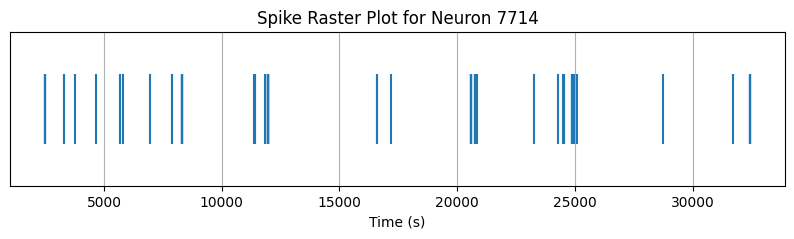

972971


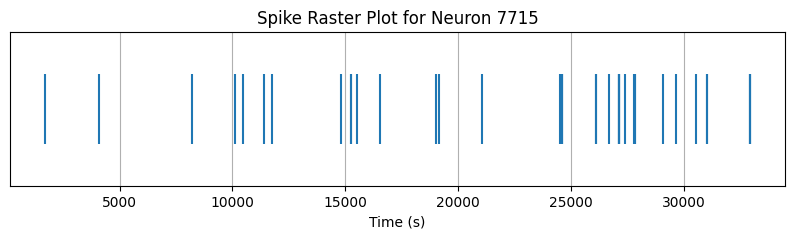

987485


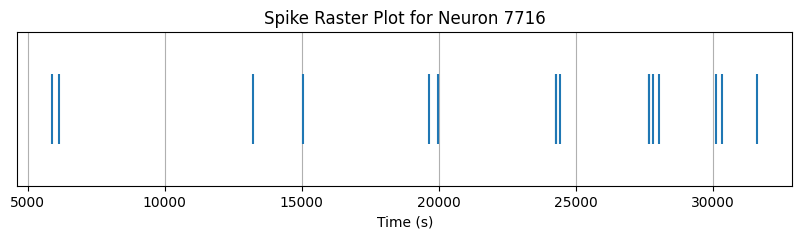

947837


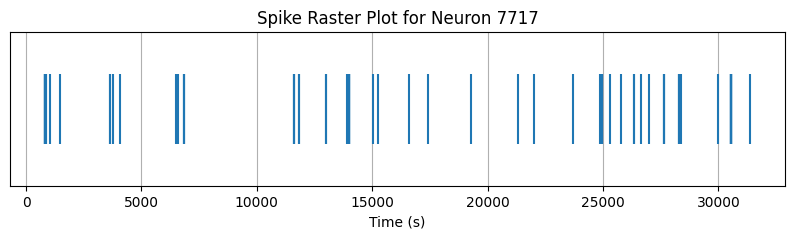

940757


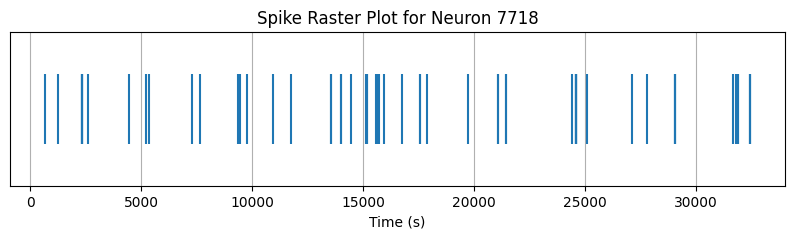

973148


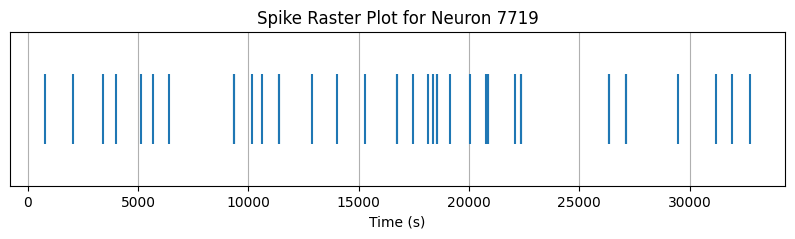

981998


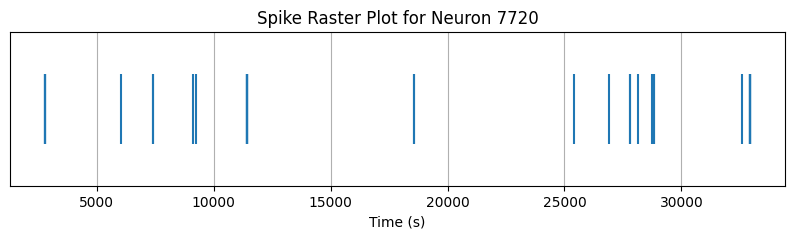

987839


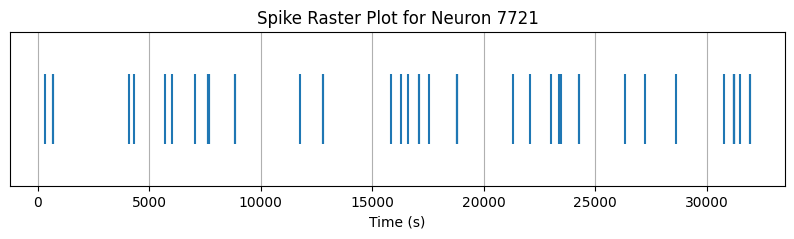

957985


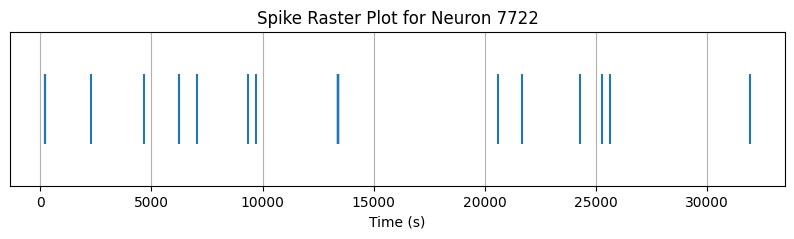

958280


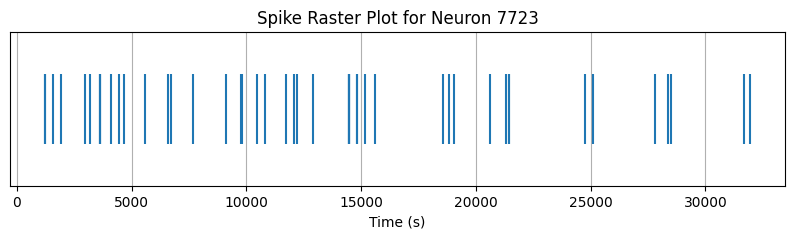

958044


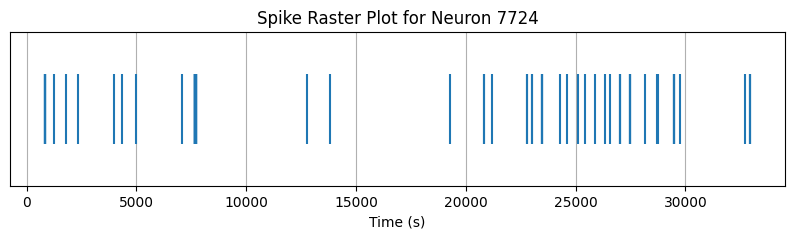

988016


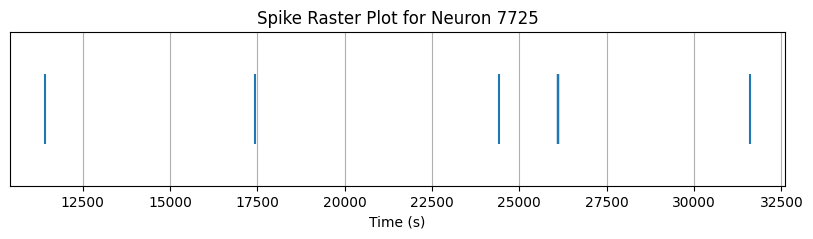

947896


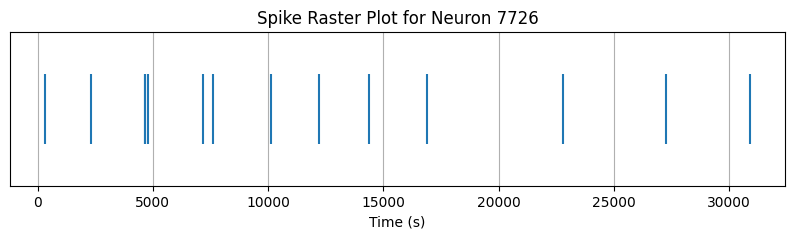

926656


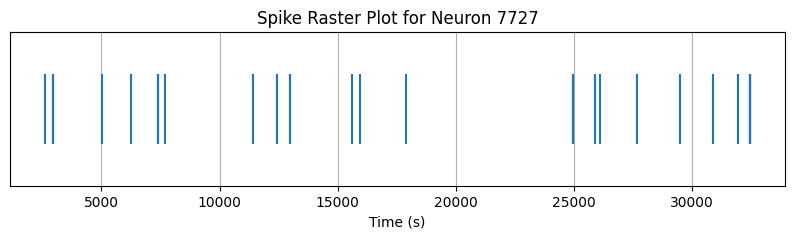

973384


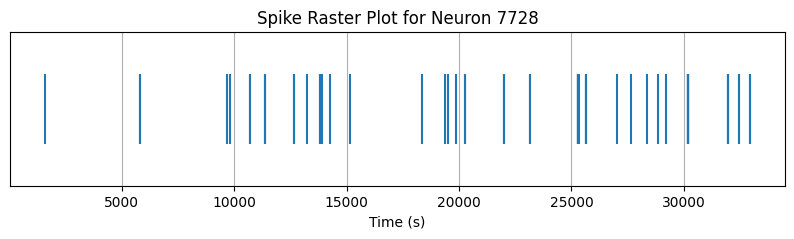

988134


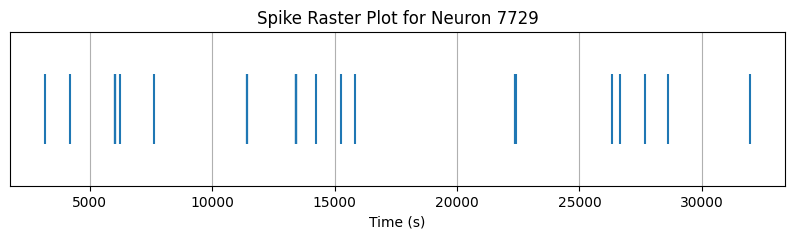

958634


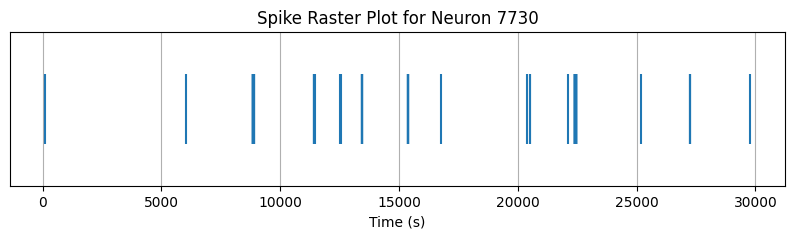

892967


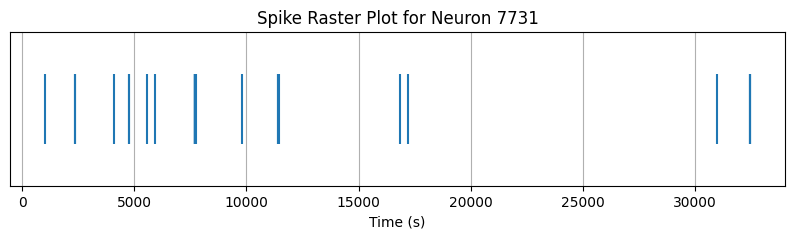

973679


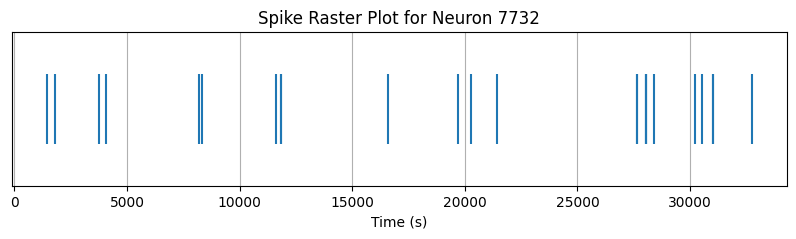

982116


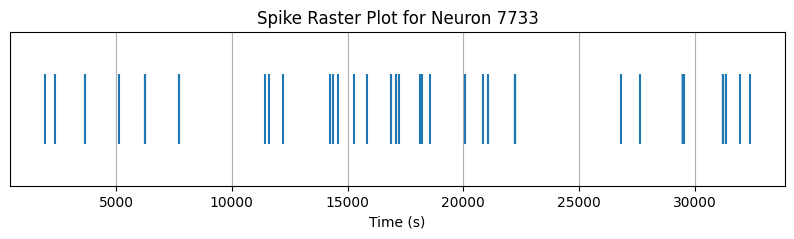

971614


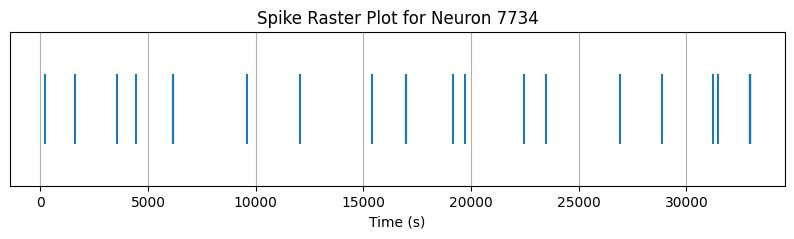

988429


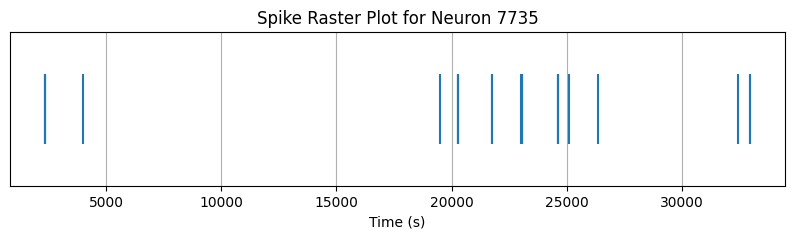

988547


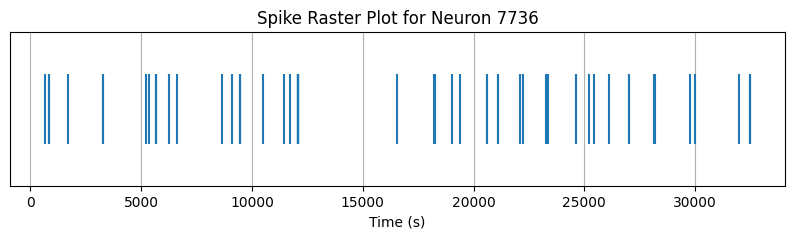

973915


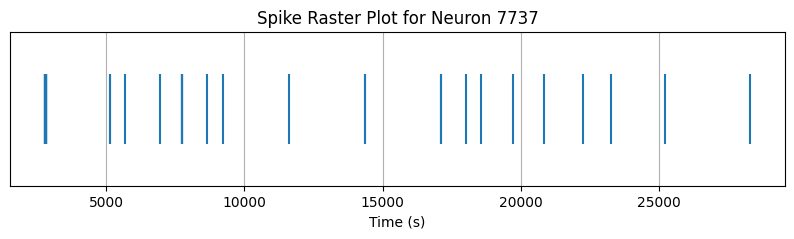

848422


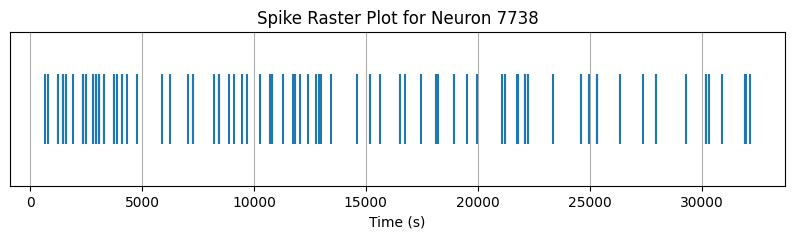

964593


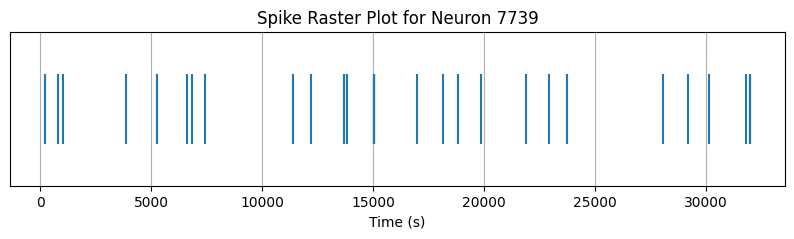

959047


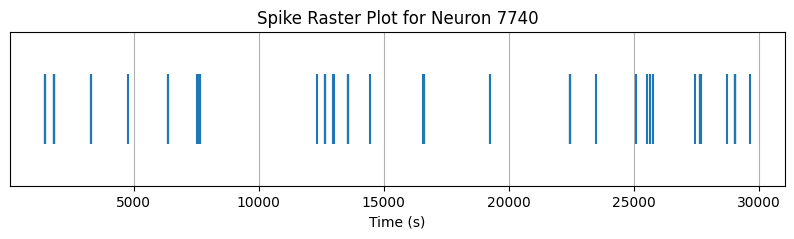

889368


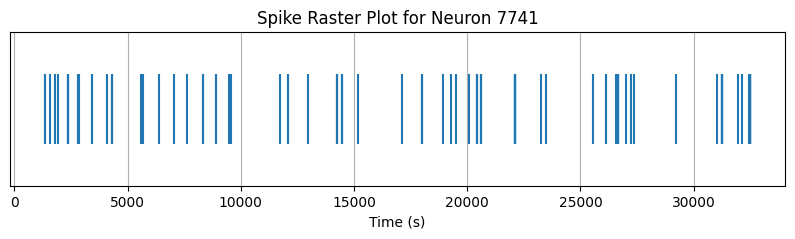

974387


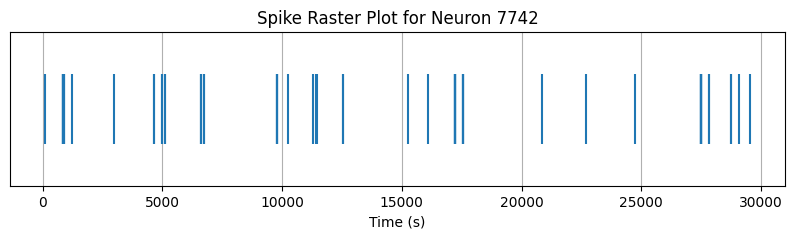

885769


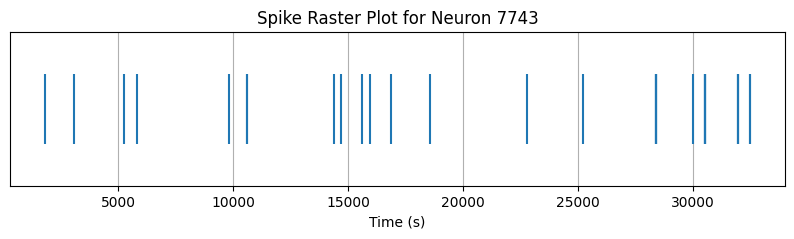

974505


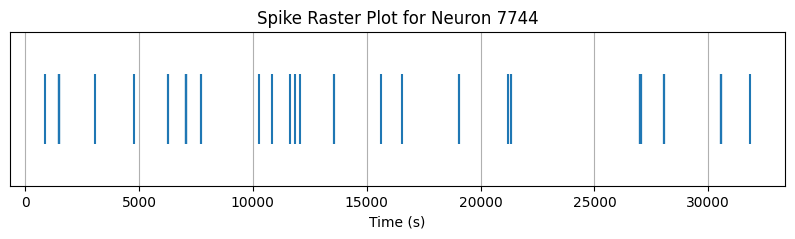

954681


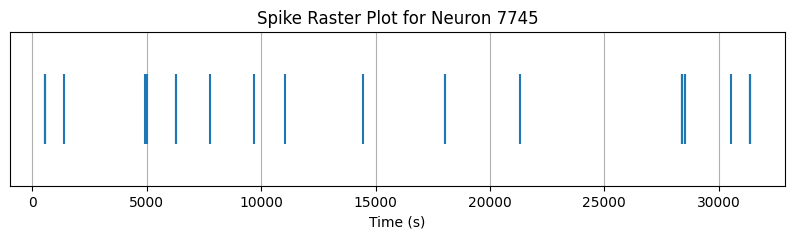

940993


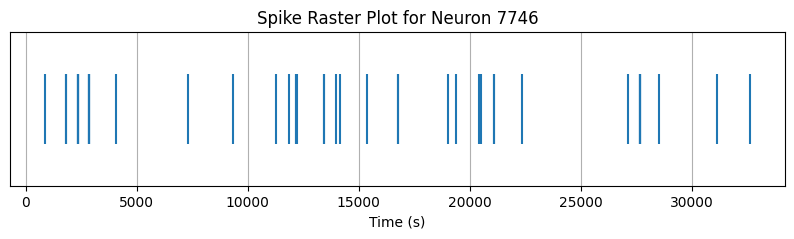

978399


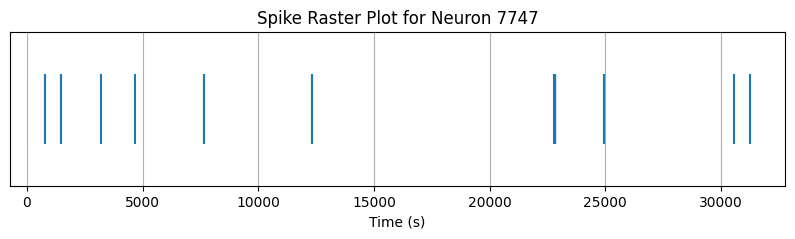

937394


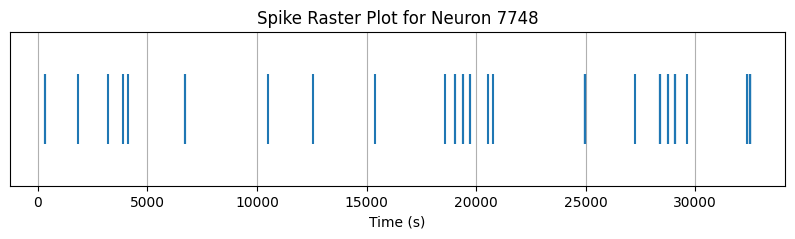

974800


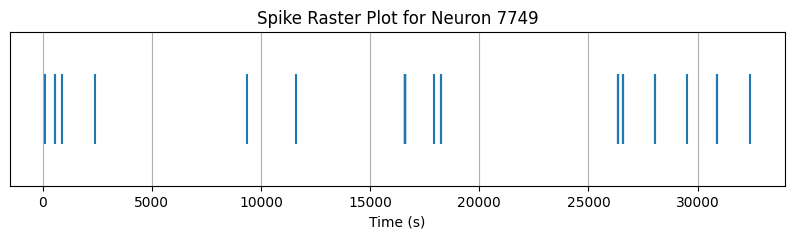

971732


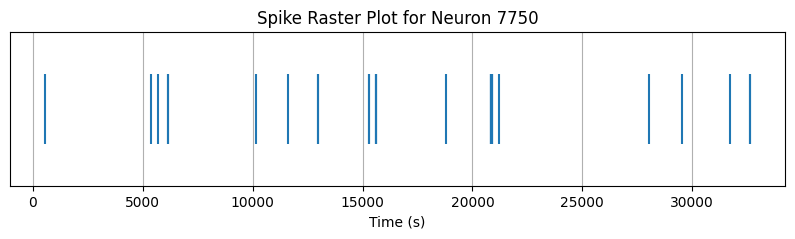

978517


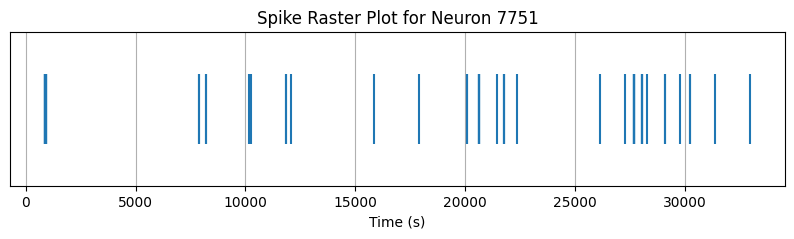

988606


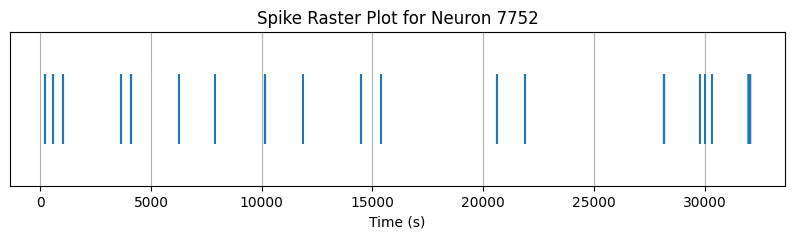

960935


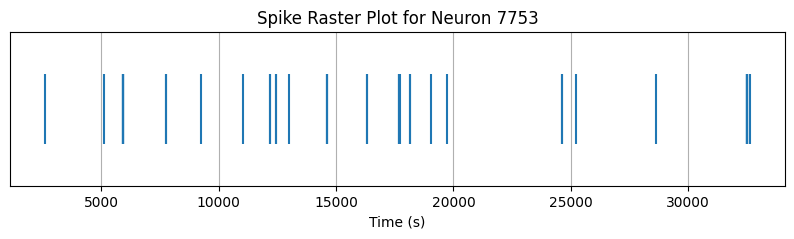

978576


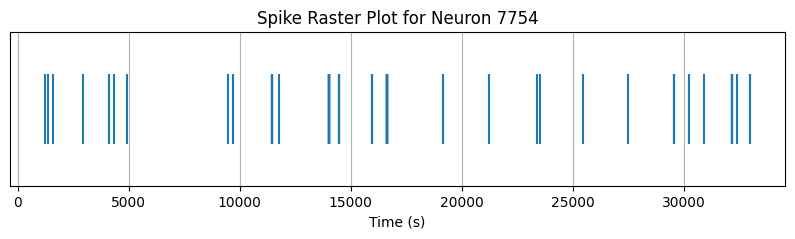

988724


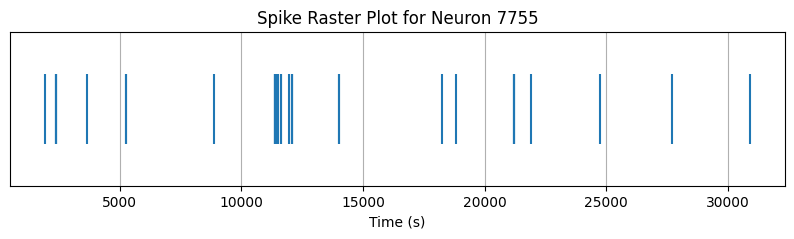

927128


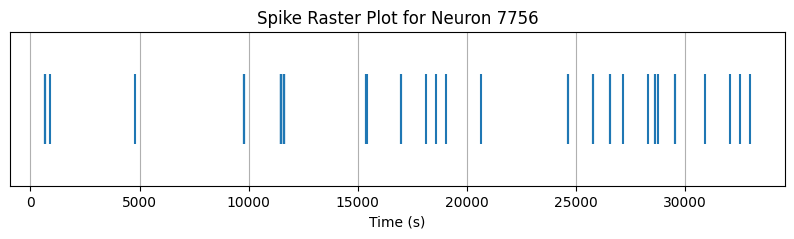

988783


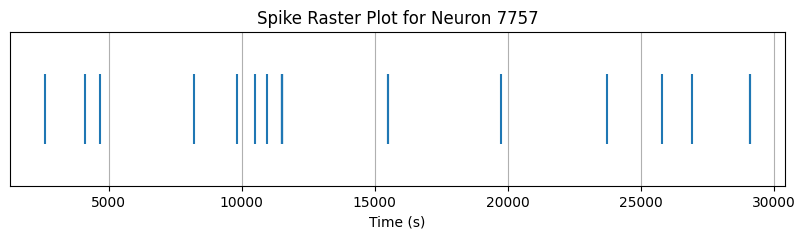

872494


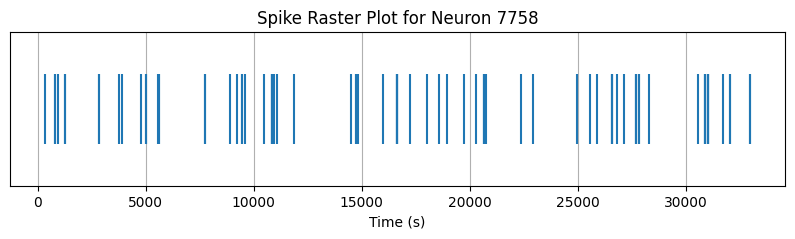

988901


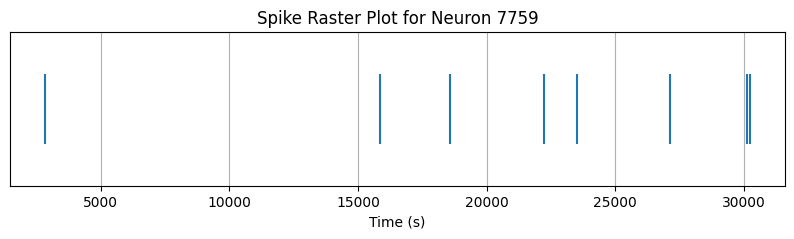

906714


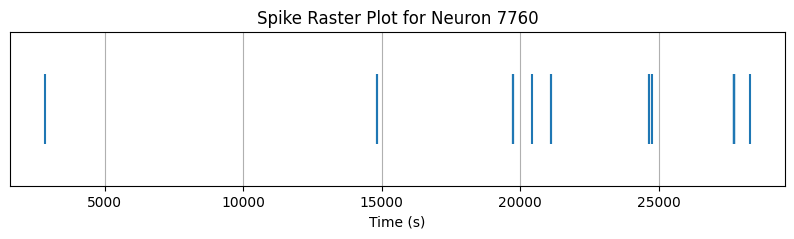

848658


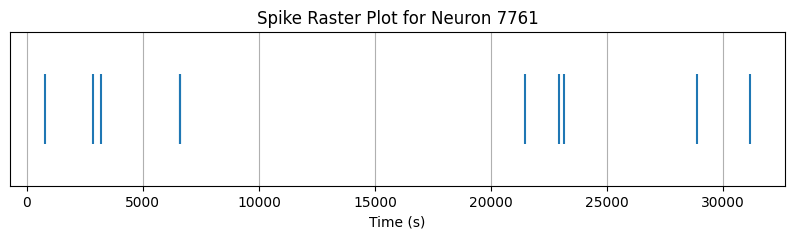

934208


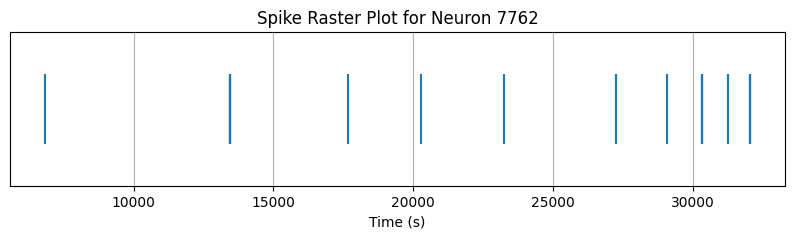

961348


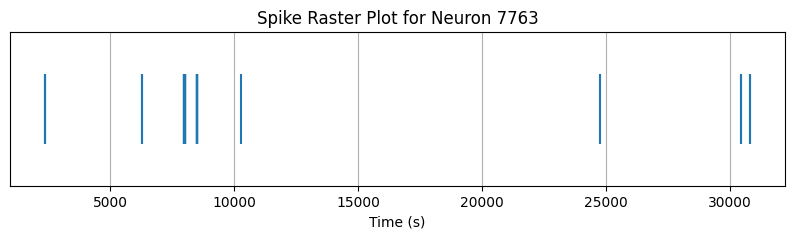

923883


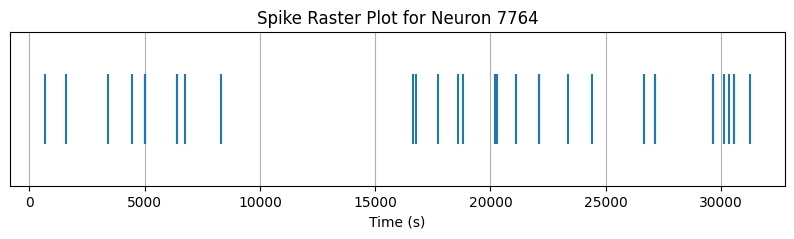

937571


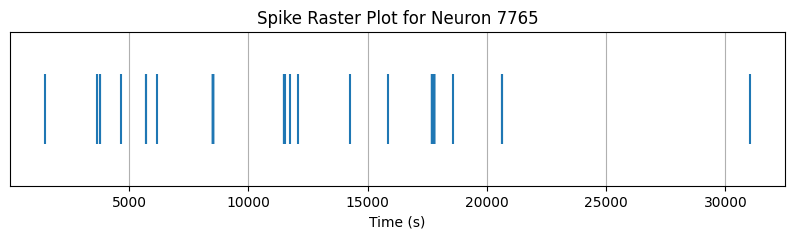

930727


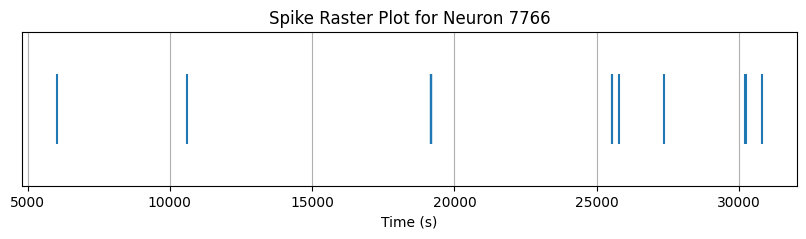

923942


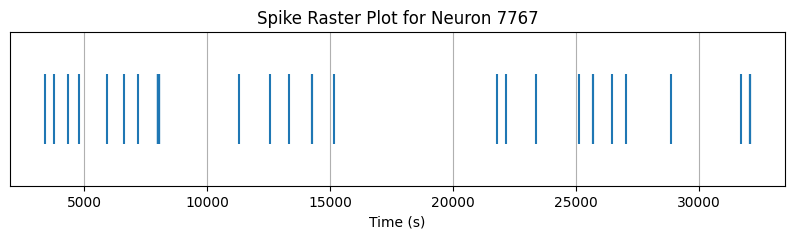

961525


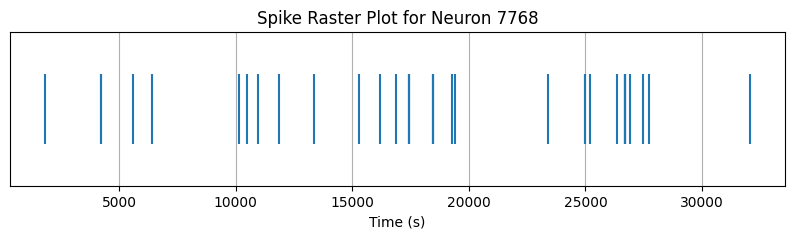

961584


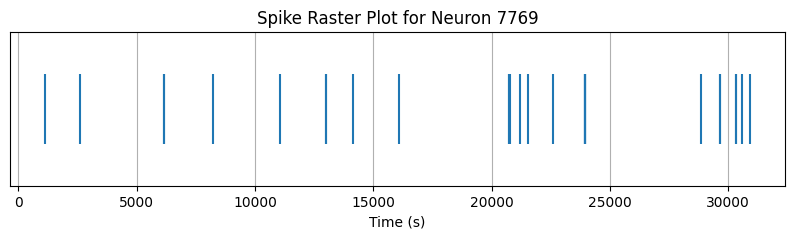

927364


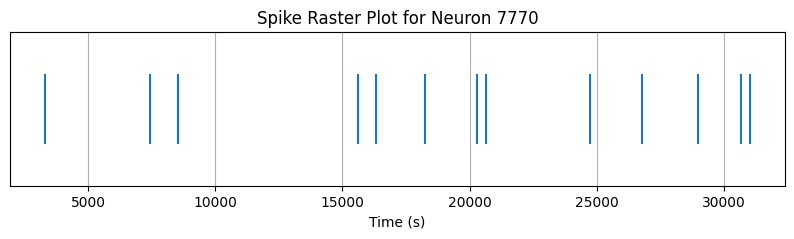

930786


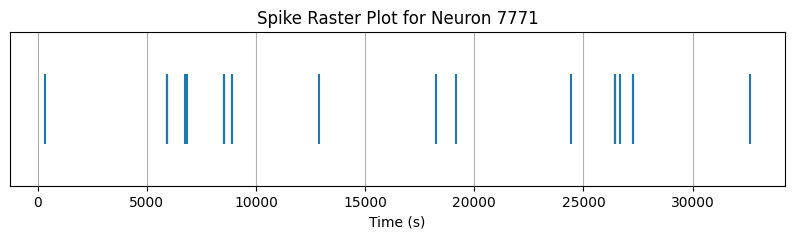

978635


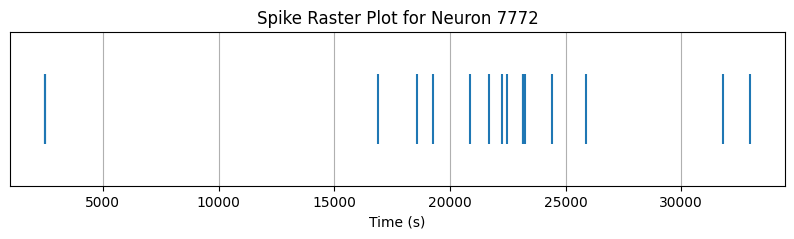

988960


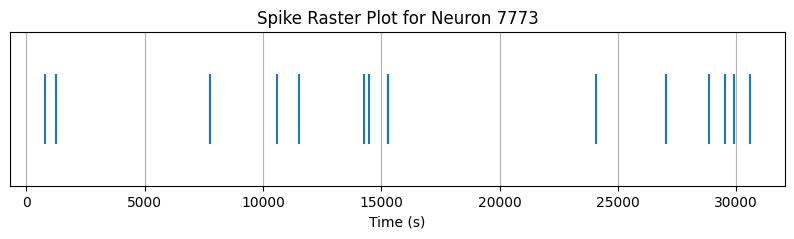

917098


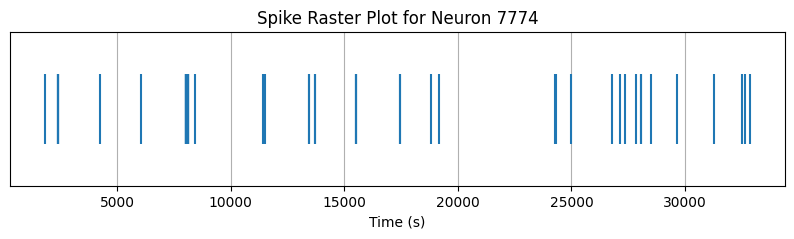

985538


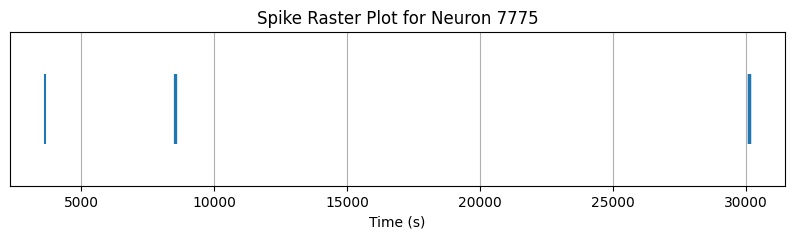

904236


In [ ]:
pred_counts = {}
for id in set(result["ID"]):
    # User-provided data
    ID = result['ID']
    dt = result['dt']

    # Create a DataFrame
    df = pd.DataFrame({
        'ID': ID,
        'dt': dt
    })

    # Handle 'PAD' and 'EOS' tokens
    df = df[df['dt'] != 'PAD'].copy()
    eos_index = df[df['ID'] == 'EOS'].index
    if not eos_index.empty:
        df = df.loc[:eos_index[0]-1]


    # Convert dt to numeric, coercing errors
    df['dt'] = pd.to_numeric(df['dt'], errors='coerce')

    # Calculate absolute spike times
    df['Time'] = df['dt'].cumsum()

    # Filter for the specific neuron we want to visualize
    neuron_id = id
    neuron_activity = df[df['ID'] == neuron_id]

    # Create the raster plot
    # plt.figure(figsize=(10, 2))
    # plt.eventplot(neuron_activity['Time'], linelengths=0.5)
    # plt.title(f'Spike Raster Plot for Neuron {neuron_id}')
    # plt.xlabel('Time (s)')
    # plt.yticks([])
    # plt.grid(True)
    # plt.show()

    counts, bins = binned_spike_count(neuron_activity['Time'].values, bin_size=(1/30))
    # print(counts.shape)
    # print(bins.shape)
    pred_counts[neuron_id] = counts


In [21]:
print(len(set(result["true"])), len(set(result["ID"])))

734 606
